<center><img src="Logo.png" alt="logo"></center>

<h5 style="color:blue">
Presentado por el Alumno: Javier Edgar Esteban 
Ghithub: JavierEdgarEsteban77 
Carrera: DataScience Cohorte 05PT 02 Año 2.023</h5>

<h3 style="color:green">
Proyecto: Obtención del Minimum Viable Product (MUV) solicitado por la empresa Steam sobre la recomendación de videos juegos y optimización para usuarios: 'worried'</h3>

<h5 style="color:white">
Propuesta de Trabajo

En este notebook primero vamos a trabajar el Extract, Transform and Load (ETL) el cual trabajaremos el Rol de Data Engineer y posteriormente el 

Análisis Exploratorio de Datos (EDA).

La impronta que tendrá este trabajo individual desde el punto de vista técnico es extraer los datos en dónde trabajaremos los archivos:

steam_games.json; user__reviews.json y users_items.json

Cargo los datos de archivos JSON y los convierto en DataFrames de Pandas. Una vez transformados a nuestros df, estaremos en condición de la posterior preparación de la documentación para poder realizar un correcto análisis exploratorio que satisfaga las nececidades de nuestro cliente brindando información de calidad para una correcta toma de desición.

In [1]:
# Importo librerías.
import json
import pandas as pd
import ast
from tqdm import tqdm

# Creo la función para leer las líneas de cada dataset.
def leer_datos(ruta, tipo='json'):
    """
    Esta función lee datos desde cada archivo de mi carpeta y los convierte en un DataFrame de pandas.

    Args:
        ruta (str): La ruta al archivo que se va a leer.
        tipo (str, optional): El formato de los datos en el archivo. Puede ser 'json' o 'literal'. 
                              Si es 'json', los datos se cargarán utilizando json.loads. 
                              Si es 'literal', los datos se cargarán utilizando ast.literal_eval. 
                              Por defecto es 'json'.

    Returns:
        pd.DataFrame: Un DataFrame de pandas que contiene los datos leídos del archivo.
    """
    filas = []  # Será la lista para almacenar cada fila de datos

    # Abro el archivo en modo lectura con codificación utf-8

    with open(ruta, encoding='utf-8') as f:
        # Leo cada línea del archivo
        for line in tqdm(f.readlines(), desc=f"Leyendo {ruta}"):
            # Si el tipo es 'json', carga los datos con json.loads
            if tipo == 'json':
                data = json.loads(line)
            # Si el tipo es 'literal', carga los datos con ast.literal_eval
            elif tipo == 'literal':
                data = ast.literal_eval(line)
             # Añado los datos a la lista de filas
            filas.append(data)

    # Convierto la lista de filas en un DataFrame de pandas y lo devuelve.
    return pd.DataFrame(filas)

# Determino la ruta de cada dataset.
ruta_games = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json'
ruta_reviews = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json'
ruta_items = r'C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json'

# Convierto en dataframe cada datasets
df_steam_games = leer_datos(ruta_games, tipo='json')
df_user_reviews = leer_datos(ruta_reviews, tipo='literal')
df_users_items = leer_datos(ruta_items, tipo='literal')

Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\steam_games.json: 100%|██████████| 120445/120445 [00:01<00:00, 81166.78it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\user_reviews.json: 100%|██████████| 25799/25799 [00:03<00:00, 6817.83it/s]
Leyendo C:\Users\Esteban García\OneDrive\Escritorio\LABs\PIMLOPS JEE\Borrador PI_ML_OPS\Archivado Data\users_items.json: 100%|██████████| 88310/88310 [03:31<00:00, 418.27it/s] 


<h3 style="color:green">
Nuestros dataframes se llaman: df_steam_games; df_user_reviews y df_users_items

<h5 style="color:blue">
Trabajaré son Steam Games

In [2]:
# Visualizo el contenido para poder analizar los pasos a seguir.
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [3]:
print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}
""")


El df_steam_games tiene 120445 filas y 13 columnas.
Las columnas son: Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id',
       'developer'],
      dtype='object')



### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [4]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_steam_games.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_steam_games[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'publisher' no contiene ni listas ni diccionarios.
La columna 'genres' contiene una lista.
La columna 'app_name' no contiene ni listas ni diccionarios.
La columna 'title' no contiene ni listas ni diccionarios.
La columna 'url' no contiene ni listas ni diccionarios.
La columna 'release_date' no contiene ni listas ni diccionarios.
La columna 'tags' contiene una lista.
La columna 'reviews_url' no contiene ni listas ni diccionarios.
La columna 'specs' contiene una lista.
La columna 'price' no contiene ni listas ni diccionarios.
La columna 'early_access' no contiene ni listas ni diccionarios.
La columna 'id' no contiene ni listas ni diccionarios.
La columna 'developer' no contiene ni listas ni diccionarios.


### Desanido columnas que contienen listas creando variables ficticias con dumies para conocer su contenido.

In [5]:
# Importo librerías.
import pandas as pd

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'genres', 'tags' y 'specs' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna y creo  variables ficticias.
    df_dummies = df[column].str.join('|').str.get_dummies()

    # Concateno las variables ficticias al DataFrame original.
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original.
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para columnas específicas
df_steam_games = df_steam_games  # aquí coloco el nombre del df y su nombre
columns = ['genres', 'tags', 'specs']  # aquí coloco los nombres de las columnas

for column in columns:
    df_steam_games, new_columns = desanidar_y_crear_dummies(df_steam_games, column)
    if column == 'genres':
        new_columns_genres = new_columns[:20]
    elif column == 'tags':
        new_columns_tags = new_columns[:20]
    elif column == 'specs':
        new_columns_specs = new_columns[:20]

print(f"""
El df_steam_games tiene {df_steam_games.shape[0]} filas y {df_steam_games.shape[1]} columnas.
Las columnas son: {df_steam_games.columns}

Nuevas columnas para 'genres': {new_columns_genres}
Nuevas columnas para 'tags': {new_columns_tags}
Nuevas columnas para 'specs': {new_columns_specs}
""")

""" Si bien el código corre perfectamente limité la salida a los efectos de optimizar el tiempo de presentación """


El df_steam_games tiene 120445 filas y 411 columnas.
Las columnas son: Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres': ['Accounting', 'Action', 'Adventure', 'Animation &amp; Modeling', 'Audio Production', 'Casual', 'Design &amp; Illustration', 'Early Access', 'Education', 'Free to Play', 'Indie', 'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Utilities']
Nuevas columnas para 'tags': ['1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF

' Si bien el código corre perfectamente limité la salida a los efectos de optimizar el tiempo de presentación '

#### Normalizo mi df_steam_games eliminando filas vacías, NaN y analizaremos en porcentajes cuántos datos nulos o vacíos representan en el total del df y desanidando 'genres'.

In [ ]:
# Importo librerías.
import pandas as pd

# Guardo el número de filas antes de la eliminación.
num_rows_before = df_steam_games.shape[0]

# Imprimo los tipos de datos por columna y cantidad de nulos.
print("Tipos de datos por columna y cantidad de nulos:")
print(df_steam_games.dtypes)
print(df_steam_games.isnull().sum())

# Elimino las filas donde cualquier valor es NaN
print("Eliminando filas con valores nulos...")
df_steam_games = df_steam_games.dropna(how='any').reset_index(drop=True)

# Reseteo el índice del DataFrame
print("Reseteando el índice del DataFrame...")
df_steam_games.reset_index(drop=True, inplace=True)

# Guardo el número de filas después de la eliminación
num_rows_after = df_steam_games.shape[0]

# Calculo la reducción porcentual
reduction_percentage = (1 - num_rows_after / num_rows_before) * 100

# Imprimo la reducción porcentual
print(f"La reducción de filas es aproximadamente del {reduction_percentage:.2f}%.")

# Verifico los tipos de datos por columna.
print("Tipos de datos por columna después de la eliminación:")
print(df_steam_games.dtypes)

# Reviso las columnas
for col in df_steam_games.columns:
    print(f"Columna: {col}")
    print(f"Primer valor: {df_steam_games[col].iloc[0]}")

    # Convierto las listas a cadenas antes de llamar a unique()
    unique_values = pd.Series([str(x) if isinstance(x, list) else x for x in df_steam_games[col]]).unique()
    print(f"Valores únicos: {unique_values[:5]}\n")

""" Si bien el código corre perfectamente limité la salida a los efectos de optimizar el tiempo de presentación """

In [7]:
# Importo librerías.
import html

print("Normalizo los nombres de las columnas")

# Normalizo los nombres de las columnas
df_steam_games.columns = df_steam_games.columns.map(html.unescape)

# Recreo las listas 'new_columns_genres', 'new_columns_tags' y 'new_columns_specs' para reflejar los cambios en los nombres de las columnas
new_columns_genres = [col for col in df_steam_games.columns if col in new_columns_genres][:5]
new_columns_tags = [col for col in df_steam_games.columns if col in new_columns_tags][:5]
new_columns_specs = [col for col in df_steam_games.columns if col in new_columns_specs][:5]

# Imprimo los nombres de las columnas y las nuevas columnas
print(f"""
Columnas del dataframe:
{df_steam_games.columns}

Nuevas columnas para 'genres':
{new_columns_genres}

Nuevas columnas para 'tags':
{new_columns_tags}

Nuevas columnas para 'specs':
{new_columns_specs}
""")

""" Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación """

Normalizo los nombres de las columnas

Columnas del dataframe:
Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)

Nuevas columnas para 'genres':
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual']

Nuevas columnas para 'tags':
['Animation & Modeling', '1980s', "1990's", '2.5D', '2D']

Nuevas columnas para 'specs':
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']



' Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación '

### Elimino duplicados.

In [8]:
# Importo librerías.
import numpy as np

# Obtengo todas las columnas del DataFrame
all_columns = df_steam_games.columns.tolist()

# Aseguro que 'developer' esté en la lista de columnas a verificar
if 'developer' not in all_columns:
    all_columns.append('developer')

# Calculo el número de columnas a seleccionar (30% de todas las columnas)
num_columns_to_check = int(len(all_columns) * 0.3)

# Selecciono un subconjunto de columnas al azar
np.random.seed(0)  # Para reproducibilidad
columns_to_check = np.random.choice(all_columns, num_columns_to_check, replace=False)

# Imprimo el número de filas antes de la eliminación de duplicados
print("Número de filas antes de la eliminación de duplicados:", df_steam_games.shape[0])

# Elimino los duplicados del DataFrame
df_steam_games.drop_duplicates(subset=columns_to_check, keep='first', inplace=True)

# Imprimo el número de filas después de la eliminación de duplicados
print("Número de filas después de la eliminación de duplicados:", df_steam_games.shape[0])

# Imprimo las columnas que se usaron para verificar los duplicados
print("\nColumnas que se usaron para verificar los duplicados:") 
print(columns_to_check[:10])

""" Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación """

Número de filas antes de la eliminación de duplicados: 22916
Número de filas después de la eliminación de duplicados: 22915

Columnas que se usaron para verificar los duplicados:
['Software' 'Card Game' 'Tower Defense' 'Violent' 'Space' 'Football'
 'Co-op' 'Accounting' 'Spectacle fighter' 'Time Manipulation']


' Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación '

In [9]:
# Verifico las filas duplicadas
hay_duplicados = df_steam_games.duplicated(subset='id', keep=False).any()
print('¿Hay filas duplicadas?', hay_duplicados)


¿Hay filas duplicadas? False


### Graficaré para interpretar al contenido de 'genres' que se desanido, en este caso la frecuencia.

In [12]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_specs)
print(new_columns_tags)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual']
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']
['Animation & Modeling', '1980s', "1990's", '2.5D', '2D']


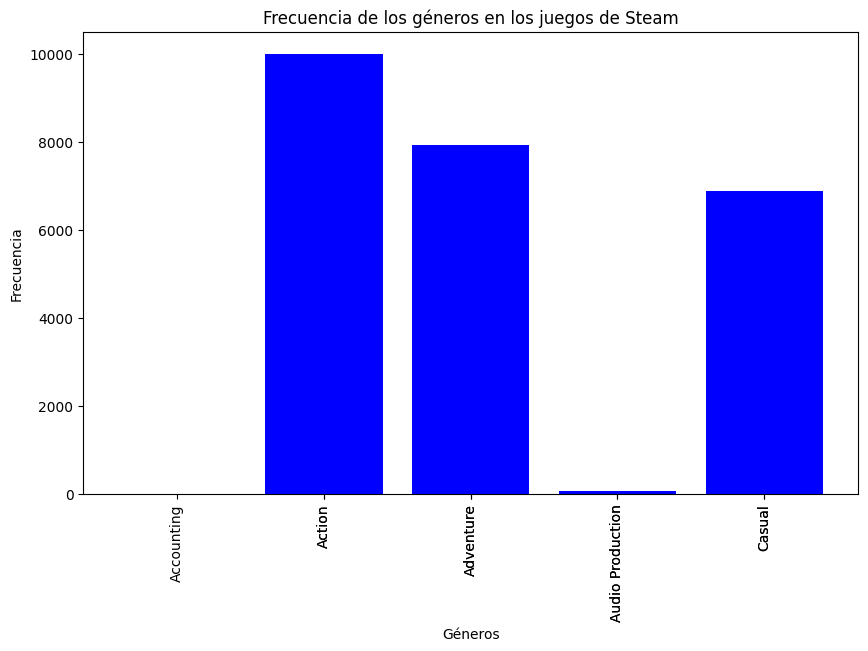

El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.
El género más popular es **Action**, con **10002** juegos.
Los géneros menos populares son **Accounting, Audio Production, Audio Production**, con menos de 5000 juegos cada uno.

**Tipología:** **Descripción
 objetiva


In [10]:
# Importo librerías.
import matplotlib.pyplot as plt
import textwrap

def generate_graph_and_description(df_steam_games, new_columns_genres):

    # Cuento la frecuencia de cada género.
    genre_counts = df_steam_games[new_columns_genres].sum()

    # Creo el gráfico de barras.
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(genre_counts.index, genre_counts.values, color='b')

    # Agrego etiquetas a los ejes.
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Frecuencia de los géneros en los juegos de Steam')

    # Roto las etiquetas del eje x para una mejor visualización.
    ax.set_xticks(genre_counts.index)  # Establece las posiciones de las etiquetas del eje x
    ax.set_xticklabels(genre_counts.index, rotation=90)  # Establece las etiquetas y la rotación

    # Obtengo el género más popular.
    max_index = genre_counts.argmax()

    # Obtengo los géneros menos populares.
    low_count_genres = genre_counts[genre_counts <= 5000]
    low_count_genres_names = low_count_genres.index.to_list()

    # Genero la descripción del gráfico.
    response = f"El gráfico muestra la frecuencia de los géneros en los juegos de Steam. Las barras representan el número de juegos de cada género.\n"
    response += f"El género más popular es **{genre_counts.index[max_index]}**, con **{genre_counts.values[max_index]}** juegos.\n"
    response += f"Los géneros menos populares son **{', '.join(low_count_genres_names)}**, con menos de 5000 juegos cada uno."

    # Añado la tipología.
    response += f"\n\n**Tipología:** {textwrap.fill('Descripción objetiva', 20, initial_indent='**', subsequent_indent=' ')}"

    # Muestro el gráfico.
    plt.show()

    return fig, ax, response

def main(df_steam_games, new_columns_genres):

    # Genero el gráfico y la descripción.
    fig, ax, response = generate_graph_and_description(df_steam_games, new_columns_genres)

    # Imprimo la descripción.
    print(response)

if __name__ == "__main__":
    # Aquí debes definir df_steam_games y new_columns_genres antes de llamar a main.
    main(df_steam_games, new_columns_genres)


### Análisis de la columnas.

In [14]:
print(df_steam_games.columns)
print(new_columns_genres)
print(new_columns_tags)
print(new_columns_specs)

Index(['publisher', 'app_name', 'title', 'url', 'release_date', 'reviews_url',
       'price', 'early_access', 'id', 'developer',
       ...
       'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Trading Cards', 'Steam Turn Notifications', 'Steam Workshop',
       'SteamVR Collectibles', 'Tracked Motion Controllers',
       'Valve Anti-Cheat enabled', 'Windows Mixed Reality'],
      dtype='object', length=411)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual']
['Animation & Modeling', '1980s', "1990's", '2.5D', '2D']
['Captions available', 'Commentary available', 'Cross-Platform Multiplayer', 'Downloadable Content', 'Full controller support']


In [ ]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente, en este caso 'genres', 'tags' y 'specs' de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifico si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifico si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtengo un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_genres + new_columns_tags + new_columns_specs):
    analizar_columna_individual(df_steam_games, columna)

""" Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación """

### Trabajaré publisher

In [15]:
# Calculo los recuentos de valores
publisher_counts = df_steam_games['publisher'].value_counts()

# Ordeno los recuentos de valores en orden descendente
publisher_counts = publisher_counts.sort_values(ascending=False)

# Muestro los primeros 20 recuentos de valores en formato de tabla
print(publisher_counts[:10].to_string())

""" Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación """

publisher
Ubisoft                       368
Dovetail Games - Trains       359
Degica                        280
Paradox Interactive           264
SEGA                          230
Dovetail Games - Flight       220
Activision                    201
Big Fish Games                194
KOEI TECMO GAMES CO., LTD.    192
KISS ltd                      182


' Si bien el código corre perfectamente limite la salida a los efectos de optimizar el tiempo de presentación '

### Analizo 'publisher'

In [16]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'publisher'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'publisher'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Making Fun, Inc.
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: publisher, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
publisher
Ubisoft                    368
Dov

In [17]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Degica', 'Päradox Interactive', 'Sega']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Degica' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Degica.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Päradox Interactive' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Päradox Interactive.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Sega' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Sega.


In [19]:
# Elimino dicha columna no la usaré por ahora en mi trabajo.
df_steam_games = df_steam_games.drop(columns='publisher')

### Trabajaré genres, tags y specs.

#### Vamos a realizar un preprocesamiento y análisis, aplanado listas, tratando valores nulos y creando variables ficticias cuya finalidad es transformar datos categóricos en un formato numérico para que los algoritmos de machine learning puedan procesar más adelante.

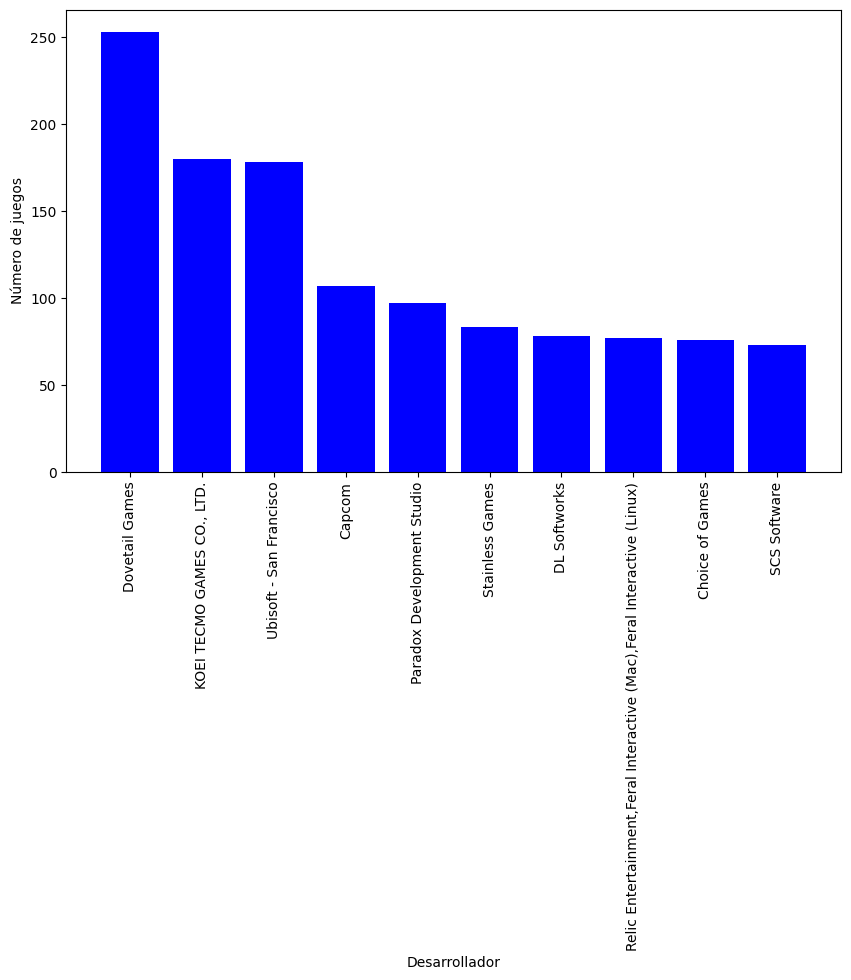

El gráfico muestra la distribución de Desarrollador en los juegos. Aquí están los cinco más comunes:
* Dovetail Games: 253 juegos
* KOEI TECMO GAMES CO., LTD.: 180 juegos
* Ubisoft - San Francisco: 178 juegos
* Capcom: 107 juegos
* Paradox Development Studio: 97 juegos



In [18]:
# Importo librerías.
import matplotlib.pyplot as plt
import pandas as pd

def generate_graph_and_description(df, column, title):
    """
    Genera un gráfico y una descripción para una columna específica de un DataFrame.

    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): La columna del DataFrame a graficar.
    title (str): El título del gráfico.
    """
    # Calculamos los conteos de la columna
    counts = df[column].value_counts()

    # Generamos el gráfico
    plt.figure(figsize=(10,6))
    plt.bar(counts.index[:10], counts.values[:10], color='b')  # Mostramos solo los 10 primeros para evitar un gráfico demasiado lleno
    plt.ylabel('Número de juegos')
    plt.xlabel(title)
    plt.xticks(rotation=90)  # Rota las etiquetas del eje x
    plt.show()

    # Genero la descripción
    description = f"El gráfico muestra la distribución de {title} en los juegos. Aquí están los cinco más comunes:\n"
    for developer, count in counts[:5].items():
        description += f"* {developer}: {count} juegos\n"

    print(description)

# Llamo a la función con el DataFrame y la columna que queremos graficar
generate_graph_and_description(df_steam_games, 'developer', 'Desarrollador')

### Trabajaré app_name y title

In [19]:
def print_dataframe(df):
    """
    Imprime el contenido de las columnas del DataFrame.
    """
    print(df[["app_name", "title"]])

def filter_dataframe(df):
    """
    Crea una máscara cuando app_name es diferente a title y muestra algunos resultados después de aplicar los filtros.
    """
    diferentes = df["app_name"] != df["title"]
    indices_true = diferentes.to_numpy().nonzero()[0]
    sample_size = min(10, len(indices_true))
    print(df.loc[indices_true, ["app_name", "title"]].sample(sample_size))

# Visualizo el contenido de las columnas
print_dataframe(df_steam_games)

# Aplico los filtros y visualizamos algunos resultados
filter_dataframe(df_steam_games)

                       app_name                     title
0           Lost Summoner Kitty       Lost Summoner Kitty
1                     Ironbound                 Ironbound
2       Real Pool 3D - Poolians   Real Pool 3D - Poolians
3                       弹炸人2222                   弹炸人2222
4         Battle Royale Trainer     Battle Royale Trainer
...                         ...                       ...
22911              Kebab it Up!              Kebab it Up!
22912            Colony On Mars            Colony On Mars
22913  LOGistICAL: South Africa  LOGistICAL: South Africa
22914             Russian Roads             Russian Roads
22915       EXIT 2 - Directions       EXIT 2 - Directions

[22915 rows x 2 columns]
                                                app_name  \
10216  Dresden Files Cooperative Card Game - Mouse & ...   
22608                                          Starscape   
12091            Animation Throwdown - Incredible Bundle   
1222   Dungeons & Dragons Online® Cata

In [20]:
""" Verifico si 'app_name' y 'title' son iguales para todas las filas """ 
son_iguales = (df_steam_games['app_name'] == df_steam_games['title']).all()

print(f"¿Son 'app_name' y 'title' iguales para todas las filas? {son_iguales}")

¿Son 'app_name' y 'title' iguales para todas las filas? False


### Analizo 'app_name'

In [21]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'app_name'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'app_name'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scena

In [22]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Alter Ego' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Alter Ego.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invasion' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invasion.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invisible Apartment Zero' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invisible Apartment Zero.


### Analizo 'title'

In [23]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'title'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'title'
--------------------------------------------------

Primeros 20 valores:
0                                   Lost Summoner Kitty
1                                             Ironbound
2                               Real Pool 3D - Poolians
3                                               弹炸人2222
4                                 Battle Royale Trainer
5                            SNOW - All Access Pro Pass
6                         SNOW - All Access Legend Pass
7     Army of Tentacles: (Not) A Cthulhu Dating Sim:...
8                                           Beach Rules
9                           Planetarium 2 - Zen Odyssey
10                              The first thrust of God
11                                  SNOW - Starter Pack
12              The first thrust of God - All Aircrafts
13                                 SNOW - Lifetime Pack
14                             The Warrior Of Treasures
15                         RC Plane 3 - Canyon Scenario

In [24]:
# Lista de nombres de juegos para verificar duplicados
game_names = ['Alter Ego', 'Invasion', 'Invisible Apartment Zero']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['app_name', 'publisher', 'developer']

# Para cada nombre de juego en la lista
for game_name in game_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el juego 
    '{game_name}' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'app_name' es el nombre del juego actual
    df_game = df_steam_games[df_steam_games['app_name'] == game_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_game.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {game_name}:")
        
        # Imprime las filas duplicadas
        print(df_game[duplicates])
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el juego actual
        print(f"No se encontraron duplicados para {game_name}.")



    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Alter Ego' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Alter Ego.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invasion' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invasion.

    Este bloque de código verifica si hay filas duplicadas para el juego 
    'Invisible Apartment Zero' en el DataFrame df_steam_games. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Invisible Apartment Zero.


### ¿Cuántos juegos únicos por categoría hay?

In [25]:
# Agrupo por género y cuento los juegos únicos
unique_games_per_genre = df_steam_games.groupby(new_columns)['id'].nunique()

# Calculo el número de combinaciones únicas de géneros
num_unique_combinations = len(unique_games_per_genre)

# Imprimo el resultado y el mensaje personalizado con el número calculado
print(f"{unique_games_per_genre}\n\nEl código agrupa los juegos por género y cuenta el número de juegos únicos para cada combinación de géneros, resultando en {num_unique_combinations} combinaciones únicas de géneros en el conjunto de datos.")

Captions available  Commentary available  Cross-Platform Multiplayer  Downloadable Content  Full controller support  Game demo  Gamepad  HTC Vive  In-App Purchases  Includes Source SDK  Includes level editor  Keyboard / Mouse  Local Co-op  Local Multi-Player  MMO  Mods  Mods (require HL1)  Mods (require HL2)  Multi-player  Oculus Rift  Online Co-op  Online Multi-Player  Partial Controller Support  Room-Scale  Seated  Shared/Split Screen  Single-player  Standing  Stats  Steam Achievements  Steam Cloud  Steam Leaderboards  Steam Trading Cards  Steam Turn Notifications  Steam Workshop  SteamVR Collectibles  Tracked Motion Controllers  Valve Anti-Cheat enabled  Windows Mixed Reality
0                   0                     0                           0                     0                        0          0        0         0                 0                    0                      0                 0            0                   0    0     0                   0                   0

### Graficaré para ver el top ten de los juegos y los últimos 10 juegos menos usados para tener una comparativa.

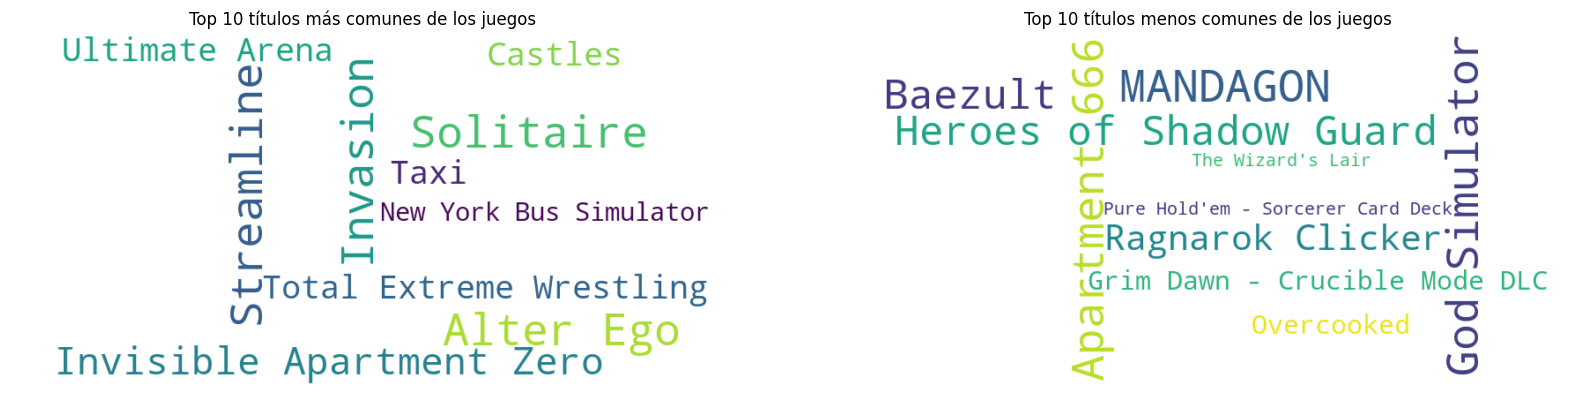

In [26]:
# Importo librerías
from wordcloud import WordCloud

# Creo una serie con todos los títulos
all_titles = df_steam_games['title']

# Obtengo los 10 títulos más y menos comunes
top_ten_titles = all_titles.value_counts().nlargest(10).to_dict()
bottom_ten_titles = all_titles.value_counts().nsmallest(10).to_dict()

# Creo las nubes de palabras con parámetros ajustados
wordcloud_top = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(top_ten_titles)
wordcloud_bottom = WordCloud(width=800, height=400, background_color='white', max_font_size=50, max_words=100).generate_from_frequencies(bottom_ten_titles)

# Creo una figura con dos subtramas
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Muestro las nubes de palabras en las subtramas
axs[0].imshow(wordcloud_top, interpolation='bilinear')
axs[0].set_title('Top 10 títulos más comunes de los juegos')
axs[0].axis('off')

axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
axs[1].set_title('Top 10 títulos menos comunes de los juegos')
axs[1].axis('off')

plt.show()


### Trabajaré reviews_url.

In [27]:
# Muestra los primeros elementos de la columna 'reviews_url'
print(df_steam_games['reviews_url'].head().to_frame())

print("\nNo considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.")

                                         reviews_url
0  http://steamcommunity.com/app/761140/reviews/?...
1  http://steamcommunity.com/app/643980/reviews/?...
2  http://steamcommunity.com/app/670290/reviews/?...
3  http://steamcommunity.com/app/767400/reviews/?...
4  http://steamcommunity.com/app/772540/reviews/?...

No considero relevante a la columna 'reviews_url', pero para un futuro trabajo tiene información importante, por eso no la elimino en caso de expandir mi trabajo de MLOPS.


### Analizo 'reviews_url'

In [28]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'reviews_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'reviews_url'
--------------------------------------------------

Primeros 20 valores:
0     http://steamcommunity.com/app/761140/reviews/?...
1     http://steamcommunity.com/app/643980/reviews/?...
2     http://steamcommunity.com/app/670290/reviews/?...
3     http://steamcommunity.com/app/767400/reviews/?...
4     http://steamcommunity.com/app/772540/reviews/?...
5     http://steamcommunity.com/app/774277/reviews/?...
6     http://steamcommunity.com/app/774278/reviews/?...
7     http://steamcommunity.com/app/770380/reviews/?...
8     http://steamcommunity.com/app/768880/reviews/?...
9     http://steamcommunity.com/app/765320/reviews/?...
10    http://steamcommunity.com/app/773650/reviews/?...
11    http://steamcommunity.com/app/774271/reviews/?...
12    http://steamcommunity.com/app/773690/reviews/?...
13    http://steamcommunity.com/app/774279/reviews/?...
14    http://steamcommunity.com/app/768060/reviews/?...
15    http://steamcommunity.com/app/775880/review

### Trabajaré release_date.

In [31]:
# Imprime los valores únicos en la columna 'release_date'
print(df_steam_games['release_date'].unique())

# Haz un recuento de los valores en la columna 'release_date'
print(df_steam_games['release_date'].value_counts())


<DatetimeArray>
['2018-01-04 00:00:00', '2017-07-24 00:00:00', '2017-12-07 00:00:00',
 '2018-01-03 00:00:00', '2017-12-22 00:00:00', '2017-12-23 00:00:00',
 '1997-06-30 00:00:00', '1998-11-08 00:00:00', '2016-11-25 00:00:00',
 '2018-01-01 00:00:00',
 ...
 '2006-10-25 00:00:00', '2018-01-02 00:00:00', '1999-04-01 00:00:00',
 '1999-11-01 00:00:00', '2001-06-01 00:00:00', '2001-12-01 00:00:00',
 '2002-08-28 00:00:00', '2003-11-01 00:00:00', '2004-03-16 00:00:00',
 '2004-03-01 00:00:00']
Length: 3200, dtype: datetime64[ns]
release_date
2012-10-16    100
2017-07-25     63
2017-09-26     62
2017-10-17     61
2017-12-15     60
             ... 
2002-11-12      1
2005-01-21      1
1994-12-08      1
1993-11-11      1
2004-03-01      1
Name: count, Length: 3199, dtype: int64


In [33]:
# Importo librerías
import pandas as pd

# Convierto la columna release_date a datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Encuentro los valores que no se pudieron convertir a datetime
non_convertible_values = df_steam_games[df_steam_games['release_date'].isna()]

# Imprimo los valores únicos que no se pudieron convertir a datetime
print(non_convertible_values['release_date'].unique())

# Imprimo la cantidad de valores NaT
print("Cantidad de valores NaT: ", len(non_convertible_values))

# Elimino las filas con 'NaT' en la columna 'release_date'
df_steam_games = df_steam_games[df_steam_games['release_date'].notna()]

# Verifico si hay valores NaN o NaT en la columna 'release_date'
print("¿Existen valores NaN o NaT en 'release_date'? ", df_steam_games['release_date'].isna().any())

print("Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.")

<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]
Cantidad de valores NaT:  34
¿Existen valores NaN o NaT en 'release_date'?  False
Luego de haber realizado las correcciones pertinentes y su limpieza, puedo afirmar que no tenemos datos nulos; a continuación procedo a la conversión de la columna 'release_date' a datetime y la renombre año de lanzamiento y creo la columna 'año'.


In [34]:
# Renombro la columna release_date a 'año de lanzamiento'
df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)

# Creo la columna 'año'
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Analizo los datos
print(df_steam_games['año de lanzamiento'].head())


0   2018-01-04
1   2018-01-04
2   2017-07-24
3   2017-12-07
4   2018-01-04
Name: año de lanzamiento, dtype: datetime64[ns]


C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\2576562942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games.rename(columns={'release_date': 'año de lanzamiento'}, inplace=True)
C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\2576562942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year


### Analizo 'release_date' que fue renombrada a 'año de lanzamiento'.

In [35]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'año de lanzamiento'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'año de lanzamiento'
--------------------------------------------------

Primeros 20 valores:
0    2018-01-04
1    2018-01-04
2    2017-07-24
3    2017-12-07
4    2018-01-04
5    2018-01-04
6    2018-01-04
7    2018-01-04
8    2018-01-04
9    2018-01-03
10   2018-01-03
11   2018-01-03
12   2018-01-03
13   2018-01-03
14   2018-01-03
15   2017-12-22
16   2017-12-23
17   2018-01-03
18   1997-06-30
19   1998-11-08
Name: año de lanzamiento, dtype: datetime64[ns]

Número de valores nulos: 0

Tipo de datos: datetime64[ns]


### Analizo 'año'

In [36]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'año'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'año'
--------------------------------------------------

Primeros 20 valores:
0     2018
1     2018
2     2017
3     2017
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2017
16    2017
17    2018
18    1997
19    1998
Name: año, dtype: int32

Número de valores nulos: 0

Tipo de datos: int32

Estadísticas descriptivas:
count    22881.000000
mean      2014.673572
std          3.506630
min       1983.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: año, dtype: float64


### Popularidad de los juegos por año de lanzamiento e interpreto la columna 'año'.

In [38]:
# Obtengo el año de lanzamiento mínimo y máximo
min_year = df_steam_games['año de lanzamiento'].min()
max_year = df_steam_games['año de lanzamiento'].max()

print(f"El rango de años de lanzamiento es de {min_year} a {max_year}")

El rango de años de lanzamiento es de 1983-06-19 00:00:00 a 2021-12-31 00:00:00


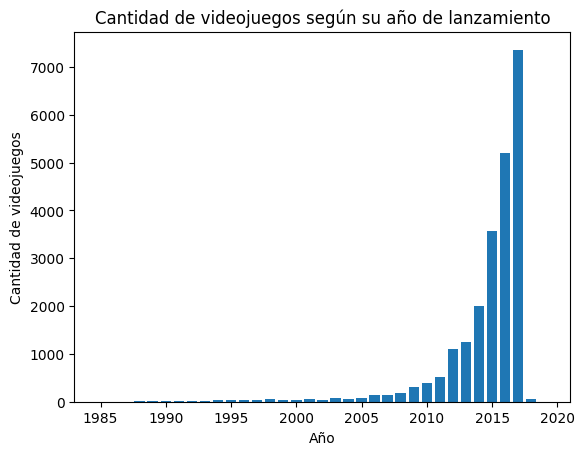

In [39]:
# Importo librerías
import matplotlib.pyplot as plt

# Extraigo el año de la fecha de lanzamiento
df_steam_games['año'] = df_steam_games['año de lanzamiento'].dt.year

# Creo una serie con la cantidad de videojuegos según su año de lanzamiento.
games_by_year = df_steam_games.groupby("año").size()

# Hago un gráfico de barras de games_by_year.
plt.bar(games_by_year.index, games_by_year.values)

# Ajusto opciones del gráfico.
plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1983, 2021)
plt.show()

### Trabajaré price

In [41]:
# Importo librerías
import pandas as pd

def replace_price(price):
    """
    Esta función reemplaza las cadenas de texto por 0.0 en la columna 'price'.
    
    Parámetros:
    price (str, float): El precio a reemplazar.
    
    Retorna:
    float: El precio reemplazado.
    """
    if isinstance(price, str):
        return 0.0
    else:
        return price

# Corrijo precios en df_steam_games
df_steam_games['price'].replace({'Starting at $499.00': 499.0, 'Starting at $449.00': 499.0}, inplace=True)

# Aplico la función a la columna price
df_steam_games['price'] = df_steam_games['price'].apply(replace_price)

# Calculo la cantidad de valores nulos en cada columna
nulos = df_steam_games.isnull().sum()

# Calculo el porcentaje de filas con valores nulos en las columnas 'developer' y 'año de lanzamiento'
porcentaje_nulos = 1 - df_steam_games.dropna(subset=["developer","año de lanzamiento"]).shape[0] / df_steam_games.shape[0]

print(df_steam_games.head())
print(df_steam_games['price'].head())
print(df_steam_games['price'].tail())
print(df_steam_games['price'].describe())
print(df_steam_games['price'].value_counts())
print(nulos)
print(f'Porcentaje de nulos : {porcentaje_nulos}')

             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http://store.steampowered.com/app/772540/Battl...         2018-01-04   

                                         reviews_url  price early_access  \
0  http://steamc

### Analizo 'price'

In [42]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'price'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'price'
--------------------------------------------------

Primeros 20 valores:
0      4.99
1      0.00
2      0.00
3      0.99
4      3.99
5     18.99
6     29.99
7     10.99
8      3.99
9      2.99
10     1.59
11    14.99
12     1.99
13    59.99
14     0.99
15     2.99
16     2.99
17     4.99
18     9.99
19     9.99
Name: price, dtype: float64

Número de valores nulos: 0

Tipo de datos: float64

Estadísticas descriptivas:
count    22881.000000
mean         9.348689
std         16.972885
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64


### Trabajaré early_acces

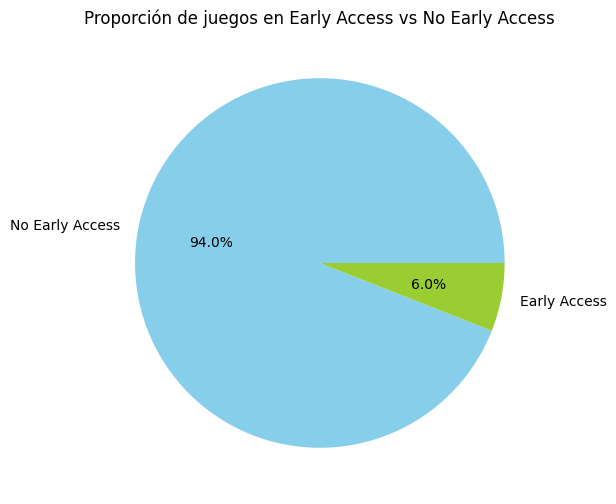

In [43]:
# Importo librerías.
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos en 'Early Access' y no en 'Early Access'
early_access_counts = df_steam_games['early_access'].value_counts()

# Creo un gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(early_access_counts, labels=['No Early Access', 'Early Access'], autopct='%1.1f%%',
        colors=['skyblue', 'yellowgreen'])
plt.title('Proporción de juegos en Early Access vs No Early Access')
plt.show()


### Analizo 'early_acces'

In [44]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'early_access'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'early_access'
--------------------------------------------------

Primeros 20 valores:
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: early_access, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
early_access
False    21514
True      1367
Name: count, dtype: int64


### Trabajaré id

In [46]:
# Analizo el número de nulos en la columna 'id'
print("El número de nulos en la columna 'id' es:", df_steam_games.id.isna().sum())

# Elimino las filas con valores NaN
df_steam_games.dropna(inplace=True)

# Imprimo el número de duplicados en la columna 'id'
print("El número de duplicados en la columna 'id' es:", df_steam_games.id.duplicated().sum())

# Elimino los duplicados en la columna 'id'
df_steam_games.drop_duplicates(subset=["id"], inplace=True)

# Reseteo el índice del DataFrame
df_steam_games.reset_index(drop=True, inplace=True)

# Imprimo el número de registros y el número de 'id' únicos
print(f"El número de registros es {df_steam_games.shape[0]}.")
print(f"El número de 'id' únicos es {df_steam_games.id.nunique()}.")

# Convierto 'id' a número para ahorrar espacio de almacenamiento
df_steam_games["id"] = df_steam_games["id"].astype("int32")

# Cambio el nombre de la columna 'id' a 'user_id'
df_steam_games.rename(columns={'id': 'user_id'}, inplace=True)

# Verifico los cambios
print(df_steam_games.head())


El número de nulos en la columna 'id' es: 0
El número de duplicados en la columna 'id' es: 0
El número de registros es 22881.
El número de 'id' únicos es 22881.
             publisher                 app_name                    title  \
0            Kotoshiro      Lost Summoner Kitty      Lost Summoner Kitty   
1     Making Fun, Inc.                Ironbound                Ironbound   
2         Poolians.com  Real Pool 3D - Poolians  Real Pool 3D - Poolians   
3                 彼岸领域                  弹炸人2222                  弹炸人2222   
4  Trickjump Games Ltd    Battle Royale Trainer    Battle Royale Trainer   

                                                 url año de lanzamiento  \
0  http://store.steampowered.com/app/761140/Lost_...         2018-01-04   
1  http://store.steampowered.com/app/643980/Ironb...         2018-01-04   
2  http://store.steampowered.com/app/670290/Real_...         2017-07-24   
3     http://store.steampowered.com/app/767400/2222/         2017-12-07   
4  http

### Analizo 'id' renombrado a 'user_id'.

In [47]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0     761140
1     643980
2     670290
3     767400
4     772540
5     774277
6     774278
7     770380
8     768880
9     765320
10    773650
11    774271
12    773690
13    774279
14    768060
15    775880
16    775881
17    653960
18    282010
19        70
Name: user_id, dtype: int32

Número de valores nulos: 0

Tipo de datos: int32

Estadísticas descriptivas:
count    2.288100e+04
mean     4.308574e+05
std      1.915666e+05
min      1.000000e+01
25%      3.024700e+05
50%      4.270010e+05
75%      5.809700e+05
max      2.028850e+06
Name: user_id, dtype: float64


### Trabajaré developer

Top 10 desarrolladores con más juegos:
 developer
Dovetail Games                                                           253
KOEI TECMO GAMES CO., LTD.                                               179
Ubisoft - San Francisco                                                  178
Capcom                                                                   107
Paradox Development Studio                                                97
Stainless Games                                                           83
DL Softworks                                                              78
Relic Entertainment,Feral Interactive (Mac),Feral Interactive (Linux)     77
Choice of Games                                                           76
SCS Software                                                              73
Name: count, dtype: int64


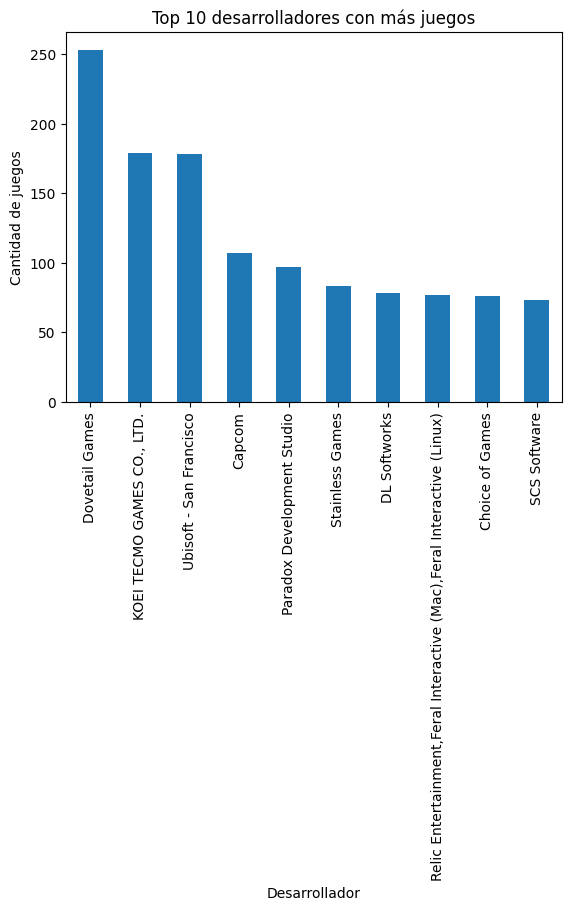

In [48]:
# Importo librerías.
import pandas as pd
import matplotlib.pyplot as plt

# Cuento la cantidad de juegos por desarrollador
developer_counts = df_steam_games['developer'].value_counts()

# Imprimo los primeros 10 desarrolladores con más juegos
print("Top 10 desarrolladores con más juegos:\n", developer_counts.head(10))

# Creo un gráfico de barras con los primeros 10 desarrolladores con más juegos
developer_counts.head(10).plot(kind='bar')
plt.title('Top 10 desarrolladores con más juegos')
plt.xlabel('Desarrollador')
plt.ylabel('Cantidad de juegos')
plt.show()

### Analizo 'developer'.

In [49]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_steam_games  # aquí coloco el nombre del df y su nombre
column = 'developer'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)




Analizando la columna 'developer'
--------------------------------------------------

Primeros 20 valores:
0                          Kotoshiro
1                   Secret Level SRL
2                       Poolians.com
3                               彼岸领域
4                Trickjump Games Ltd
5             Poppermost Productions
6             Poppermost Productions
7     Stegalosaurus Game Development
8                  Copperpick Studio
9                       Ghulam Jewel
10                            Apillo
11            Poppermost Productions
12                            Apillo
13            Poppermost Productions
14                       Tero Lunkka
15                      FrozenPepper
16                      FrozenPepper
17                     Casey Labrack
18               Stainless Games Ltd
19                             Valve
Name: developer, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
developer
Dovetail Games                253


<h3 style="color:green">
Ahora bien analizamos los títulos de los juegos de Steam mediante el uso de técnicas de procesamiento del lenguaje natural en dónde encontraremos tendencias.

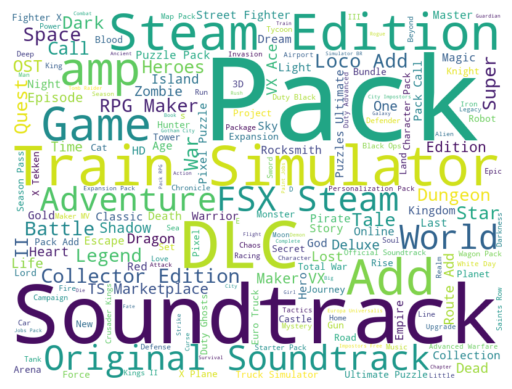

In [50]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from wordcloud import WordCloud
from collections import Counter

def analyze_steam_game_titles(df_steam_games):
  """
  Analizo los títulos de los juegos de Steam.

  Args:
    df_steam_games: Un DataFrame de pandas con los juegos de Steam.

  Returns:
    Una lista con los títulos completos.
  """

  # Accedo a la columna de los títulos del DataFrame
  titles = df_steam_games["title"].tolist()

  return titles  # Devuelve una lista con los títulos completos

# Analizo los títulos de los juegos
titles = analyze_steam_game_titles(df_steam_games)

# Creo una nube de palabras con los títulos completos
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(' '.join(titles))

# Muestro la nube de palabras
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Analizaremos el top ten de los juegos y los últimos 10 menos jugados.

In [ ]:
print(df_steam_games.columns)

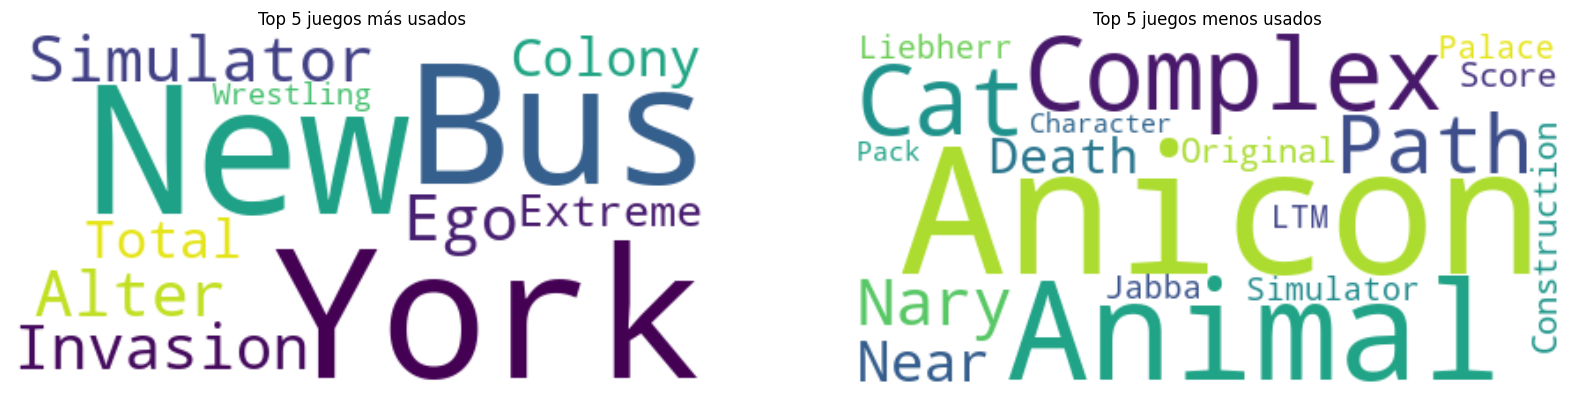

In [51]:
# Importo librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordclouds(df_steam_games):
    """
    Esta función crea dos nubes de palabras: una para los juegos más usados y otra para los menos usados.
    
    Parámetros:
    df_steam_games (pandas.DataFrame): El DataFrame que contiene los datos de los juegos.
    
    Retorna:
    None
    """
    # Usaré 'app_name' como columna de uso
    top_five_games = df_steam_games['app_name'].value_counts().nlargest(5).index
    bottom_five_games = df_steam_games['app_name'].value_counts().nsmallest(5).index

    # Creo la nube de palabras para los juegos más usados
    wordcloud_top = WordCloud(background_color='white').generate(' '.join(top_five_games))

    # Creo la nube de palabras para los juegos menos usados
    wordcloud_bottom = WordCloud(background_color='white').generate(' '.join(bottom_five_games))

    # Creo una figura con dos subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    # Muestro la nube de palabras de los juegos más usados
    axs[0].imshow(wordcloud_top, interpolation='bilinear')
    axs[0].set_title('Top 5 juegos más usados')
    axs[0].axis('off')

    # Muestro la nube de palabras de los juegos menos usados
    axs[1].imshow(wordcloud_bottom, interpolation='bilinear')
    axs[1].set_title('Top 5 juegos menos usados')
    axs[1].axis('off')

    # Muestro la figura
    plt.show()

# Uso la función para crear las nubes de palabras
create_wordclouds(df_steam_games)


<h3 style="color:blue">
Ahora trabajaré con User Reviews

In [54]:
# Ya realizada la carga anteiormente, vemos su contenido
df_user_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [55]:
# Importo librerías.
import pandas as pd

def main(df_user_reviews):
    """
    Analizo el DataFrame dado.

    Parámetros:
    df_user_reviews (pandas.DataFrame): El DataFrame a analizar.
    """

    # Inspecciono los tipos de datos de cada columna en tu DataFrame
    dtypes = df_user_reviews.dtypes

    # Si alguna columna es de tipo 'object', podría contener datos anidados
    object_cols = df_user_reviews.select_dtypes(include=['object']).columns

    # Imprimo los tipos de datos, las columnas que podrían contener datos anidados y la forma del DataFrame
    print(f"Tipos de datos en el DataFrame:\n{dtypes}\n")
    print(f"Columnas que podrían contener datos anidados: {object_cols}\n")
    print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")

if __name__ == "__main__":
    # Asegúrate de que df_user_reviews está definido aquí
    main(df_user_reviews)


Tipos de datos en el DataFrame:
user_id     object
user_url    object
reviews     object
dtype: object

Columnas que podrían contener datos anidados: Index(['user_id', 'user_url', 'reviews'], dtype='object')

El df_user_reviews tiene 25799 filas y 3 columnas.


### Procederé a visualizar las columnas que contienen una lista o un diccionario.

In [56]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_user_reviews.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_user_reviews[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'user_id' no contiene ni listas ni diccionarios.
La columna 'user_url' no contiene ni listas ni diccionarios.
La columna 'reviews' contiene una lista.


### Desanido, creando columnas ficticias con dumies; verifico los tipos de datos, duplicados y chequeo.

In [57]:
# Importo librerías.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def desanidar_reviews(df, column):
    """
    Esta función desanida la columna 'reviews' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns.tolist()

    # Desanido la columna 'reviews'
    df = df.explode(column)

    # Duplico las filas generando un diccionario por cada diccionario en la lista. Luego, concateno el DataFrame original con el DataFrame generado a partir de transformar los diccionarios a pandas
    df = pd.concat([df.drop([column],axis=1),df[column].apply(pd.Series)],axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'reviews'
df_user_reviews = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'reviews'  # aquí coloco el nombre de la columna

df_user_reviews, new_columns_reviews = desanidar_reviews(df_user_reviews, column)

print(f"El df_user_reviews tiene {df_user_reviews.shape[0]} filas y {df_user_reviews.shape[1]} columnas.")
print(f"Nuevas columnas para 'reviews': {new_columns_reviews}")


El df_user_reviews tiene 59333 filas y 10 columnas.
Nuevas columnas para 'reviews': ['funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0]


In [58]:
# Importo librerías.
import pandas as pd

def find_duplicates(df, column):
    """
    Encuentra filas duplicadas en un DataFrame basado en una columna específica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame en el que buscar.
    column (str): El nombre de la columna en la que buscar duplicados.

    Devuelve:
    filas_duplicadas (pandas.DataFrame): Un DataFrame que contiene solo las filas duplicadas.
    """
    duplicados = df.duplicated(subset=column, keep=False)
    filas_duplicadas = df[duplicados]
    return filas_duplicadas

# Uso de la función
filas_duplicadas = find_duplicates(df_user_reviews, 'user_id')
filas_duplicadas


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,NaN
1,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,NaN
...,...,...,...,...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,NaN
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,NaN
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D,NaN


In [59]:
# Importo librerías.
import pandas as pd

# Agrupo el DataFrame por 'user_id' y 'review', y cuenta el número de ocurrencias de cada combinación.
conteo_resenas = filas_duplicadas.groupby(['user_id', 'review']).size()

# Filtro las combinaciones que ocurren más de una vez.
resenas_duplicadas = conteo_resenas[conteo_resenas > 1]

print(resenas_duplicadas)

user_id                review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
05041129               This game to me it is so good that it is better than any of the games out their and $15 worth it                                                                                              

In [64]:
# Procedo a identificar reseñas duplicadas.
duplicados = filas_duplicadas.duplicated(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep=False)

# Muestro solo las filas duplicadas.
filas_duplicadas_duplicadas = filas_duplicadas[duplicados]

# Verifico si hay duplicados y muestra un mensaje apropiado.
if filas_duplicadas_duplicadas.empty:
    print("No hay reseñas duplicadas.")
else:
    print("Hay reseñas duplicadas.")
    print(filas_duplicadas_duplicadas)

# Elimina las filas duplicadas del DataFrame original.
filas_duplicadas.drop_duplicates(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep='first', inplace=True)

No hay reseñas duplicadas.


C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\868638484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_duplicadas.drop_duplicates(subset=['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review', 0], keep='first', inplace=True)


### Normalizaré a str, posteriormente algunos emojis, signos, entre otros.

In [65]:
# Identifico las filas en la columna 'review' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Verifico si todas las filas en la columna 'review' son cadenas (strings)
all_strings = not no_strings.any()

print(all_strings)

# Muestro solo las filas que no son cadenas (strings)
print(filas_duplicadas[no_strings])


False
              user_id                                           user_url  \
83  76561198094224872  http://steamcommunity.com/profiles/76561198094...   

   funny posted last_edited item_id helpful recommend review   0  
83   NaN    NaN         NaN     NaN     NaN       NaN    NaN NaN  


In [67]:
# Identifico las filas en la columna 'nreview' que no son cadenas (strings)
no_strings = filas_duplicadas['review'].apply(lambda x: not isinstance(x, str))

# Muestro solo las filas que no son cadenas (strings)
filas_duplicadas[no_strings]


,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
83,76561198094224872,http://steamcommunity.com/profiles/76561198094...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Reemplazo los valores NaN en la columna 'review' con 'Sin Dato'
filas_duplicadas.loc[:, 'review'] = filas_duplicadas['review'].fillna('Sin Dato')


In [69]:
# Importo librerías.
import numpy as np

def add_new_columns(df, new_columns):
    """
    Agrega nuevas columnas a un DataFrame existente.

    Parámetros:
    df (pandas.DataFrame): El DataFrame al que agregar las nuevas columnas.
    new_columns (list): Una lista de nombres de las nuevas columnas a agregar.

    Devuelve:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas agregadas.
    """
    for column in new_columns:
        if column not in df.columns:
            df[column] = np.nan

    return df

# Uso de la función
df_user_reviews = add_new_columns(df_user_reviews, new_columns_reviews)

# Ahora, cuando imprimas las columnas, también verás las nuevas columnas
print(df_user_reviews.columns)

Index([    'user_id',    'user_url',       'funny',      'posted',
       'last_edited',     'item_id',     'helpful',   'recommend',
            'review',             0],
      dtype='object')


### Analizo los NaN

In [114]:
"""
Aquí comienza el proceso de eliminación de columnas.
Primero, se obtiene una lista de todas las columnas en df_user_reviews.
Luego, se calcula el porcentaje de valores NaN para cada columna.
Se obtiene una lista de las columnas que tienen el 100% de valores NaN.
Se añaden a la lista las columnas específicas que se quieren eliminar porque no son relevantes.
Finalmente, se verifica si las columnas existen en df_user_reviews y si es así, se eliminan.
"""

# Todas las columnas
columnas_de_interes = df_user_reviews.columns.tolist()

# Calcula el porcentaje de valores NaN
porcentaje_nan = df_user_reviews[columnas_de_interes].isnull().mean() * 100

# Obtiene las columnas con el 100% de datos NaN
columnas_a_eliminar = porcentaje_nan[porcentaje_nan == 100].index.tolist()

# Añade las columnas específicas que quieres eliminar por no ser relevantes
columnas_a_eliminar.extend(['funny', 'last_edited', 'helpful', '0'])

# Verifica si las columnas existen en el DataFrame y las elimina
for columna in columnas_a_eliminar:
    if columna in df_user_reviews.columns:
        df_user_reviews = df_user_reviews.drop(columna, axis=1)

# Actualiza new_columns_reviews para que contenga solo las columnas que aún existen en df_user_reviews
new_columns_reviews = [col for col in new_columns_reviews if col in df_user_reviews.columns]

print("Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.")
print(new_columns_reviews)

Las columnas con el 100% de datos NaN y las columnas 'funny', 'last_edited', 'helpful' y '0' han sido eliminadas del DataFrame.
['posted', 'item_id', 'recommend', 'review']


In [73]:
# Creo un diccionario de caracteres y sus significados para normalizar en la columna 'review'.
char_dict = {
    ":D": "I liked it",
    ":(": "I didn't like it",
    ":|": "I'm indifferent",
    "&": " and ",
    "%": " percent",
    "♥♥♥♥♥♥♥": "I loved it",
    "♥♥♥♥♥♥♥♥": "I loved it a lot",
}

# Creo una función para reemplazar los caracteres por sus significados.
def replace_chars(text):
    """
    Esta función toma una cadena de texto y reemplaza ciertos caracteres (definidos en el diccionario char_dict)
    por sus significados correspondientes. Utiliza un codificador para manejar los caracteres especiales.

    Parámetros:
    text (str): La cadena de texto a procesar.

    Retorna:
    str: La cadena de texto con los caracteres reemplazados.
    """
    for char, meaning in char_dict.items():
        text = text.replace(char, meaning)
    return text

# Convierto toda la columna 'review' a texto
df_user_reviews['review'] = df_user_reviews['review'].astype(str)

# Aplico la función a las reseñas.
df_user_reviews['review'] = df_user_reviews['review'].apply(replace_chars)
df_user_reviews

,user_id,user_url,posted,item_id,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
1,js41637,http://steamcommunity.com/id/js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
1,js41637,http://steamcommunity.com/id/js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 10.,70,True,a must have classic from steam definitely wort...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,Posted July 8.,362890,True,this game is a perfect remake of the original ...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,Posted July 20.,730,True,I liked it


In [76]:
print(df_user_reviews.columns)

Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'review'], dtype='object')


### Trabajaré con Posted

In [74]:
print(type(df_user_reviews['posted']))


<class 'pandas.core.series.Series'>


In [75]:
# Creo una serie booleana para cada formato
has_year = df_user_reviews['posted'].str.contains('\d{4}')  # Busco cuatro dígitos consecutivos (un año)

# Cuento cuántas filas coinciden con cada formato
num_with_year = has_year.sum()
num_without_year = len(df_user_reviews) - num_with_year

print(f"Number of rows with year: {num_with_year}")
print(f"Number of rows without year: {num_without_year}")

Number of rows with year: 49186
Number of rows without year: 10147


### Analizo posted

In [78]:
# Elimino las filas con valores nulos en la columna 'posted'.
filas_duplicadas.dropna(subset=['posted'], inplace=True)

# Verifico si todavía hay valores nulos en la columna 'posted'.
if filas_duplicadas['posted'].isnull().any():
    print("Todavía hay valores nulos.")
else:
    print("No hay valores nulos.")

No hay valores nulos.


In [80]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 10):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'posted'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)

""" Podría descartar esta columna, para mi trabajo no la voy a requerir """



Analizando la columna 'posted'
--------------------------------------------------

Primeros 20 valores:
0     Posted November 5, 2011.
0        Posted July 15, 2011.
0       Posted April 21, 2011.
1        Posted June 24, 2014.
1    Posted September 8, 2013.
1    Posted November 29, 2013.
2           Posted February 3.
2     Posted December 4, 2015.
2     Posted November 3, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
3     Posted October 14, 2013.
3        Posted July 28, 2012.
3         Posted June 2, 2012.
3        Posted June 29, 2014.
3    Posted November 22, 2012.
3    Posted February 23, 2012.
4       Posted April 15, 2014.
4    Posted December 23, 2013.
Name: posted, dtype: object

Número de valores nulos: 28

Tipo de datos: object

Valores únicos (top 10):
posted
Posted June 21, 2014.        225
Posted June 20, 2014.        193
Posted June 23, 2014.        174
Posted June 27, 2014.        172
Posted December 26, 2013.    

' Podría descartar esta columna, para mi trabajo no la voy a requerir '

### Trabajaré las columnas 'user_id' y 'user_url'

In [81]:
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())


Coincidencias: 0


In [82]:
# Visualización de los primeros registros
print(df_user_reviews[['user_id', 'user_url']].head())

# Comparación de valores únicos
print('Valores únicos en user_id:', df_user_reviews['user_id'].nunique())
print('Valores únicos en user_url:', df_user_reviews['user_url'].nunique())

# Análisis de coincidencias
df_user_reviews['coincide'] = df_user_reviews['user_id'] == df_user_reviews['user_url']
print('Coincidencias:', df_user_reviews['coincide'].sum())

# Verificar el tipo de datos
print(df_user_reviews[['user_id', 'user_url']].dtypes)


             user_id                                           user_url
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...
1            js41637               http://steamcommunity.com/id/js41637
1            js41637               http://steamcommunity.com/id/js41637
Valores únicos en user_id: 25485
Valores únicos en user_url: 25485
Coincidencias: 0
user_id     object
user_url    object
dtype: object


### Analizo user_id

In [83]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'user_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'user_id'
--------------------------------------------------

Primeros 20 valores:
0    76561197970982479
0    76561197970982479
0    76561197970982479
1              js41637
1              js41637
1              js41637
2            evcentric
2            evcentric
2            evcentric
2            evcentric
2            evcentric
2            evcentric
3                doctr
3                doctr
3                doctr
3                doctr
3                doctr
3                doctr
4            maplemage
4            maplemage
Name: user_id, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
user_id
76561198094665607    20
chicken_tonight      20
OfficialSenix        20
Letachal             20
76561198064484479    20
Name: count, dtype: int64


In [94]:
# Lista de nombres de usuarios para verificar duplicados
user_names = ['OfficialSenix', 'Letachal', '76561198064484479']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada nombre de usuario en la lista
for user_name in user_names:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_name}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_id' es el nombre del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_id'] == user_name]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_name}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_name}.")


    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'OfficialSenix' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
Duplicados para OfficialSenix:
            user_id                                    user_url  \
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   
3940  OfficialSenix  http://steamcommunity.com/id/OfficialSenix   

                   


    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'Letachal' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para Letachal.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '76561198064484479' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para 76561198064484479.


### Analizo user-url

In [95]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'user_url'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'user_url'
--------------------------------------------------

Primeros 20 valores:
0    http://steamcommunity.com/profiles/76561197970...
0    http://steamcommunity.com/profiles/76561197970...
0    http://steamcommunity.com/profiles/76561197970...
1                 http://steamcommunity.com/id/js41637
1                 http://steamcommunity.com/id/js41637
1                 http://steamcommunity.com/id/js41637
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
2               http://steamcommunity.com/id/evcentric
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3                   http://steamcommunity.com/id/doctr
3           

In [96]:
# Lista de URLs de usuarios para verificar duplicados
user_urls = ['http://steamcommunity.com/profiles/76561198067805986', 
             'http://steamcommunity.com/profiles/76561198056863768', 
             'http://steamcommunity.com/id/ohreoreoreo']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada URL de usuario en la lista
for user_url in user_urls:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_url}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_url' es la URL del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_url'] == user_url]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_url}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_url}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198067805986' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198067805986.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198056863768' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198056863768.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/id/ohreoreoreo' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/id/ohreoreoreo.


### Análisis 'item_id'

In [98]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'item_id'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'item_id'
--------------------------------------------------

Primeros 20 valores:
0      1250
0     22200
0     43110
1    251610
1    227300
1    239030
2    248820
2    370360
2    237930
2    263360
2    107200
2    224500
3    250320
3     20920
3    204100
3    224600
3    207610
3    108710
4    211420
4    211820
Name: item_id, dtype: object

Número de valores nulos: 1

Tipo de datos: object

Valores únicos (top 5):
item_id
730       3707
440       3694
4000      1702
570       1544
218620    1113
Name: count, dtype: int64


In [99]:
# Lista de items de usuarios para verificar duplicados
items_id = ['4000', 
             '570', 
             '218620']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'user_id', 'recommend', 'review']

# Para cada URL de usuario en la lista
for user_url in user_urls:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para el usuario 
    '{user_url}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Filtra el DataFrame para mostrar solo las filas donde 'user_url' es la URL del usuario actual
    df_user = df_user_reviews[df_user_reviews['user_url'] == user_url]

    # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
    duplicates = df_user.duplicated(subset=columns_to_consider)

    # Si hay filas duplicadas
    if duplicates.any():
        print(f"Duplicados para {user_url}:")
        
        # Imprime las filas duplicadas
        print(df_user[duplicates])
        
        # Elimina las filas duplicadas
        df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
    else:
        # Imprime un mensaje indicando que no se encontraron duplicados para el usuario actual
        print(f"No se encontraron duplicados para {user_url}.")



    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198067805986' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198067805986.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/profiles/76561198056863768' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/profiles/76561198056863768.

    Este bloque de código verifica si hay filas duplicadas para el usuario 
    'http://steamcommunity.com/id/ohreoreoreo' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
No se encontraron duplicados para http://steamcommunity.com/id/ohreoreoreo.


### Analizo 'recommend'

In [100]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
df = df_user_reviews  # aquí coloco el nombre del df y su nombre
column = 'recommend'  # aquí coloco el nombre de la columna

analyze_individual_column(df, column)



Analizando la columna 'recommend'
--------------------------------------------------

Primeros 20 valores:
0    True
0    True
0    True
1    True
1    True
1    True
2    True
2    True
2    True
2    True
2    True
2    True
3    True
3    True
3    True
3    True
3    True
3    True
4    True
4    True
Name: recommend, dtype: object

Número de valores nulos: 1

Tipo de datos: object

Valores únicos (top 5):
recommend
True     51685
False     6739
Name: count, dtype: int64


In [101]:
# Elimino las filas donde 'recommend' es nulo
df_user_reviews = df_user_reviews.dropna(subset=['recommend'])

# Verifico si aún hay valores nulos en 'recommend'
num_nulls = df_user_reviews['recommend'].isnull().sum()
print(f"Número de valores nulos después de eliminar: {num_nulls}")


Número de valores nulos después de eliminar: 0


### Analizo new_columns_reviews

In [115]:
print(new_columns_reviews)

['posted', 'item_id', 'recommend', 'review']


In [117]:
# Importo librerías
import pandas as pd

def analyze_individual_column(df, column):
    """
    Esta función analiza una columna individual de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimo los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verifico si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtengo el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtengo estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtengo los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizo la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Lista de nombres de columnas para analizar
new_columns_reviews = ['posted', 'item_id', 'recommend', 'review']

# Para cada nombre de columna en la lista
for column in new_columns_reviews:
    # Llama a la función para analizar la columna
    analyze_individual_column(df_user_reviews, column)




Analizando la columna 'posted'
--------------------------------------------------

Primeros 20 valores:
0     Posted November 5, 2011.
0        Posted July 15, 2011.
0       Posted April 21, 2011.
1        Posted June 24, 2014.
1    Posted September 8, 2013.
1    Posted November 29, 2013.
2           Posted February 3.
2     Posted December 4, 2015.
2     Posted November 3, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
2     Posted October 15, 2014.
3     Posted October 14, 2013.
3        Posted July 28, 2012.
3         Posted June 2, 2012.
3        Posted June 29, 2014.
3    Posted November 22, 2012.
3    Posted February 23, 2012.
4       Posted April 15, 2014.
4    Posted December 23, 2013.
Name: posted, dtype: object

Número de valores nulos: 0

Tipo de datos: object

Valores únicos (top 5):
posted
Posted June 21, 2014.        220
Posted June 20, 2014.        192
Posted June 27, 2014.        171
Posted June 23, 2014.        171
Posted December 26, 2013.    16

In [118]:
print(new_columns_reviews)

['posted', 'item_id', 'recommend', 'review']


In [123]:
# Lista de new_columns.... para verificar duplicados
new_columns = ['great game', '10/10', 'Great game']

# Columnas a considerar al verificar duplicados
columns_to_consider = ['posted', 'item_id', 'recommend', 'review']

# Para cada columna en la lista new_columns
for column in new_columns:
    # Crea una cadena de texto con la información que deseas
    info = f"""
    Este bloque de código verifica si hay filas duplicadas para la columna 
    '{column}' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    """
    # Imprime la cadena de texto
    print(info)

    # Verifica si la columna existe en el DataFrame
    if column in df_user_reviews.columns:
        # Filtra el DataFrame para mostrar solo las filas donde la columna actual no es nula
        df_column = df_user_reviews[df_user_reviews[column].notna()]

        # Verifica si hay filas duplicadas, considerando solo las columnas especificadas
        duplicates = df_column.duplicated(subset=columns_to_consider)

        # Si hay filas duplicadas
        if duplicates.any():
            print(f"Duplicados para {column}:")
            
            # Imprime las filas duplicadas
            print(df_column[duplicates])
            
            # Elimina las filas duplicadas
            df_user_reviews.drop_duplicates(subset=columns_to_consider, inplace=True)
        else:
            # Imprime un mensaje indicando que no se encontraron duplicados para la columna actual
            print(f"No se encontraron duplicados para {column}.")
    else:
        print(f"La columna {column} no existe en el DataFrame.")


    Este bloque de código verifica si hay filas duplicadas para la columna 
    'great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna great game no existe en el DataFrame.

    Este bloque de código verifica si hay filas duplicadas para la columna 
    '10/10' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna 10/10 no existe en el DataFrame.

    Este bloque de código verifica si hay filas duplicadas para la columna 
    'Great game' en el DataFrame df_user_reviews. 
    Si hay filas duplicadas, las imprime y luego las elimina del DataFrame.
    
La columna Great game no existe en el DataFrame.


### Análisis de reseñas de productos.

In [124]:
# Creo nuevas columnas
df_user_reviews['user_id_length'] = df_user_reviews['user_id'].str.len()
df_user_reviews['user_url_length'] = df_user_reviews['user_url'].str.len()
df_user_reviews['user_url_domain'] = df_user_reviews['user_url'].str.extract('https?://([^/]*)/.*')

# Verifico los valores nulos
print(df_user_reviews[['user_id', 'user_url']].isna().sum())

# Cuento los valores
user_id_counts = df_user_reviews['user_id'].value_counts()
user_url_counts = df_user_reviews['user_url'].value_counts()
print(user_id_counts)
print(user_url_counts)

# Identifico los usuarios frecuentes y poco frecuentes
usuarios_frecuentes = user_id_counts.head(5).index.tolist()
usuarios_poco_frecuentes = user_id_counts.tail(10).index.tolist()

# Filtro el df para incluir solo a los usuarios frecuentes y poco frecuentes
df_usuarios_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_frecuentes)]
df_usuarios_poco_frecuentes = df_user_reviews[df_user_reviews['user_id'].isin(usuarios_poco_frecuentes)]

# Hago un análisis descriptivo y conteo de valores únicos
print(df_usuarios_frecuentes.describe())
print(df_usuarios_poco_frecuentes.describe())
print(df_usuarios_frecuentes.nunique())
print(df_usuarios_poco_frecuentes.nunique())
print(df_usuarios_frecuentes['user_id'].value_counts())
print(df_usuarios_poco_frecuentes['user_id'].value_counts())


C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\1593738133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['user_id_length'] = df_user_reviews['user_id'].str.len()
C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\1593738133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['user_url_length'] = df_user_reviews['user_url'].str.len()


user_id     0
user_url    0
dtype: int64
user_id
doctorpotatoes       10
benjisponge          10
u2late               10
76561198101093216    10
76561198129380421    10
                     ..
mastrix8              1
554076033             1
_maximus              1
maxstupo              1
76561198071781219     1
Name: count, Length: 25456, dtype: int64
user_url
http://steamcommunity.com/id/doctorpotatoes             10
http://steamcommunity.com/id/benjisponge                10
http://steamcommunity.com/id/u2late                     10
http://steamcommunity.com/profiles/76561198101093216    10
http://steamcommunity.com/profiles/76561198129380421    10
                                                        ..
http://steamcommunity.com/id/mastrix8                    1
http://steamcommunity.com/id/554076033                   1
http://steamcommunity.com/id/_maximus                    1
http://steamcommunity.com/id/maxstupo                    1
http://steamcommunity.com/profiles/765611980717

C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\1593738133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['user_url_domain'] = df_user_reviews['user_url'].str.extract('https?://([^/]*)/.*')


### Bueno, lo que hice es analizar las reseñas de los usuarios en un DataFrame, creando nuevas columnas para la longitud y el dominio de la URL del usuario. Identificando y filtrando los usuarios más y menos frecuentes, y realizando un análisis descriptivo y un conteo de valores únicos para estos grupos.

### Procederé a calcular la experiencia de usuario y el porcentaje de las reseñas.

In [125]:
# Importo las librerías necesarias y descargo el léxico de VADER
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
nltk.download('vader_lexicon', quiet=True)

# Creo el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Defino la función para clasificar los sentimientos
def classify_sentiment(text):
    """Clasifica el sentimiento de un texto dado utilizando la puntuación de polaridad.

    Args:
        text (str): El texto a clasificar.

    Returns:
        int: Retorna 2 si el texto es positivo, 0 si es negativo, y 1 si es neutral o 'Sin Dato'.
    """
    if text == 'Sin Dato':
        return 1  # Neutral
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 2  # Positivo
    elif sentiment_score['compound'] <= -0.05:
        return 0  # Negativo
    else:
        return 1  # Neutral

# Aplico la función a la columna de reseñas y elimino la columna 'review'
tqdm.pandas()
df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].progress_apply(classify_sentiment)
df_user_reviews.drop(columns=['review'], inplace=True)

# Muestra las primeras 5 filas de cada columna
print(df_user_reviews.head())

100%|██████████| 58424/58424 [00:44<00:00, 1323.00it/s]

             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
1            js41637               http://steamcommunity.com/id/js41637   

                      posted item_id recommend  coincide  user_id_length  \
0   Posted November 5, 2011.    1250      True     False              17   
0      Posted July 15, 2011.   22200      True     False              17   
0     Posted April 21, 2011.   43110      True     False              17   
1      Posted June 24, 2014.  251610      True     False               7   
1  Posted September 8, 2013.  227300      True     False               7   

   user_url_length     user_url_domain  sentiment_analysis  
0               52  steamcommun


C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\2830302809.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews['sentiment_analysis'] = df_user_reviews['review'].progress_apply(classify_sentiment)
C:\Users\Esteban García\AppData\Local\Temp\ipykernel_5944\2830302809.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_reviews.drop(columns=['review'], inplace=True)


In [126]:
# Importo librerías.
import numpy as np

# Calculo el número total de reseñas
total_reviews = df_user_reviews.shape[0]

# Calculo el número de reseñas en cada categoría de sentimiento
positive_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 2].shape[0]
neutral_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 1].shape[0]
negative_reviews = df_user_reviews[df_user_reviews['sentiment_analysis'] == 0].shape[0]

# Calculo los porcentajes
positive_percentage = (positive_reviews / total_reviews) * 100
neutral_percentage = (neutral_reviews / total_reviews) * 100
negative_percentage = (negative_reviews / total_reviews) * 100

# Imprimo los porcentajes
print(f"Porcentaje de reseñas positivas: {positive_percentage}%")
print(f"Porcentaje de reseñas neutrales: {neutral_percentage}%")
print(f"Porcentaje de reseñas negativas: {negative_percentage}%")

# Imprimo la conclusión
print("\nConclusión:")
print(f"La mayoría de las reseñas de los juegos son positivas en un {positive_percentage:.2f}%, mientras que un {neutral_percentage:.2f}% son neutrales y un {negative_percentage:.2f}% son negativas.")
print("Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular.")
print("Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.")

Porcentaje de reseñas positivas: 63.43112419553608%
Porcentaje de reseñas neutrales: 20.46248117212105%
Porcentaje de reseñas negativas: 16.106394632342873%

Conclusión:
La mayoría de las reseñas de los juegos son positivas en un 63.43%, mientras que un 20.46% son neutrales y un 16.11% son negativas.
Podríamos trabajar en la mejora de experiencia de usuario para mejorar los valores neutrales y cambiar radicalmente el porcentaje de las experiencias negativas, realizando un análisis más profundo en cada caso en particular.
Esto proporciona una visión general de las opiniones de los usuarios sobre los juegos y lo que tendríamos que trabajar para mejorar.


In [127]:
# Analizo los outliers ya que veo que tenemos outliers
Q1 = df_user_reviews['sentiment_analysis'].quantile(0.25)
Q3 = df_user_reviews['sentiment_analysis'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_user_reviews[(df_user_reviews['sentiment_analysis'] < Q1 - 1.5 * IQR) | (df_user_reviews['sentiment_analysis'] > Q3 + 1.5 * IQR)]

### Realizo una visualización de los datos para una mejor comprensión final. Aquí he utilizado un diagrama de caja y un diagrama de violín.

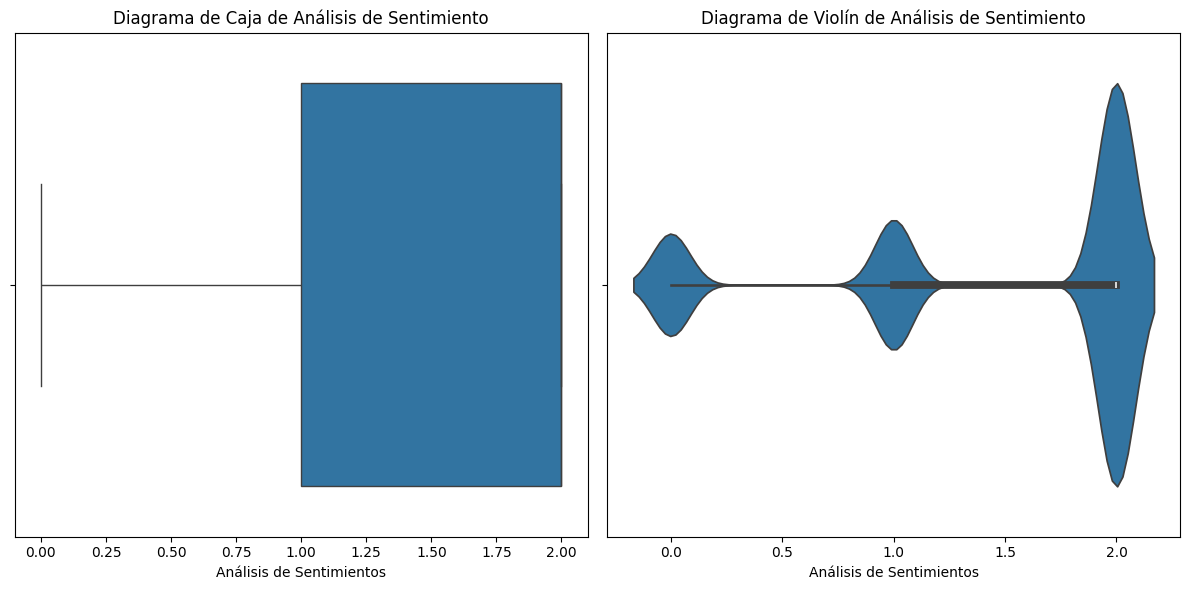

El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor 2.0, indicando un sesgo en esa dirección.
El diagrama de violín revela una distribución con un grupo prominente de datos alrededor del valor 2.0, lo que sugiere un rango común de análisis de sentimientos.


In [128]:
# Importo librerías.
import numpy as np
import seaborn as sns
from scipy import stats

def plot_sentiment_analysis(df):
    """
    Genera un Diagrama de Caja y un Diagrama de Violín para el análisis de sentimientos y proporciona una descripción dinámica.

    Parámetros:
    df (pandas.DataFrame): El DataFrame que contiene los datos del análisis de sentimientos.
    """
    sentiment_data = df['sentiment_analysis']

    # Configuración de la figura
    plt.figure(figsize=(12, 6))

    # Diagrama de Caja
    plt.subplot(1, 2, 1)
    sns.boxplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Caja de Análisis de Sentimiento')

    # Diagrama de Violín
    plt.subplot(1, 2, 2)
    sns.violinplot(x=sentiment_data)
    plt.xlabel('Análisis de Sentimientos')
    plt.title('Diagrama de Violín de Análisis de Sentimiento')

    # Asegurarse de que los gráficos no se superpongan
    plt.tight_layout()
    plt.show()

    # Calculo estadísticas descriptivas
    mode = float(stats.mode(sentiment_data)[0])
    median = np.median(sentiment_data)

    # Imprimo la descripción
    print(f"El diagrama de caja muestra que la mayoría de los datos de análisis de sentimientos se concentran alrededor del valor {median}, indicando un sesgo en esa dirección.")
    print(f"El diagrama de violín revela una distribución con un grupo prominente de datos alrededor del valor {mode}, lo que sugiere un rango común de análisis de sentimientos.")

# Uso de la función
plot_sentiment_analysis(df_user_reviews)

<h3 style="color:blue">
Ahora trabajaré el Users Items

In [129]:
# Ya realizada la carga anteriormente, vemos su contenido
df_users_items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,[]
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [130]:
# Importo librerías.
import pandas as pd

# Itero sobre cada columna
for column in df_users_items.columns:
    # Obtengo el primer valor no nulo
    non_null_values = df_users_items[column].dropna()
    if non_null_values.empty:
        print(f"La columna '{column}' solo contiene valores nulos.")
        continue
    first_non_null_value = non_null_values.iloc[0]

    # Compruebo si es una lista o un diccionario
    if isinstance(first_non_null_value, list):
        print(f"La columna '{column}' contiene una lista.")
    elif isinstance(first_non_null_value, dict):
        print(f"La columna '{column}' contiene un diccionario.")
    else:
        print(f"La columna '{column}' no contiene ni listas ni diccionarios.")

La columna 'user_id' no contiene ni listas ni diccionarios.
La columna 'items_count' no contiene ni listas ni diccionarios.
La columna 'steam_id' no contiene ni listas ni diccionarios.
La columna 'user_url' no contiene ni listas ni diccionarios.
La columna 'items' contiene una lista.


#### Observo que en la columna 'items' contiene un diccionario, lo voy a desanidar para agregar a mi actual df las nuevas columnas fruto del desanidado y consecuentemente procederé a realizar una normalización de los datos para trabajar en ellos.

In [131]:
# Importo librerías.
import pandas as pd
from pandas import json_normalize

def desanidar_y_crear_dummies(df, column):
    """
    Esta función desanida la columna 'items' y crea variables ficticias.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    column (str): El nombre de la columna a desanidar y crear variables ficticias.
    
    Retorna:
    df (pandas.DataFrame): El DataFrame con las nuevas columnas.
    new_columns (list): La lista de las nuevas columnas.
    """
    # Guardo las columnas originales
    original_columns = df.columns

    # Desanido la columna
    df_desanidado = pd.json_normalize(df[column].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {'item_id': 'Sin Dato', 'item_name': 'Sin Dato'}))

    # Reemplazo los valores vacíos con 'Sin Dato'
    df_desanidado = df_desanidado.replace('', 'Sin Dato')

    # Creo variables ficticias
    df_dummies = pd.get_dummies(df_desanidado)

    # Concateno las variables ficticias al DataFrame original
    df = pd.concat([df, df_dummies], axis=1)

    # Elimino la columna original
    df = df.drop(column, axis=1)

    # Encuentro las nuevas columnas después del desanidado
    new_columns = [col for col in df.columns if col not in original_columns]

    return df, new_columns

# Uso de la función para la columna 'items'
df_users_items, new_columns_items = desanidar_y_crear_dummies(df_users_items, 'items')

print(f"""
El df_users_items tiene {df_users_items.shape[0]} filas y {df_users_items.shape[1]} columnas.
Las columnas son: {df_users_items.columns}

Nuevas columnas para 'items': {new_columns_items}
""")


El df_users_items tiene 88310 filas y 2402 columnas.
Las columnas son: Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002',
       'item_id_10090',
       ...
       'item_name_Zeno Clash', 'item_name_Zero Gear',
       'item_name_Zombie Driver', 'item_name_Zombie Driver HD',
       'item_name_Zombie Shooter', 'item_name_Zuma Deluxe',
       'item_name_iBomber Attack', 'item_name_iBomber Defense',
       'item_name_iBomber Defense Pacific', 'item_name_theHunter'],
      dtype='object', length=2402)

Nuevas columnas para 'items': ['playtime_forever', 'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002', 'item_id_10090', 'item_id_10130', 'item_id_10140', 'item_id_10150', 'item_id_10180', 'item_id_10220', 'item_id_102500', 'item_id_102600', 'item_id_102700', 'item_id_102810', 'item_id_102840', 'item_id_104000', 'item_id_104200', 'item_id_10430', 'item_id_104600', 'item_id_104700',

In [132]:
print(df_users_items.columns)

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002',
       'item_id_10090',
       ...
       'item_name_Zeno Clash', 'item_name_Zero Gear',
       'item_name_Zombie Driver', 'item_name_Zombie Driver HD',
       'item_name_Zombie Shooter', 'item_name_Zuma Deluxe',
       'item_name_iBomber Attack', 'item_name_iBomber Defense',
       'item_name_iBomber Defense Pacific', 'item_name_theHunter'],
      dtype='object', length=2402)


### Analizo user_id.

In [135]:
# Importo librerías.
from tqdm import tqdm

def analizar_columna_individual(df, columna):
    """
    Esta función analiza cada columna individualmente,  de un DataFrame de pandas.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    columna (str): El nombre de la columna a analizar.
    
    Retorna:
    None
    """
    # Verifico si la columna existe en el DataFrame
    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # Verifico si hay valores nulos
    num_nulls = df[columna].isnull().sum()
    
    # Obtengo un resumen de la columna
    resumen = df[columna].describe()

    print(f"Columna '{columna}':\n{resumen}\nNúmero de valores nulos = {num_nulls}\n")

# Uso de la función para cada columna nueva
for columna in tqdm(new_columns_items):
    analizar_columna_individual(df_users_items, columna)


  2%|▏         | 40/2398 [00:00<00:11, 199.32it/s]

Columna 'playtime_forever':
count     71504.000000
mean       3600.437178
std       12041.537662
min           0.000000
25%          21.000000
50%         352.000000
75%        1946.250000
max      388621.000000
Name: playtime_forever, dtype: float64
Número de valores nulos = 16806

Columna 'playtime_2weeks':
count    71504.000000
mean        15.093715
std        190.269413
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14201.000000
Name: playtime_2weeks, dtype: float64
Número de valores nulos = 16806

Columna 'item_id_10':
count     88310
unique        2
top       False
freq      84669
Name: item_id_10, dtype: object
Número de valores nulos = 0

Columna 'item_id_10000':
count     88310
unique        2
top       False
freq      88307
Name: item_id_10000, dtype: object
Número de valores nulos = 0

Columna 'item_id_1002':
count     88310
unique        2
top       False
freq      88306
Name: item_id_1002, dtype: object
Número de valores nu

  3%|▎         | 60/2398 [00:00<00:12, 192.72it/s]

Columna 'item_id_108200':
count     88310
unique        2
top       False
freq      88309
Name: item_id_108200, dtype: object
Número de valores nulos = 0

Columna 'item_id_108210':
count     88310
unique        2
top       False
freq      88309
Name: item_id_108210, dtype: object
Número de valores nulos = 0

Columna 'item_id_108600':
count     88310
unique        2
top       False
freq      88308
Name: item_id_108600, dtype: object
Número de valores nulos = 0

Columna 'item_id_108700':
count     88310
unique        2
top       False
freq      88308
Name: item_id_108700, dtype: object
Número de valores nulos = 0

Columna 'item_id_108710':
count     88310
unique        2
top       False
freq      88299
Name: item_id_108710, dtype: object
Número de valores nulos = 0

Columna 'item_id_108800':
count     88310
unique        2
top       False
freq      88296
Name: item_id_108800, dtype: object
Número de valores nulos = 0

Columna 'item_id_109400':
count     88310
unique        2
top       Fa

  4%|▍         | 98/2398 [00:00<00:15, 149.79it/s]

Columna 'item_id_11590':
count     88310
unique        2
top       False
freq      88308
Name: item_id_11590, dtype: object
Número de valores nulos = 0

Columna 'item_id_11610':
count     88310
unique        2
top       False
freq      88294
Name: item_id_11610, dtype: object
Número de valores nulos = 0

Columna 'item_id_116120':
count     88310
unique        2
top       False
freq      88309
Name: item_id_116120, dtype: object
Número de valores nulos = 0

Columna 'item_id_1200':
count     88310
unique        2
top       False
freq      87976
Name: item_id_1200, dtype: object
Número de valores nulos = 0

Columna 'item_id_12100':
count     88310
unique        2
top       False
freq      88286
Name: item_id_12100, dtype: object
Número de valores nulos = 0

Columna 'item_id_12110':
count     88310
unique        2
top       False
freq      88295
Name: item_id_12110, dtype: object
Número de valores nulos = 0

Columna 'item_id_12120':
count     88310
unique        2
top       False
freq     

  5%|▌         | 130/2398 [00:00<00:15, 147.85it/s]

Columna 'item_id_12800':
count     88310
unique        2
top       False
freq      88309
Name: item_id_12800, dtype: object
Número de valores nulos = 0

Columna 'item_id_12810':
count     88310
unique        2
top       False
freq      88304
Name: item_id_12810, dtype: object
Número de valores nulos = 0

Columna 'item_id_12830':
count     88310
unique        2
top       False
freq      88309
Name: item_id_12830, dtype: object
Número de valores nulos = 0

Columna 'item_id_12840':
count     88310
unique        2
top       False
freq      88303
Name: item_id_12840, dtype: object
Número de valores nulos = 0

Columna 'item_id_12860':
count     88310
unique        2
top       False
freq      88307
Name: item_id_12860, dtype: object
Número de valores nulos = 0

Columna 'item_id_12900':
count     88310
unique        2
top       False
freq      88209
Name: item_id_12900, dtype: object
Número de valores nulos = 0

Columna 'item_id_130':
count     88310
unique        2
top       False
freq      8

  7%|▋         | 171/2398 [00:01<00:12, 174.91it/s]

Columna 'item_id_1520':
count     88310
unique        2
top       False
freq      88148
Name: item_id_1520, dtype: object
Número de valores nulos = 0

Columna 'item_id_15200':
count     88310
unique        2
top       False
freq      88307
Name: item_id_15200, dtype: object
Número de valores nulos = 0

Columna 'item_id_15220':
count     88310
unique        2
top       False
freq      88309
Name: item_id_15220, dtype: object
Número de valores nulos = 0

Columna 'item_id_15230':
count     88310
unique        2
top       False
freq      88309
Name: item_id_15230, dtype: object
Número de valores nulos = 0

Columna 'item_id_15270':
count     88310
unique        2
top       False
freq      88309
Name: item_id_15270, dtype: object
Número de valores nulos = 0

Columna 'item_id_1530':
count     88310
unique        2
top       False
freq      88309
Name: item_id_1530, dtype: object
Número de valores nulos = 0

Columna 'item_id_15300':
count     88310
unique        2
top       False
freq      883

  9%|▉         | 224/2398 [00:01<00:10, 216.16it/s]

Columna 'item_id_18500':
count     88310
unique        2
top       False
freq      88294
Name: item_id_18500, dtype: object
Número de valores nulos = 0

Columna 'item_id_18820':
count     88310
unique        2
top       False
freq      88307
Name: item_id_18820, dtype: object
Número de valores nulos = 0

Columna 'item_id_1900':
count     88310
unique        2
top       False
freq      88229
Name: item_id_1900, dtype: object
Número de valores nulos = 0

Columna 'item_id_19000':
count     88310
unique        2
top       False
freq      88309
Name: item_id_19000, dtype: object
Número de valores nulos = 0

Columna 'item_id_19200':
count     88310
unique        2
top       False
freq      88309
Name: item_id_19200, dtype: object
Número de valores nulos = 0

Columna 'item_id_1930':
count     88310
unique        2
top       False
freq      88308
Name: item_id_1930, dtype: object
Número de valores nulos = 0

Columna 'item_id_19680':
count     88310
unique        2
top       False
freq      883

 11%|█▏        | 272/2398 [00:01<00:09, 225.61it/s]

Columna 'item_id_204100':
count     88310
unique        2
top       False
freq      88306
Name: item_id_204100, dtype: object
Número de valores nulos = 0

Columna 'item_id_204140':
count     88310
unique        2
top       False
freq      88309
Name: item_id_204140, dtype: object
Número de valores nulos = 0

Columna 'item_id_204180':
count     88310
unique        2
top       False
freq      88307
Name: item_id_204180, dtype: object
Número de valores nulos = 0

Columna 'item_id_204300':
count     88310
unique        2
top       False
freq      88247
Name: item_id_204300, dtype: object
Número de valores nulos = 0

Columna 'item_id_204340':
count     88310
unique        2
top       False
freq      88308
Name: item_id_204340, dtype: object
Número de valores nulos = 0

Columna 'item_id_204360':
count     88310
unique        2
top       False
freq      88254
Name: item_id_204360, dtype: object
Número de valores nulos = 0

Columna 'item_id_204450':
count     88310
unique        2
top       Fa

 14%|█▎        | 327/2398 [00:01<00:08, 242.42it/s]

Columna 'item_id_209270':
count     88310
unique        2
top       False
freq      88301
Name: item_id_209270, dtype: object
Número de valores nulos = 0

Columna 'item_id_209520':
count     88310
unique        2
top       False
freq      88309
Name: item_id_209520, dtype: object
Número de valores nulos = 0

Columna 'item_id_209650':
count     88310
unique        2
top       False
freq      88308
Name: item_id_209650, dtype: object
Número de valores nulos = 0

Columna 'item_id_209710':
count     88310
unique        2
top       False
freq      88309
Name: item_id_209710, dtype: object
Número de valores nulos = 0

Columna 'item_id_209730':
count     88310
unique        2
top       False
freq      88306
Name: item_id_209730, dtype: object
Número de valores nulos = 0

Columna 'item_id_209870':
count     88310
unique        2
top       False
freq      88275
Name: item_id_209870, dtype: object
Número de valores nulos = 0

Columna 'item_id_2100':
count     88310
unique        2
top       Fals

 16%|█▌        | 379/2398 [00:01<00:08, 244.37it/s]

Columna 'item_id_215790':
count     88310
unique        2
top       False
freq      88309
Name: item_id_215790, dtype: object
Número de valores nulos = 0

Columna 'item_id_215870':
count     88310
unique        2
top       False
freq      88309
Name: item_id_215870, dtype: object
Número de valores nulos = 0

Columna 'item_id_216110':
count     88310
unique        2
top       False
freq      88309
Name: item_id_216110, dtype: object
Número de valores nulos = 0

Columna 'item_id_216150':
count     88310
unique        2
top       False
freq      88297
Name: item_id_216150, dtype: object
Número de valores nulos = 0

Columna 'item_id_216250':
count     88310
unique        2
top       False
freq      88306
Name: item_id_216250, dtype: object
Número de valores nulos = 0

Columna 'item_id_21640':
count     88310
unique        2
top       False
freq      88309
Name: item_id_21640, dtype: object
Número de valores nulos = 0

Columna 'item_id_21660':
count     88310
unique        2
top       False

 18%|█▊        | 441/2398 [00:02<00:07, 260.29it/s]

Columna 'item_id_221910':
count     88310
unique        2
top       False
freq      88308
Name: item_id_221910, dtype: object
Número de valores nulos = 0

Columna 'item_id_22200':
count     88310
unique        2
top       False
freq      88300
Name: item_id_22200, dtype: object
Número de valores nulos = 0

Columna 'item_id_222140':
count     88310
unique        2
top       False
freq      88308
Name: item_id_222140, dtype: object
Número de valores nulos = 0

Columna 'item_id_22230':
count     88310
unique        2
top       False
freq      88306
Name: item_id_22230, dtype: object
Número de valores nulos = 0

Columna 'item_id_222520':
count     88310
unique        2
top       False
freq      88305
Name: item_id_222520, dtype: object
Número de valores nulos = 0

Columna 'item_id_222730':
count     88310
unique        2
top       False
freq      88308
Name: item_id_222730, dtype: object
Número de valores nulos = 0

Columna 'item_id_222750':
count     88310
unique        2
top       False


 21%|██        | 499/2398 [00:02<00:07, 262.18it/s]

Columna 'item_id_229520':
count     88310
unique        2
top       False
freq      88309
Name: item_id_229520, dtype: object
Número de valores nulos = 0

Columna 'item_id_229600':
count     88310
unique        2
top       False
freq      88309
Name: item_id_229600, dtype: object
Número de valores nulos = 0

Columna 'item_id_229870':
count     88310
unique        2
top       False
freq      88309
Name: item_id_229870, dtype: object
Número de valores nulos = 0

Columna 'item_id_2300':
count     88310
unique        2
top       False
freq      88303
Name: item_id_2300, dtype: object
Número de valores nulos = 0

Columna 'item_id_230050':
count     88310
unique        2
top       False
freq      88307
Name: item_id_230050, dtype: object
Número de valores nulos = 0

Columna 'item_id_230170':
count     88310
unique        2
top       False
freq      88308
Name: item_id_230170, dtype: object
Número de valores nulos = 0

Columna 'item_id_230410':
count     88310
unique        2
top       False


 23%|██▎       | 557/2398 [00:02<00:06, 265.76it/s]

Columna 'item_id_238460':
count     88310
unique        2
top       False
freq      88306
Name: item_id_238460, dtype: object
Número de valores nulos = 0

Columna 'item_id_238960':
count     88310
unique        2
top       False
freq      88289
Name: item_id_238960, dtype: object
Número de valores nulos = 0

Columna 'item_id_239030':
count     88310
unique        2
top       False
freq      88307
Name: item_id_239030, dtype: object
Número de valores nulos = 0

Columna 'item_id_239070':
count     88310
unique        2
top       False
freq      88309
Name: item_id_239070, dtype: object
Número de valores nulos = 0

Columna 'item_id_239220':
count     88310
unique        2
top       False
freq      88304
Name: item_id_239220, dtype: object
Número de valores nulos = 0

Columna 'item_id_239450':
count     88310
unique        2
top       False
freq      88307
Name: item_id_239450, dtype: object
Número de valores nulos = 0

Columna 'item_id_239660':
count     88310
unique        2
top       Fa

 26%|██▌       | 615/2398 [00:02<00:06, 274.98it/s]

Columna 'item_id_251670':
count     88310
unique        2
top       False
freq      88305
Name: item_id_251670, dtype: object
Número de valores nulos = 0

Columna 'item_id_2520':
count     88310
unique        2
top       False
freq      88309
Name: item_id_2520, dtype: object
Número de valores nulos = 0

Columna 'item_id_252150':
count     88310
unique        2
top       False
freq      88308
Name: item_id_252150, dtype: object
Número de valores nulos = 0

Columna 'item_id_252330':
count     88310
unique        2
top       False
freq      88309
Name: item_id_252330, dtype: object
Número de valores nulos = 0

Columna 'item_id_252490':
count     88310
unique        2
top       False
freq      88280
Name: item_id_252490, dtype: object
Número de valores nulos = 0

Columna 'item_id_252950':
count     88310
unique        2
top       False
freq      88304
Name: item_id_252950, dtype: object
Número de valores nulos = 0

Columna 'item_id_253430':
count     88310
unique        2
top       False


 28%|██▊       | 672/2398 [00:02<00:06, 272.12it/s]

Columna 'item_id_271590':
count     88310
unique        2
top       False
freq      88306
Name: item_id_271590, dtype: object
Número de valores nulos = 0

Columna 'item_id_272060':
count     88310
unique        2
top       False
freq      88309
Name: item_id_272060, dtype: object
Número de valores nulos = 0

Columna 'item_id_272350':
count     88310
unique        2
top       False
freq      88303
Name: item_id_272350, dtype: object
Número de valores nulos = 0

Columna 'item_id_273110':
count     88310
unique        2
top       False
freq      88287
Name: item_id_273110, dtype: object
Número de valores nulos = 0

Columna 'item_id_273350':
count     88310
unique        2
top       False
freq      88308
Name: item_id_273350, dtype: object
Número de valores nulos = 0

Columna 'item_id_27400':
count     88310
unique        2
top       False
freq      88309
Name: item_id_27400, dtype: object
Número de valores nulos = 0

Columna 'item_id_274560':
count     88310
unique        2
top       Fals

 31%|███       | 735/2398 [00:03<00:06, 275.69it/s]

Columna 'item_id_301910':
count     88310
unique        2
top       False
freq      88309
Name: item_id_301910, dtype: object
Número de valores nulos = 0

Columna 'item_id_3020':
count     88310
unique        2
top       False
freq      88309
Name: item_id_3020, dtype: object
Número de valores nulos = 0

Columna 'item_id_302380':
count     88310
unique        2
top       False
freq      88307
Name: item_id_302380, dtype: object
Número de valores nulos = 0

Columna 'item_id_302830':
count     88310
unique        2
top       False
freq      88303
Name: item_id_302830, dtype: object
Número de valores nulos = 0

Columna 'item_id_304030':
count     88310
unique        2
top       False
freq      88309
Name: item_id_304030, dtype: object
Número de valores nulos = 0

Columna 'item_id_304050':
count     88310
unique        2
top       False
freq      88293
Name: item_id_304050, dtype: object
Número de valores nulos = 0

Columna 'item_id_304270':
count     88310
unique        2
top       False


 33%|███▎      | 794/2398 [00:03<00:05, 271.64it/s]

Columna 'item_id_326180':
count     88310
unique        2
top       False
freq      88309
Name: item_id_326180, dtype: object
Número de valores nulos = 0

Columna 'item_id_326460':
count     88310
unique        2
top       False
freq      88308
Name: item_id_326460, dtype: object
Número de valores nulos = 0

Columna 'item_id_326960':
count     88310
unique        2
top       False
freq      88309
Name: item_id_326960, dtype: object
Número de valores nulos = 0

Columna 'item_id_3270':
count     88310
unique        2
top       False
freq      88308
Name: item_id_3270, dtype: object
Número de valores nulos = 0

Columna 'item_id_32720':
count     88310
unique        2
top       False
freq      88309
Name: item_id_32720, dtype: object
Número de valores nulos = 0

Columna 'item_id_32800':
count     88310
unique        2
top       False
freq      88289
Name: item_id_32800, dtype: object
Número de valores nulos = 0

Columna 'item_id_32900':
count     88310
unique        2
top       False
freq 

 36%|███▌      | 854/2398 [00:03<00:05, 278.47it/s]

Columna 'item_id_3480':
count     88310
unique        2
top       False
freq      88299
Name: item_id_3480, dtype: object
Número de valores nulos = 0

Columna 'item_id_34810':
count     88310
unique        2
top       False
freq      88309
Name: item_id_34810, dtype: object
Número de valores nulos = 0

Columna 'item_id_34820':
count     88310
unique        2
top       False
freq      88309
Name: item_id_34820, dtype: object
Número de valores nulos = 0

Columna 'item_id_3483':
count     88310
unique        2
top       False
freq      88309
Name: item_id_3483, dtype: object
Número de valores nulos = 0

Columna 'item_id_34830':
count     88310
unique        2
top       False
freq      88294
Name: item_id_34830, dtype: object
Número de valores nulos = 0

Columna 'item_id_34870':
count     88310
unique        2
top       False
freq      88309
Name: item_id_34870, dtype: object
Número de valores nulos = 0

Columna 'item_id_34900':
count     88310
unique        2
top       False
freq      882

 38%|███▊      | 910/2398 [00:03<00:05, 271.13it/s]

Columna 'item_id_38600':
count     88310
unique        2
top       False
freq      88308
Name: item_id_38600, dtype: object
Número de valores nulos = 0

Columna 'item_id_386360':
count     88310
unique        2
top       False
freq      88307
Name: item_id_386360, dtype: object
Número de valores nulos = 0

Columna 'item_id_38700':
count     88310
unique        2
top       False
freq      88303
Name: item_id_38700, dtype: object
Número de valores nulos = 0

Columna 'item_id_38720':
count     88310
unique        2
top       False
freq      88304
Name: item_id_38720, dtype: object
Número de valores nulos = 0

Columna 'item_id_38740':
count     88310
unique        2
top       False
freq      88309
Name: item_id_38740, dtype: object
Número de valores nulos = 0

Columna 'item_id_38830':
count     88310
unique        2
top       False
freq      88265
Name: item_id_38830, dtype: object
Número de valores nulos = 0

Columna 'item_id_38900':
count     88310
unique        2
top       False
freq   

 40%|████      | 970/2398 [00:03<00:05, 273.72it/s]

Columna 'item_id_42680':
count     88310
unique        2
top       False
freq      88135
Name: item_id_42680, dtype: object
Número de valores nulos = 0

Columna 'item_id_42700':
count     88310
unique        2
top       False
freq      88130
Name: item_id_42700, dtype: object
Número de valores nulos = 0

Columna 'item_id_427730':
count     88310
unique        2
top       False
freq      88309
Name: item_id_427730, dtype: object
Número de valores nulos = 0

Columna 'item_id_428690':
count     88310
unique        2
top       False
freq      88309
Name: item_id_428690, dtype: object
Número de valores nulos = 0

Columna 'item_id_42910':
count     88310
unique        2
top       False
freq      88168
Name: item_id_42910, dtype: object
Número de valores nulos = 0

Columna 'item_id_429470':
count     88310
unique        2
top       False
freq      88309
Name: item_id_429470, dtype: object
Número de valores nulos = 0

Columna 'item_id_42960':
count     88310
unique        2
top       False
fre

 42%|████▏     | 999/2398 [00:04<00:05, 276.84it/s]

Columna 'item_id_47540':
count     88310
unique        2
top       False
freq      88309
Name: item_id_47540, dtype: object
Número de valores nulos = 0

Columna 'item_id_4760':
count     88310
unique        2
top       False
freq      88175
Name: item_id_4760, dtype: object
Número de valores nulos = 0

Columna 'item_id_4770':
count     88310
unique        2
top       False
freq      88309
Name: item_id_4770, dtype: object
Número de valores nulos = 0

Columna 'item_id_47700':
count     88310
unique        2
top       False
freq      88305
Name: item_id_47700, dtype: object
Número de valores nulos = 0

Columna 'item_id_47780':
count     88310
unique        2
top       False
freq      88307
Name: item_id_47780, dtype: object
Número de valores nulos = 0

Columna 'item_id_47790':
count     88310
unique        2
top       False
freq      88308
Name: item_id_47790, dtype: object
Número de valores nulos = 0

Columna 'item_id_47810':
count     88310
unique        2
top       False
freq      883

 45%|████▌     | 1087/2398 [00:04<00:04, 278.79it/s]

Columna 'item_id_55230':
count     88310
unique        2
top       False
freq      88241
Name: item_id_55230, dtype: object
Número de valores nulos = 0

Columna 'item_id_55370':
count     88310
unique        2
top       False
freq      88309
Name: item_id_55370, dtype: object
Número de valores nulos = 0

Columna 'item_id_56400':
count     88310
unique        2
top       False
freq      88290
Name: item_id_56400, dtype: object
Número de valores nulos = 0

Columna 'item_id_57200':
count     88310
unique        2
top       False
freq      88309
Name: item_id_57200, dtype: object
Número de valores nulos = 0

Columna 'item_id_57300':
count     88310
unique        2
top       False
freq      88281
Name: item_id_57300, dtype: object
Número de valores nulos = 0

Columna 'item_id_57400':
count     88310
unique        2
top       False
freq      88306
Name: item_id_57400, dtype: object
Número de valores nulos = 0

Columna 'item_id_57690':
count     88310
unique        2
top       False
freq     

 48%|████▊     | 1146/2398 [00:04<00:04, 279.36it/s]

Columna 'item_id_6850':
count     88310
unique        2
top       False
freq      88272
Name: item_id_6850, dtype: object
Número de valores nulos = 0

Columna 'item_id_6860':
count     88310
unique        2
top       False
freq      88218
Name: item_id_6860, dtype: object
Número de valores nulos = 0

Columna 'item_id_6870':
count     88310
unique        2
top       False
freq      88305
Name: item_id_6870, dtype: object
Número de valores nulos = 0

Columna 'item_id_6880':
count     88310
unique        2
top       False
freq      88269
Name: item_id_6880, dtype: object
Número de valores nulos = 0

Columna 'item_id_6900':
count     88310
unique        2
top       False
freq      88307
Name: item_id_6900, dtype: object
Número de valores nulos = 0

Columna 'item_id_6910':
count     88310
unique        2
top       False
freq      88264
Name: item_id_6910, dtype: object
Número de valores nulos = 0

Columna 'item_id_6920':
count     88310
unique        2
top       False
freq      88306
Name: 

 50%|█████     | 1205/2398 [00:04<00:04, 284.77it/s]

Columna 'item_id_8160':
count     88310
unique        2
top       False
freq      88309
Name: item_id_8160, dtype: object
Número de valores nulos = 0

Columna 'item_id_8170':
count     88310
unique        2
top       False
freq      88305
Name: item_id_8170, dtype: object
Número de valores nulos = 0

Columna 'item_id_8190':
count     88310
unique        2
top       False
freq      88158
Name: item_id_8190, dtype: object
Número de valores nulos = 0

Columna 'item_id_8400':
count     88310
unique        2
top       False
freq      88288
Name: item_id_8400, dtype: object
Número de valores nulos = 0

Columna 'item_id_8500':
count     88310
unique        2
top       False
freq      88300
Name: item_id_8500, dtype: object
Número de valores nulos = 0

Columna 'item_id_8600':
count     88310
unique        2
top       False
freq      88289
Name: item_id_8600, dtype: object
Número de valores nulos = 0

Columna 'item_id_8650':
count     88310
unique        2
top       False
freq      88301
Name: 

 51%|█████▏    | 1234/2398 [00:04<00:04, 275.10it/s]

Columna 'item_name_688(I) Hunter/Killer':
count     88310
unique        2
top       False
freq      88306
Name: item_name_688(I) Hunter/Killer, dtype: object
Número de valores nulos = 0

Columna 'item_name_7 Days to Die':
count     88310
unique        2
top       False
freq      88306
Name: item_name_7 Days to Die, dtype: object
Número de valores nulos = 0

Columna 'item_name_8BitMMO':
count     88310
unique        2
top       False
freq      88306
Name: item_name_8BitMMO, dtype: object
Número de valores nulos = 0

Columna 'item_name_A Game of Dwarves':
count     88310
unique        2
top       False
freq      88309
Name: item_name_A Game of Dwarves, dtype: object
Número de valores nulos = 0

Columna 'item_name_A Game of Thrones - Genesis':
count     88310
unique        2
top       False
freq      88308
Name: item_name_A Game of Thrones - Genesis, dtype: object
Número de valores nulos = 0

Columna 'item_name_A.R.E.S.':
count     88310
unique        2
top       False
freq      88309
Nam

 55%|█████▌    | 1324/2398 [00:05<00:03, 288.82it/s]

Columna 'item_name_Antichamber':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Antichamber, dtype: object
Número de valores nulos = 0

Columna 'item_name_AquaNox':
count     88310
unique        2
top       False
freq      88309
Name: item_name_AquaNox, dtype: object
Número de valores nulos = 0

Columna 'item_name_Aquaria':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Aquaria, dtype: object
Número de valores nulos = 0

Columna 'item_name_ArcheAge':
count     88310
unique        2
top       False
freq      88309
Name: item_name_ArcheAge, dtype: object
Número de valores nulos = 0

Columna 'item_name_Archeblade':
count     88310
unique        2
top       False
freq      88289
Name: item_name_Archeblade, dtype: object
Número de valores nulos = 0

Columna 'item_name_Arctic Combat':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Arctic Combat, dtype: object
Número de valores nulos = 0

Column

 56%|█████▋    | 1354/2398 [00:05<00:03, 281.99it/s]

Columna 'item_name_Blood Bowl: Legendary Edition':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Blood Bowl: Legendary Edition, dtype: object
Número de valores nulos = 0

Columna 'item_name_BloodRayne':
count     88310
unique        2
top       False
freq      88291
Name: item_name_BloodRayne, dtype: object
Número de valores nulos = 0

Columna 'item_name_BloodRayne 2':
count     88310
unique        2
top       False
freq      88307
Name: item_name_BloodRayne 2, dtype: object
Número de valores nulos = 0

Columna 'item_name_Bloodline Champions':
count     88310
unique        2
top       False
freq      88304
Name: item_name_Bloodline Champions, dtype: object
Número de valores nulos = 0

Columna 'item_name_Bloons TD Battles':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Bloons TD Battles, dtype: object
Número de valores nulos = 0

Columna 'item_name_Blur':
count     88310
unique        2
top       False
freq      88309
N

 59%|█████▉    | 1413/2398 [00:05<00:03, 269.47it/s]

Columna 'item_name_Chains':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Chains, dtype: object
Número de valores nulos = 0

Columna 'item_name_Champions Online':
count     88310
unique        2
top       False
freq      88306
Name: item_name_Champions Online, dtype: object
Número de valores nulos = 0

Columna 'item_name_Champions of Regnum':
count     88310
unique        2
top       False
freq      88305
Name: item_name_Champions of Regnum, dtype: object
Número de valores nulos = 0

Columna 'item_name_Championship Manager 2007':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Championship Manager 2007, dtype: object
Número de valores nulos = 0

Columna 'item_name_Chaos Heroes Online':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Chaos Heroes Online, dtype: object
Número de valores nulos = 0

Columna 'item_name_Chaser':
count     88310
unique        2
top       False
freq      88309
Nam

 62%|██████▏   | 1478/2398 [00:05<00:03, 280.24it/s]

Columna 'item_name_DCS World':
count     88310
unique        2
top       False
freq      88308
Name: item_name_DCS World, dtype: object
Número de valores nulos = 0

Columna 'item_name_DEFCON':
count     88310
unique        2
top       False
freq      88148
Name: item_name_DEFCON, dtype: object
Número de valores nulos = 0

Columna 'item_name_DETOUR':
count     88310
unique        2
top       False
freq      88307
Name: item_name_DETOUR, dtype: object
Número de valores nulos = 0

Columna 'item_name_DLC Quest':
count     88310
unique        2
top       False
freq      88307
Name: item_name_DLC Quest, dtype: object
Número de valores nulos = 0

Columna 'item_name_DOOM':
count     88310
unique        2
top       False
freq      88309
Name: item_name_DOOM, dtype: object
Número de valores nulos = 0

Columna 'item_name_DOOM 3':
count     88310
unique        2
top       False
freq      88294
Name: item_name_DOOM 3, dtype: object
Número de valores nulos = 0

Columna 'item_name_DOOM 3: BFG Edition

 64%|██████▍   | 1542/2398 [00:06<00:03, 277.82it/s]

Columna 'item_name_Don't Starve':
count     88310
unique        2
top       False
freq      88242
Name: item_name_Don't Starve, dtype: object
Número de valores nulos = 0

Columna 'item_name_Dota 2 Test':
count     88310
unique        2
top       False
freq      82533
Name: item_name_Dota 2 Test, dtype: object
Número de valores nulos = 0

Columna 'item_name_Double Action: Boogaloo':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Double Action: Boogaloo, dtype: object
Número de valores nulos = 0

Columna 'item_name_Dracula: Origin':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Dracula: Origin, dtype: object
Número de valores nulos = 0

Columna 'item_name_Dragon Age: Origins':
count     88310
unique        2
top       False
freq      88297
Name: item_name_Dragon Age: Origins, dtype: object
Número de valores nulos = 0

Columna 'item_name_Dragon Age: Origins - Ultimate Edition':
count     88310
unique        2
top       Fal

 66%|██████▌   | 1571/2398 [00:06<00:04, 203.78it/s]

Columna 'item_name_F.E.A.R.':
count     88310
unique        2
top       False
freq      88308
Name: item_name_F.E.A.R., dtype: object
Número de valores nulos = 0

Columna 'item_name_F.E.A.R. 2: Project Origin':
count     88310
unique        2
top       False
freq      88286
Name: item_name_F.E.A.R. 2: Project Origin, dtype: object
Número de valores nulos = 0

Columna 'item_name_F.E.A.R. 3':
count     88310
unique        2
top       False
freq      88293
Name: item_name_F.E.A.R. 3, dtype: object
Número de valores nulos = 0

Columna 'item_name_F1 2010™':
count     88310
unique        2
top       False
freq      88309
Name: item_name_F1 2010™, dtype: object
Número de valores nulos = 0

Columna 'item_name_F1 2012':
count     88310
unique        2
top       False
freq      88307
Name: item_name_F1 2012, dtype: object
Número de valores nulos = 0

Columna 'item_name_FEZ':
count     88310
unique        2
top       False
freq      88308
Name: item_name_FEZ, dtype: object
Número de valores nulos

 67%|██████▋   | 1595/2398 [00:06<00:04, 178.57it/s]

Columna 'item_name_Fallout: New Vegas':
count     88310
unique        2
top       False
freq      88243
Name: item_name_Fallout: New Vegas, dtype: object
Número de valores nulos = 0

Columna 'item_name_Far Cry':
count     88310
unique        2
top       False
freq      88293
Name: item_name_Far Cry, dtype: object
Número de valores nulos = 0

Columna 'item_name_Far Cry 2':
count     88310
unique        2
top       False
freq      88274
Name: item_name_Far Cry 2, dtype: object
Número de valores nulos = 0

Columna 'item_name_Far Cry® 3':
count     88310
unique        2
top       False
freq      88295
Name: item_name_Far Cry® 3, dtype: object
Número de valores nulos = 0

Columna 'item_name_Far Cry® 3 Blood Dragon':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Far Cry® 3 Blood Dragon, dtype: object
Número de valores nulos = 0

Columna 'item_name_Farming Simulator 15':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Farming S

 67%|██████▋   | 1616/2398 [00:06<00:05, 146.84it/s]

Columna 'item_name_Flight Control HD':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Flight Control HD, dtype: object
Número de valores nulos = 0

Columna 'item_name_Flight of the Icarus':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Flight of the Icarus, dtype: object
Número de valores nulos = 0

Columna 'item_name_Floating Point':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Floating Point, dtype: object
Número de valores nulos = 0

Columna 'item_name_Football Manager 2009':
count     88310
unique        2
top       False
freq      88305
Name: item_name_Football Manager 2009, dtype: object
Número de valores nulos = 0

Columna 'item_name_Football Manager 2009 Korean':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Football Manager 2009 Korean, dtype: object
Número de valores nulos = 0

Columna 'item_name_Football Manager 2010':
count     88310
unique

 68%|██████▊   | 1633/2398 [00:06<00:05, 138.75it/s]

Columna 'item_name_Frontlines: Fuel of War':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Frontlines: Fuel of War, dtype: object
Número de valores nulos = 0

Columna 'item_name_Frozen Hearth':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Frozen Hearth, dtype: object
Número de valores nulos = 0

Columna 'item_name_Frozen Synapse':
count     88310
unique        2
top       False
freq      88305
Name: item_name_Frozen Synapse, dtype: object
Número de valores nulos = 0

Columna 'item_name_Full Pipe':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Full Pipe, dtype: object
Número de valores nulos = 0

Columna 'item_name_Full Spectrum Warrior':
count     88310
unique        2
top       False
freq      88306
Name: item_name_Full Spectrum Warrior, dtype: object
Número de valores nulos = 0

Columna 'item_name_Future Wars':
count     88310
unique        2
top       False
freq      88309
Name: it

 71%|███████▏  | 1710/2398 [00:07<00:03, 206.77it/s]

Columna 'item_name_Grand Theft Auto IV':
count     88310
unique        2
top       False
freq      88103
Name: item_name_Grand Theft Auto IV, dtype: object
Número de valores nulos = 0

Columna 'item_name_Grand Theft Auto V':
count     88310
unique        2
top       False
freq      88306
Name: item_name_Grand Theft Auto V, dtype: object
Número de valores nulos = 0

Columna 'item_name_Grand Theft Auto: Episodes from Liberty City':
count     88310
unique        2
top       False
freq      88304
Name: item_name_Grand Theft Auto: Episodes from Liberty City, dtype: object
Número de valores nulos = 0

Columna 'item_name_Grand Theft Auto: San Andreas':
count     88310
unique        2
top       False
freq      88194
Name: item_name_Grand Theft Auto: San Andreas, dtype: object
Número de valores nulos = 0

Columna 'item_name_Grand Theft Auto: Vice City':
count     88310
unique        2
top       False
freq      88295
Name: item_name_Grand Theft Auto: Vice City, dtype: object
Número de valores nu

 72%|███████▏  | 1733/2398 [00:07<00:03, 166.56it/s]

Columna 'item_name_Jagged Alliance - Back in Action':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Jagged Alliance - Back in Action, dtype: object
Número de valores nulos = 0

Columna 'item_name_Jagged Alliance 2: Gold Pack':
count     88310
unique        2
top       False
freq      88301
Name: item_name_Jagged Alliance 2: Gold Pack, dtype: object
Número de valores nulos = 0

Columna 'item_name_Jagged Alliance Online - Steam Edition':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Jagged Alliance Online - Steam Edition, dtype: object
Número de valores nulos = 0

Columna 'item_name_Jet Set Radio':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Jet Set Radio, dtype: object
Número de valores nulos = 0

Columna 'item_name_Joint Task Force':
count     88310
unique        2
top       False
freq      88305
Name: item_name_Joint Task Force, dtype: object
Número de valores nulos = 0

Columna 'it

 74%|███████▍  | 1776/2398 [00:07<00:03, 162.60it/s]

Columna 'item_name_L.A. Noire':
count     88310
unique        2
top       False
freq      88299
Name: item_name_L.A. Noire, dtype: object
Número de valores nulos = 0

Columna 'item_name_LEGO Batman: The Videogame':
count     88310
unique        2
top       False
freq      88304
Name: item_name_LEGO Batman: The Videogame, dtype: object
Número de valores nulos = 0

Columna 'item_name_LEGO® MARVEL Super Heroes':
count     88310
unique        2
top       False
freq      88306
Name: item_name_LEGO® MARVEL Super Heroes, dtype: object
Número de valores nulos = 0

Columna 'item_name_LEGO® Star Wars™ III: The Clone Wars™':
count     88310
unique        2
top       False
freq      88306
Name: item_name_LEGO® Star Wars™ III: The Clone Wars™, dtype: object
Número de valores nulos = 0

Columna 'item_name_LEGO® Star Wars™: The Complete Saga':
count     88310
unique        2
top       False
freq      88301
Name: item_name_LEGO® Star Wars™: The Complete Saga, dtype: object
Número de valores nulos = 0


 76%|███████▋  | 1832/2398 [00:07<00:02, 207.82it/s]

Columna 'item_name_Making History II: The War of the World':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Making History II: The War of the World, dtype: object
Número de valores nulos = 0

Columna 'item_name_Making History: The Calm & The Storm':
count     88310
unique        2
top       False
freq      88302
Name: item_name_Making History: The Calm & The Storm, dtype: object
Número de valores nulos = 0

Columna 'item_name_Manhunt':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Manhunt, dtype: object
Número de valores nulos = 0

Columna 'item_name_MapleStory':
count     88310
unique        2
top       False
freq      88297
Name: item_name_MapleStory, dtype: object
Número de valores nulos = 0

Columna 'item_name_March of War':
count     88310
unique        2
top       False
freq      88307
Name: item_name_March of War, dtype: object
Número de valores nulos = 0

Columna 'item_name_Mark of the Ninja':
count     88310
un

 80%|████████  | 1923/2398 [00:08<00:01, 258.49it/s]

Columna 'item_name_Naval Warfare':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Naval Warfare, dtype: object
Número de valores nulos = 0

Columna 'item_name_Need for Speed: Hot Pursuit':
count     88310
unique        2
top       False
freq      88293
Name: item_name_Need for Speed: Hot Pursuit, dtype: object
Número de valores nulos = 0

Columna 'item_name_Need for Speed: SHIFT':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Need for Speed: SHIFT, dtype: object
Número de valores nulos = 0

Columna 'item_name_Need for Speed: Undercover':
count     88310
unique        2
top       False
freq      88293
Name: item_name_Need for Speed: Undercover, dtype: object
Número de valores nulos = 0

Columna 'item_name_Nether':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Nether, dtype: object
Número de valores nulos = 0

Columna 'item_name_Neverwinter':
count     88310
unique        2
top       Fals

 81%|████████▏ | 1950/2398 [00:08<00:01, 244.57it/s]

Columna 'item_name_Pinball FX2':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Pinball FX2, dtype: object
Número de valores nulos = 0

Columna 'item_name_Pirates of Black Cove Gold':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Pirates of Black Cove Gold, dtype: object
Número de valores nulos = 0

Columna 'item_name_Pizza Frenzy':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Pizza Frenzy, dtype: object
Número de valores nulos = 0

Columna 'item_name_PlanetSide 2':
count     88310
unique        2
top       False
freq      88223
Name: item_name_PlanetSide 2, dtype: object
Número de valores nulos = 0

Columna 'item_name_Plant Tycoon':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Plant Tycoon, dtype: object
Número de valores nulos = 0

Columna 'item_name_Plants vs. Zombies: Game of the Year':
count     88310
unique        2
top       False
freq      882

 84%|████████▎ | 2003/2398 [00:08<00:01, 231.79it/s]

Columna 'item_name_RACE 07':
count     88310
unique        2
top       False
freq      88289
Name: item_name_RACE 07, dtype: object
Número de valores nulos = 0

Columna 'item_name_RACE 07 - Formula RaceRoom Add-On':
count     88310
unique        2
top       False
freq      88309
Name: item_name_RACE 07 - Formula RaceRoom Add-On, dtype: object
Número de valores nulos = 0

Columna 'item_name_RACE 07: Andy Priaulx Crowne Plaza Raceway':
count     88310
unique        2
top       False
freq      88301
Name: item_name_RACE 07: Andy Priaulx Crowne Plaza Raceway, dtype: object
Número de valores nulos = 0

Columna 'item_name_RAGE':
count     88310
unique        2
top       False
freq      88306
Name: item_name_RAGE, dtype: object
Número de valores nulos = 0

Columna 'item_name_RAW - Realms of Ancient War':
count     88310
unique        2
top       False
freq      88306
Name: item_name_RAW - Realms of Ancient War, dtype: object
Número de valores nulos = 0

Columna 'item_name_RIFT':
count     883

 86%|████████▌ | 2054/2398 [00:08<00:01, 238.73it/s]

Columna 'item_name_RoboBlitz':
count     88310
unique        2
top       False
freq      88308
Name: item_name_RoboBlitz, dtype: object
Número de valores nulos = 0

Columna 'item_name_Robocraft':
count     88310
unique        2
top       False
freq      88248
Name: item_name_Robocraft, dtype: object
Número de valores nulos = 0

Columna 'item_name_Rochard':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Rochard, dtype: object
Número de valores nulos = 0

Columna 'item_name_Rock of Ages':
count     88310
unique        2
top       False
freq      88306
Name: item_name_Rock of Ages, dtype: object
Número de valores nulos = 0

Columna 'item_name_Rocket League':
count     88310
unique        2
top       False
freq      88304
Name: item_name_Rocket League, dtype: object
Número de valores nulos = 0

Columna 'item_name_Rocket Mania! Deluxe':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Rocket Mania! Deluxe, dtype: object
Número 

 88%|████████▊ | 2108/2398 [00:08<00:01, 241.66it/s]

Columna 'item_name_Scania Truck Driving Simulator':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Scania Truck Driving Simulator, dtype: object
Número de valores nulos = 0

Columna 'item_name_School of Dragons: How to Train Your Dragon':
count     88310
unique        2
top       False
freq      88307
Name: item_name_School of Dragons: How to Train Your Dragon, dtype: object
Número de valores nulos = 0

Columna 'item_name_Scribblenauts Unlimited':
count     88310
unique        2
top       False
freq      88250
Name: item_name_Scribblenauts Unlimited, dtype: object
Número de valores nulos = 0

Columna 'item_name_Scribblenauts Unmasked':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Scribblenauts Unmasked, dtype: object
Número de valores nulos = 0

Columna 'item_name_Secret Files: Tunguska':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Secret Files: Tunguska, dtype: object
Número de valo

 90%|█████████ | 2163/2398 [00:09<00:00, 244.17it/s]

Columna 'item_name_Sonic & All-Stars Racing Transformed':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Sonic & All-Stars Racing Transformed, dtype: object
Número de valores nulos = 0

Columna 'item_name_Sonic Adventure DX':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Sonic Adventure DX, dtype: object
Número de valores nulos = 0

Columna 'item_name_Sonic Adventure™ 2 ':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Sonic Adventure™ 2 , dtype: object
Número de valores nulos = 0

Columna 'item_name_Sonic Generations':
count     88310
unique        2
top       False
freq      88304
Name: item_name_Sonic Generations, dtype: object
Número de valores nulos = 0

Columna 'item_name_Sonic and SEGA All Stars Racing':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Sonic and SEGA All Stars Racing, dtype: object
Número de valores nulos = 0

Columna 'item_name_Sout

 91%|█████████▏| 2192/2398 [00:09<00:00, 254.57it/s]

Columna 'item_name_THE KING OF FIGHTERS XIII STEAM EDITION':
count     88310
unique        2
top       False
freq      88309
Name: item_name_THE KING OF FIGHTERS XIII STEAM EDITION, dtype: object
Número de valores nulos = 0

Columna 'item_name_TOME: Immortal Arena':
count     88310
unique        2
top       False
freq      88307
Name: item_name_TOME: Immortal Arena, dtype: object
Número de valores nulos = 0

Columna 'item_name_Tabletop Simulator':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Tabletop Simulator, dtype: object
Número de valores nulos = 0

Columna 'item_name_Tactical Intervention':
count     88310
unique        2
top       False
freq      88177
Name: item_name_Tactical Intervention, dtype: object
Número de valores nulos = 0

Columna 'item_name_Take On Helicopters':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Take On Helicopters, dtype: object
Número de valores nulos = 0

Columna 'item_name_Takedown: Re

 92%|█████████▏| 2218/2398 [00:09<00:00, 184.85it/s]

Columna 'item_name_The Gate':
count     88310
unique        2
top       False
freq      88309
Name: item_name_The Gate, dtype: object
Número de valores nulos = 0

Columna 'item_name_The Haunted: Hells Reach':
count     88310
unique        2
top       False
freq      88309
Name: item_name_The Haunted: Hells Reach, dtype: object
Número de valores nulos = 0

Columna 'item_name_The Journey Down: Chapter Two':
count     88310
unique        2
top       False
freq      88309
Name: item_name_The Journey Down: Chapter Two, dtype: object
Número de valores nulos = 0

Columna 'item_name_The LEGO® Movie - Videogame':
count     88310
unique        2
top       False
freq      88309
Name: item_name_The LEGO® Movie - Videogame, dtype: object
Número de valores nulos = 0

Columna 'item_name_The Last Crown: Midnight Horror':
count     88310
unique        2
top       False
freq      88309
Name: item_name_The Last Crown: Midnight Horror, dtype: object
Número de valores nulos = 0

Columna 'item_name_The Last

 96%|█████████▌| 2291/2398 [00:09<00:00, 213.29it/s]

Columna 'item_name_Thief Gold':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Thief Gold, dtype: object
Número de valores nulos = 0

Columna 'item_name_Thief: Deadly Shadows':
count     88310
unique        2
top       False
freq      88289
Name: item_name_Thief: Deadly Shadows, dtype: object
Número de valores nulos = 0

Columna 'item_name_Thinking with Time Machine':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Thinking with Time Machine, dtype: object
Número de valores nulos = 0

Columna 'item_name_Ticket to Ride':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Ticket to Ride, dtype: object
Número de valores nulos = 0

Columna 'item_name_Tidalis':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Tidalis, dtype: object
Número de valores nulos = 0

Columna 'item_name_Time Gentlemen, Please!':
count     88310
unique        2
top       False
freq      88306


 98%|█████████▊| 2346/2398 [00:10<00:00, 239.88it/s]

Columna 'item_name_Transformers: Fall of Cybertron':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Transformers: Fall of Cybertron, dtype: object
Número de valores nulos = 0

Columna 'item_name_Transformers: War for Cybertron':
count     88310
unique        2
top       False
freq      88302
Name: item_name_Transformers: War for Cybertron, dtype: object
Número de valores nulos = 0

Columna 'item_name_Transformice':
count     88310
unique        2
top       False
freq      88306
Name: item_name_Transformice, dtype: object
Número de valores nulos = 0

Columna 'item_name_Trapped Dead':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Trapped Dead, dtype: object
Número de valores nulos = 0

Columna 'item_name_Tree of Savior (English Ver.)':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Tree of Savior (English Ver.), dtype: object
Número de valores nulos = 0

Columna 'item_name_Trials 2: Second

 99%|█████████▉| 2372/2398 [00:10<00:00, 228.94it/s]

Columna 'item_name_War of the Roses':
count     88310
unique        2
top       False
freq      88291
Name: item_name_War of the Roses, dtype: object
Número de valores nulos = 0

Columna 'item_name_Warface':
count     88310
unique        2
top       False
freq      88268
Name: item_name_Warface, dtype: object
Número de valores nulos = 0

Columna 'item_name_Warframe':
count     88310
unique        2
top       False
freq      88164
Name: item_name_Warframe, dtype: object
Número de valores nulos = 0

Columna 'item_name_Wargame: AirLand Battle':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Wargame: AirLand Battle, dtype: object
Número de valores nulos = 0

Columna 'item_name_Warhammer 40,000 Space Marine':
count     88310
unique        2
top       False
freq      88300
Name: item_name_Warhammer 40,000 Space Marine, dtype: object
Número de valores nulos = 0

Columna 'item_name_Warhammer 40,000: Dawn of War - Game of the Year Edition':
count     88310
uniqu

100%|██████████| 2398/2398 [00:10<00:00, 233.78it/s]

Columna 'item_name_Zeno Clash':
count     88310
unique        2
top       False
freq      88300
Name: item_name_Zeno Clash, dtype: object
Número de valores nulos = 0

Columna 'item_name_Zero Gear':
count     88310
unique        2
top       False
freq      88307
Name: item_name_Zero Gear, dtype: object
Número de valores nulos = 0

Columna 'item_name_Zombie Driver':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Zombie Driver, dtype: object
Número de valores nulos = 0

Columna 'item_name_Zombie Driver HD':
count     88310
unique        2
top       False
freq      88308
Name: item_name_Zombie Driver HD, dtype: object
Número de valores nulos = 0

Columna 'item_name_Zombie Shooter':
count     88310
unique        2
top       False
freq      88309
Name: item_name_Zombie Shooter, dtype: object
Número de valores nulos = 0

Columna 'item_name_Zuma Deluxe':
count     88310
unique        2
top       False
freq      88304
Name: item_name_Zuma Deluxe, dtype: object
N

### Analizo los tipos de datos contenidos en mi df.

In [149]:
# Elimino columnas que comienzan con 'item_id_' y 'item_name_' de df_users_items
df_users_items.drop(columns=df_users_items.filter(regex='^(item_id_|item_name_)').columns, inplace=True)

# Elimino elementos que comienzan con 'item_id_' y 'item_name_' de new_columns_items
for item in new_columns_items[:]:
    if item.startswith(('item_id_', 'item_name_')):
        new_columns_items.remove(item)

# Imprimo las columnas de df_users_items y los elementos de new_columns_items después de la eliminación
print(df_users_items.columns)
print(new_columns_items)

Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks'],
      dtype='object')
['playtime_forever', 'playtime_2weeks']


In [151]:
"""
Primero, verifico si los nombres de las columnas están en la lista:
"""

# Verificar si los nombres de las columnas están en la lista
nombre_columna_forever_en_lista = 'playtime_forever' in new_columns_items
nombre_columna_2weeks_en_lista = 'playtime_2weeks' in new_columns_items

print(f"El nombre de la columna 'playtime_forever' está en la lista: {nombre_columna_forever_en_lista}")
print(f"El nombre de la columna 'playtime_2weeks' está en la lista: {nombre_columna_2weeks_en_lista}")

"""
Luego, si los nombres de las columnas están en la lista, preparo el código para eliminarlos de `new_columns_items`:
"""

if nombre_columna_forever_en_lista and nombre_columna_2weeks_en_lista:
    # Preparo para eliminar los nombres de las columnas de new_columns_items
    nombres_a_eliminar = ['playtime_forever', 'playtime_2weeks']
    print(f"Preparado para eliminar los nombres {nombres_a_eliminar} de 'new_columns_items'")



El nombre de la columna 'playtime_forever' está en la lista: True
El nombre de la columna 'playtime_2weeks' está en la lista: True
Preparado para eliminar los nombres ['playtime_forever', 'playtime_2weeks'] de 'new_columns_items'


In [153]:
# Verificar si los nombres de las columnas están en la lista
nombre_columna_forever_en_lista = 'playtime_forever' in new_columns_items
nombre_columna_2weeks_en_lista = 'playtime_2weeks' in new_columns_items

print(f"El nombre de la columna 'playtime_forever' está en la lista: {nombre_columna_forever_en_lista}")
print(f"El nombre de la columna 'playtime_2weeks' está en la lista: {nombre_columna_2weeks_en_lista}")


El nombre de la columna 'playtime_forever' está en la lista: True
El nombre de la columna 'playtime_2weeks' está en la lista: True


In [136]:
print(df_users_items.dtypes, "\n\n", df_users_items, "\n\n", df_users_items.columns)


user_id                               object
items_count                            int64
steam_id                              object
user_url                              object
playtime_forever                     float64
                                      ...   
item_name_Zuma Deluxe                   bool
item_name_iBomber Attack                bool
item_name_iBomber Defense               bool
item_name_iBomber Defense Pacific       bool
item_name_theHunter                     bool
Length: 2402, dtype: object 

                        user_id  items_count           steam_id  \
0            76561197970982479          277  76561197970982479   
1                      js41637          888  76561198035864385   
2                    evcentric          137  76561198007712555   
3                   Riot-Punch          328  76561197963445855   
4                        doctr          541  76561198002099482   
...                        ...          ...                ...   
88305       

#### Veremos un análisis de importancia de características para ver relaciones.

In [ ]:
# Importo librerías.
import matplotlib.pyplot as plt

plt.scatter(df_users_items['items_count'], df_users_items['playtime_forever'])
plt.xlabel('items_count')
plt.ylabel('playtime_forever')
plt.show()

##### Procederé a realizar un análisis exploratorio de datos de videojuegos: Investigamos las relaciones entre el conteo de ítems y el tiempo de juego, y realizamos un análisis temporal y de valores atípicos para obtener una comprensión más profunda de nuestros datos para poder interpretar mi gráfico anterior que revela que, aunque la mayoría de los datos tienen bajos conteos de ítems y tiempos de juego, existen excepciones con tiempos de juego constantes o conteos de ítems crecientes sin incremento en el tiempo de juego.

In [ ]:
# Importo librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analizar_datos(df):
    """
    Esta función realiza un análisis de subconjuntos de datos, un análisis de valores atípicos y genera un gráfico de densidad hexagonal.
    
    Parámetros:
    df (pandas.DataFrame): El DataFrame a analizar.
    """
    # Análisis de subconjuntos de datos
    high_items_count = df[df['items_count'] > df['items_count'].mean()]
    low_items_count = df[df['items_count'] <= df['items_count'].mean()]

    # Análisis de valores atípicos
    z_scores = stats.zscore(df['playtime_forever'])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3)
    df_filtered = df[filtered_entries]

    # Gráfico de densidad hexagonal
    plt.figure(figsize=(6, 6))
    plt.hexbin(df['items_count'], df['playtime_forever'], gridsize=30, cmap='Blues')
    cb = plt.colorbar(label='count in bin')
    plt.xlabel('items_count')
    plt.ylabel('playtime_forever')
    plt.title('Relación entre items_count y playtime_forever')

    plt.tight_layout()
    plt.show()

# Uso de la función
analizar_datos(df_users_items)

#### Lo que haré a continuación, es un análisis de tiempo de juego y detección de Outliers.

In [ ]:
# Importo librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detect_outliers(df, column):
    """
    Detecta los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se buscarán los valores atípicos.
        column (str): El nombre de la columna en la que se buscarán los valores atípicos.

    Returns:
        pandas.DataFrame: Un DataFrame que contiene solo las filas del DataFrame original que tienen valores atípicos en la columna especificada.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

def generar_resumen(df, outliers_forever, outliers_2weeks):
    """
    Genera un resumen dinámico de los resultados del análisis.

    Parámetros:
    df (pandas.DataFrame): El DataFrame analizado.
    outliers_forever (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_forever'.
    outliers_2weeks (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_2weeks'.
    """
    # Calculo algunas estadísticas
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    total_outliers_forever = outliers_forever.shape[0]
    total_outliers_2weeks = outliers_2weeks.shape[0]

    # Genero el resumen
    resumen = f"""
    El DataFrame df_users_items tiene {total_rows} filas y {total_cols} columnas.

    Se detectaron {total_outliers_forever} outliers en 'playtime_forever' y {total_outliers_2weeks} outliers en 'playtime_2weeks'.

    Aquí están los outliers para 'playtime_forever':
    {outliers_forever}

    Y aquí están los outliers para 'playtime_2weeks':
    {outliers_2weeks}
    """

    return resumen

# Verifico los valores nulos y los tipos de datos
print(df_users_items.isnull().sum())
print(df_users_items[['playtime_forever', 'playtime_2weeks']].dtypes)

# Lleno los valores nulos con 0
df_users_items[['playtime_forever', 'playtime_2weeks']] = df_users_items[['playtime_forever', 'playtime_2weeks']].fillna(0)

# Detecto los outliers para 'playtime_forever' y 'playtime_2weeks'
outliers_forever = detect_outliers(df_users_items, 'playtime_forever')
outliers_2weeks = detect_outliers(df_users_items, 'playtime_2weeks')

# Genero y muestro el resumen
resumen = generar_resumen(df_users_items, outliers_forever, outliers_2weeks)
print(resumen)


#### Voy a proceder a visualizar en gráficos subplots para comparar los resultados de ambos y manejo de outliers en Tiempos de Juego de Usuarios de Steam y manejo de outliers.

In [ ]:
# Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(ax, data, title, xlabel, ylabel):
    """
    Esta función crea un histograma en un eje dado.

    Args:
        ax (matplotlib.axes.Axes): El eje en el que se creará el histograma.
        data (pandas.Series): Los datos para el histograma.
        title (str): El título del histograma.
        xlabel (str): La etiqueta para el eje x del histograma.
        ylabel (str): La etiqueta para el eje y del histograma.
    """
    ax.hist(data, bins=10, alpha=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def plot_violinplot(ax, data, labels, ylabel, title):
    """
    Esta función crea un gráfico de violín en un eje dado.

    Args:
        ax (matplotlib.axes.Axes): El eje en el que se creará el gráfico de violín.
        data (pandas.DataFrame): Los datos para el gráfico de violín.
        labels (list): Las etiquetas para el eje x del gráfico de violín.
        ylabel (str): La etiqueta para el eje y del gráfico de violín.
        title (str): El título del gráfico de violín.
    """
    sns.violinplot(ax=ax, data=data)
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

def handle_outliers(df, column):
    """
    Esta función maneja los valores atípicos en una columna específica de un DataFrame utilizando el método del rango intercuartil (IQR).

    Args:
        df (pandas.DataFrame): El DataFrame en el que se manejarán los valores atípicos.
        column (str): El nombre de la columna en la que se manejarán los valores atípicos.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    P95 = df[column].quantile(0.95)
    df.loc[df[column] > Q3 + 1.5 * IQR, column] = P95

def generar_descripcion(df, outliers_forever, outliers_2weeks):
    """
    Genera una descripción dinámica de los resultados del análisis.

    Parámetros:
    df (pandas.DataFrame): El DataFrame analizado.
    outliers_forever (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_forever'.
    outliers_2weeks (pandas.DataFrame): El DataFrame que contiene los outliers para 'playtime_2weeks'.
    """
    # Calculo algunas estadísticas
    total_rows = df.shape[0]
    total_cols = df.shape[1]
    total_outliers_forever = outliers_forever.shape[0]
    total_outliers_2weeks = outliers_2weeks.shape[0]

    # Genero la descripción
    descripcion = f"""
    Los tres gráficos proporcionan una visión detallada de los patrones de juego de los usuarios. El primer gráfico, un histograma del tiempo total de juego, muestra que la mayoría de los usuarios han jugado menos de 50,000 minutos en total, indicando que la mayoría de los usuarios son jugadores ocasionales. Sin embargo, hay algunos usuarios que han jugado mucho más, lo que indica la presencia de jugadores más dedicados.

    El segundo gráfico es un histograma del tiempo de juego en las últimas 2 semanas. Este gráfico muestra una mayor variabilidad en el tiempo de juego, lo que podría indicar que los patrones de juego de los usuarios cambian con el tiempo, posiblemente debido a factores como el lanzamiento de nuevos juegos, actualizaciones de juegos existentes, o cambios en el tiempo libre de los usuarios.

    El tercer gráfico es un boxplot que compara la distribución del tiempo total de juego y el tiempo de juego en las últimas 2 semanas. Este gráfico destaca la existencia de {total_outliers_forever} outliers en 'playtime_forever' y {total_outliers_2weeks} outliers en 'playtime_2weeks', que son usuarios que han jugado significativamente más que otros. Estos outliers podrían ser jugadores extremadamente dedicados o podrían indicar comportamientos de juego anómalos que podrían ser de interés para futuras investigaciones.

    En conjunto, estos gráficos ofrecen una visión detallada de cómo los usuarios interactúan con los juegos a lo largo del tiempo, lo que podría ser útil para entender mejor los comportamientos de los jugadores y para informar decisiones sobre el diseño de juegos y la orientación de marketing.
    """

    return descripcion

# Creo una figura y tres ejes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creo los histogramas y el gráfico de violín
plot_histogram(axs[0], df_users_items['playtime_forever'], 'Histograma de Tiempo de Juego Total', 'Tiempo de Juego Total', 'Cantidad de Usuarios')
plot_histogram(axs[1], df_users_items['playtime_2weeks'], 'Histograma de Tiempo de Juego en las Últimas 2 Semanas', 'Tiempo de Juego en las Últimas 2 Semanas', 'Cantidad de Usuarios')
plot_violinplot(axs[2], df_users_items[['playtime_forever', 'playtime_2weeks']], ['Tiempo de Juego Total', 'Tiempo de Juego en las Últimas 2 Semanas'], 'Cantidad de Usuarios', 'Gráfico de Violín del Tiempo de Juego')

# Muestro los gráficos
plt.tight_layout()
plt.show()

# Manejo los outliers para 'playtime_forever' y 'playtime_2weeks'
handle_outliers(df_users_items, 'playtime_forever')
handle_outliers(df_users_items, 'playtime_2weeks')

# Lleno los valores nulos con 0
df_users_items['playtime_forever'].fillna(0, inplace=True)
df_users_items['playtime_2weeks'].fillna(0, inplace=True)

# Genero y muestro la descripción
descripcion = generar_descripcion(df_users_items, outliers_forever, outliers_2weeks)
print(descripcion)


#### Procederé a guardar en formato csv cada df que he trabajado ya que no observo datos atípicos ni anomalías.

In [ ]:
# Importo la librería que necesito
import os

# Diccionario de tus DataFrames y los nombres deseados para los archivos CSV
dataframes = {
    'df_steam_games': 'steam_games',
    'df_user_reviews': 'user_reviews',
    'df_users_items': 'users_items'
}

# Porcentaje de filas para la muestra
porcentaje_muestra = 0.6

# Semilla para el generador de números aleatorios
SEED = 123  # Puedes cambiar este número a cualquier valor que desees

# Ruta base donde se guardarán los archivos CSV
ruta_base = 'Data'

# Verificar si la ruta base existe, si no, crearla
if not os.path.exists(ruta_base):
    os.makedirs(ruta_base)

for df_nombre, csv_nombre in dataframes.items():
    # Obtener el DataFrame actual
    df_actual = globals()[df_nombre]

    # Calcular el número de filas para la muestra
    n_muestra = int(len(df_actual) * porcentaje_muestra)

    # Tomar una muestra del DataFrame y sobrescribir el DataFrame original
    globals()[df_nombre] = df_actual.sample(n=n_muestra, random_state=SEED)

    # Crear la ruta completa del archivo CSV
    ruta_archivo_csv = os.path.join(ruta_base, f'{csv_nombre}.csv')

    # Guardar el DataFrame muestreado como archivo CSV
    globals()[df_nombre].to_csv(ruta_archivo_csv, index=False)

<h3 style="color:green">
Procederé a realizar un análisis de videojuegos: explorando géneros, usuarios y reseñas y posteriormente lo graficaré para interpretar los graficos y entender el comportamiento de los datos obtenidos de los df.

In [ ]:
print(df_steam_games.columns)
print(df_user_reviews_desanidado.columns)
print(df_users_items_desanidado.columns)


In [ ]:
# Importo librerías necesarias
import pandas as pd
from tqdm import tqdm

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=100)
df_user_reviews = pd.read_csv(r'Data\user_reviews.csv', nrows=100)
df_users_items = pd.read_csv(r'Data\users_items.csv', nrows=100)

def PlayTimeGenre(genero: str):
    """
    Esta función devuelve el año de lanzamiento con más horas jugadas para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el año de lanzamiento con más horas jugadas para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum()
    
    # Encuentro el año con más horas jugadas
    year_with_most_playtime = playtime_by_year.idxmax()
    
    return {"Año de lanzamiento con más horas jugadas para " + genero : year_with_most_playtime}

def UserForGenre(genero: str):
    """
    Esta función devuelve el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para un género específico.

    Args:
        genero (str): El género de los juegos.

    Returns:
        dict: Un diccionario que contiene el usuario con más horas jugadas y las horas jugadas por año de lanzamiento para el género especificado.
    """
    # Filtro df_steam_games por género
    games_of_genre = df_steam_games[df_steam_games[genero] == 1]['app_name']
    
    # Filtro df_users_items_desanidado por juegos del género especificado
    playtime_of_genre = df_users_items[df_users_items['item_name'].isin(games_of_genre)]
    
    # Agrupo por usuario y sumar playtime_forever
    playtime_by_user = playtime_of_genre.groupby('user_id')['playtime_forever'].sum()
    
    # Encuentro el usuario con más horas jugadas
    user_with_most_playtime = playtime_by_user.idxmax()
    
    # Agrupo por año y sumar playtime_forever
    playtime_by_year = playtime_of_genre.groupby('año de lanzamiento')['playtime_forever'].sum().reset_index()
    
    # Convierto el DataFrame a una lista de diccionarios
    playtime_list = playtime_by_year.to_dict('records')
    
    return {"Usuario con más horas jugadas para " + genero : user_with_most_playtime, "Horas jugadas": playtime_list}

def UsersRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos más recomendados para un año específico.

    Args:
        año (int): El año de las recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos más recomendados para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año y recomendación
    recommended_games = df_user_reviews[(df_user_reviews['posted'] == año) & (df_user_reviews['recommend'] == True)]
    
    # Cuento las recomendaciones por juego
    recommendations_by_game = recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos más recomendados
    top_3_games = recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def UsersNotRecommend(año: int):
    """
    Esta función devuelve el top 3 de juegos menos recomendados para un año específico.

    Args:
        año (int): El año de las no recomendaciones.

    Returns:
        list: Una lista de diccionarios que contiene el top 3 de juegos menos recomendados para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año y no recomendación
    not_recommended_games = df_user_reviews[(df_user_reviews['posted'] == año) & (df_user_reviews['recommend'] == False)]
    
    # Cuento las no recomendaciones por juego
    not_recommendations_by_game = not_recommended_games['item_id'].value_counts()
    
    # Obtengo el top 3 de juegos menos recomendados
    top_3_games = not_recommendations_by_game.nlargest(3).index.tolist()
    
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]

def sentiment_analysis(año: int):
    """
    Esta función devuelve el conteo de reseñas para análisis de sentimiento para un año específico.

    Args:
        año (int): El año de las reseñas.

    Returns:
        dict: Un diccionario que contiene el conteo de reseñas para análisis de sentimiento para el año especificado.
    """
    # Filtro df_user_reviews_desanidado por año
    reviews_of_year = df_user_reviews[df_user_reviews['posted'] == año]
    
    # Cuento las reseñas para análisis de sentimiento
    sentiment_counts = reviews_of_year['sentiment_analysis'].value_counts().to_dict()
    
    return sentiment_counts


### Graficaré para poder interpretar nuestro análisis de Steam.

In [ ]:
# Importo librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import random

# Cargo los DataFrames
df_steam_games = pd.read_csv(r'Data\steam_games.csv', nrows=5000)
df_user_reviews = pd.read_csv(r'Data\user_reviews.csv', nrows=5000)

def create_wordcloud():
    # Obtengo todos los años disponibles en los datos
    years = df_user_reviews['posted'].unique()
    
    # Verifico si existe algún año con al menos 5 reseñas
    valid_years = [year for year in years if len(df_user_reviews[df_user_reviews['posted'] == year]) >= 5]
    
    # Si no hay años válidos, termino la función
    if not valid_years:
        print("No hay ningún año con al menos 5 reseñas.")
        return
    
    # Selecciono un año aleatorio de la lista de años válidos
    año = random.choice(valid_years)
    
    # Filtro df_user_reviews_desanidado por el año seleccionado
    reviews_of_year = df_user_reviews[df_user_reviews['posted'] == año]
    
    # Uno los DataFrames en la columna 'item_id'
    merged_df = pd.merge(reviews_of_year, df_steam_games, how='inner', on='item_id')
    
    # Obtengo los nombres de los juegos más representativos
    top_games = merged_df['app_name'].value_counts().nlargest(5).index
    
    # Creo una cadena de texto con los nombres de los juegos
    text = ' '.join(str(game) for game in top_games)
    
    # Creo la nube de palabras
    wordcloud = WordCloud(width=800, height=400).generate(text)
    
    # Muestro la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Llamo a la función para analizar un año aleatorio
create_wordcloud()


In [ ]:
print(df_steam_games.columns)
print(df_user_reviews.columns)
print(df_users_items.columns)

In [ ]:
# Imprime las primeras filas de cada DataFrame
print(df_steam_games.head())
print(df_user_reviews_desanidado.head())
print(df_users_items_desanidado.head())


In [ ]:
import pandas as pd

# Asumiendo que df_steam_games, df_user_reviews_desanidado y df_users_items_desanidado son tus dataframes

dataframes = [df_steam_games, df_user_reviews_desanidado, df_users_items_desanidado]

for df in dataframes:
    for column in df.columns:
        print(f"Analizando la columna {column}")
        # Imprimir los primeros valores para tener una idea de los datos
        print(df[column].head())
        # Verificar si hay valores nulos
        print(f"Valores nulos: {df[column].isnull().sum()}")
        # Obtener el tipo de datos de la columna
        print(f"Tipo de datos: {df[column].dtype}")
        # Si la columna es numérica, obtener estadísticas descriptivas
        if pd.api.types.is_numeric_dtype(df[column]):
            print(df[column].describe())
        print("\n")


In [ ]:
# Creo una cadena de texto con los nombres de los juegos
text = ' '.join(str(game) for game in top_games)

# Imprime la longitud de text
print(len(text))

# Creo la nube de palabras
wordcloud = WordCloud(width=800, height=400).generate(text)


In [ ]:
def analyze_individual_column(df, column):
    print(f"\n\nAnalizando la columna '{column}'\n" + "-"*50)
    
    # Imprimir los primeros 20 valores
    print("\nPrimeros 20 valores:")
    print(df[column].head(20))
    
    # Verificar si hay valores nulos
    num_nulls = df[column].isnull().sum()
    print(f"\nNúmero de valores nulos: {num_nulls}")
    
    # Obtener el tipo de datos de la columna
    dtype = df[column].dtype
    print(f"\nTipo de datos: {dtype}")
    
    # Si la columna es numérica, obtener estadísticas descriptivas
    if pd.api.types.is_numeric_dtype(df[column]):
        print("\nEstadísticas descriptivas:")
        print(df[column].describe())
    
    # Si la columna es de tipo object (categórica), obtener los valores únicos y sus conteos
    if dtype == 'object':
        print("\nValores únicos (top 5):")
        print(df[column].value_counts().head(5))
        
    # Si la columna contiene listas o diccionarios, analizar la longitud de los datos
    if df[column].apply(lambda x: isinstance(x, (list, dict))).any():
        print("\nLongitud de los datos (para listas y diccionarios):")
        print(df[column].apply(lambda x: len(x) if isinstance(x, (list, dict)) else None).describe())

# Uso de la función para una columna específica
""" aquí coloco el nombre del df_y su nombre """
df = df_steam_games
""" aquí coloco el nombre de la columna """
column = 'app_name'

analyze_individual_column(df, column)


In [138]:
print(df_steam_games.columns)
print(df_user_reviews.columns)
print(df_users_items.columns)

print(new_columns_genres)
print(new_columns_reviews)
print(new_columns_items)

Index(['publisher', 'app_name', 'title', 'url', 'año de lanzamiento',
       'reviews_url', 'price', 'early_access', 'user_id', 'developer',
       ...
       'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards',
       'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles',
       'Tracked Motion Controllers', 'Valve Anti-Cheat enabled',
       'Windows Mixed Reality', 'año'],
      dtype='object', length=412)
Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'coincide',
       'user_id_length', 'user_url_length', 'user_url_domain',
       'sentiment_analysis'],
      dtype='object')
Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002',
       'item_id_10090',
       ...
       'item_name_Zeno Clash', 'item_name_Zero Gear',
       'item_name_Zombie Driver', 'item_name_Zombie Driver HD',
       'item_name_Zombie Shooter', 'item_name_Zuma Deluxe',
       'item_name_iBomber Attack', 'item_name_iBomber Defense',
       'item_name_iBomber Defense Pacific', 'item_name_theHunter'],
      dtype='object', length=2402)
['Accounting', 'Action', 'Adventure', 'Audio Production', 'Casual']
great game
['playtime_forever', 'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002', 'item_id_10090', 'item_id_10130', 'item_id_10140', 'item_id_10150', 'item_id_10180', 'item_id_10220', 'item_id_102500', 'item_id_102600', 'item_id_102700', 'item_id_102810', 'item_id_102840', 'item_id_104000', 'item_id_104200', 'item_id_10430', 'item_id_104600', 'item_id_104700', 'item_id_104900', 'item_id_10500', 'item_id_105100', 'item_id_10540', 'item_id_105400', 'item_id_105430', 'item_id_105450', 'item_id_105600', 'item_id_105700', 'item_id_10590', 'item_id_10680', 'item_id_10700', 'item_id_107100', 'item_id_107200', 'item_id_107300', 'item_id_107400', 'item_id_107410', 'item_id_107800', 'item_id_107900', 'item_id_108200', 'item_id_108210', 'item_id_108600', 'item_id_108700', 'item_id_108710', 'item_id_108800', 'item_id_109400', 'item_id_109410', 'item_id_109600', 'item_id_11020', 'item_id_11040', 'item_id_11050', 'item_id_110800', 'item_id_11120', 'item_id_11140', 'item_id_111400', 'item_id_111600', 'item_id_111800', 'item_id_11200', 'item_id_11230', 'item_id_11240', 'item_id_113020', 'item_id_113200', 'item_id_11330', 'item_id_11340', 'item_id_113400', 'item_id_113420', 'item_id_11360', 'item_id_11370', 'item_id_11390', 'item_id_113900', 'item_id_11420', 'item_id_11440', 'item_id_11450', 'item_id_11520', 'item_id_115320', 'item_id_11590', 'item_id_11610', 'item_id_116120', 'item_id_1200', 'item_id_12100', 'item_id_12110', 'item_id_12120', 'item_id_12130', 'item_id_12140', 'item_id_12150', 'item_id_12160', 'item_id_12200', 'item_id_12210', 'item_id_12220', 'item_id_12320', 'item_id_12330', 'item_id_12360', 'item_id_12370', 'item_id_12390', 'item_id_12440', 'item_id_1250', 'item_id_12500', 'item_id_12510', 'item_id_12520', 'item_id_12750', 'item_id_12770', 'item_id_12790', 'item_id_12800', 'item_id_12810', 'item_id_12830', 'item_id_12840', 'item_id_12860', 'item_id_12900', 'item_id_130', 'item_id_1300', 'item_id_13140', 'item_id_13200', 'item_id_13210', 'item_id_13230', 'item_id_13240', 'item_id_13500', 'item_id_13510', 'item_id_13520', 'item_id_13530', 'item_id_13540', 'item_id_13560', 'item_id_13580', 'item_id_13600', 'item_id_13640', 'item_id_1500', 'item_id_15000', 'item_id_1510', 'item_id_15100', 'item_id_15120', 'item_id_15130', 'item_id_15140', 'item_id_15160', 'item_id_15170', 'item_id_1520', 'item_id_15200', 'item_id_15220', 'item_id_15230', 'item_id_15270', 'item_id_1530', 'item_id_15300', 'item_id_15310', 'item_id_15320', 'item_id_15390', 'item_id_15500', 'item_id_15520', 'item_id_15620', 'item_id_15700', 'item_id_15710', 'item_id_15740', 'item_id_15960', 'item_id_1600', 'item_id_1610', 'item_id_16100', 'item_id_16110', 'item_id_16120', 'item_id_16180', 'item_id_1630', 'item_id_16450', 'item_id_16600', 'item_id_16620', 'item_id_1670', 'item_id_16710', 'item_id_16720', 'item_id_16730', 'item_id_1690', 'item_id_1700', 'item_id_17020', 'item_id_17080', 'item_id_17300', 'item_id_17330', 'item_id_17390', 'item_id_17410', 'item_id_17430', 'item_id_17440', 'item_id_17450', 'item_id_17460', 'item_id_17470', 'item_id_17480', 'item_id_17600', 'item_id_17710', 'item_id_18000', 'item_id_18040', 'item_id_18110', 'item_id_18300', 'item_id_18500', 'item_id_18820', 'item_id_1900', 'item_id_19000', 'item_id_19200', 'item_id_1930', 'item_id_19680', 'item_id_19900', 'item_id_19980', 'item_id_20', 'item_id_200010', 'item_id_200130', 'item_id_200170', 'item_id_200210', 'item_id_200260', 'item_id_200370', 'item_id_200390', 'item_id_200510', 'item_id_200710', 'item_id_200900', 'item_id_201020', 'item_id_201490', 'item_id_201570', 'item_id_201700', 'item_id_201760', 'item_id_201790', 'item_id_201810', 'item_id_201830', 'item_id_201870', 'item_id_202090', 'item_id_202170', 'item_id_202200', 'item_id_202530', 'item_id_202710', 'item_id_202750', 'item_id_202970', 'item_id_203140', 'item_id_203160', 'item_id_203210', 'item_id_203290', 'item_id_203560', 'item_id_203630', 'item_id_203650', 'item_id_203750', 'item_id_203770', 'item_id_203810', 'item_id_204030', 'item_id_204060', 'item_id_204080', 'item_id_204100', 'item_id_204140', 'item_id_204180', 'item_id_204300', 'item_id_204340', 'item_id_204360', 'item_id_204450', 'item_id_204630', 'item_id_204860', 'item_id_204880', 'item_id_20500', 'item_id_20510', 'item_id_205100', 'item_id_205190', 'item_id_20540', 'item_id_205550', 'item_id_205590', 'item_id_205610', 'item_id_20570', 'item_id_205710', 'item_id_205790', 'item_id_205910', 'item_id_205950', 'item_id_206190', 'item_id_206210', 'item_id_206420', 'item_id_206440', 'item_id_206480', 'item_id_206500', 'item_id_206690', 'item_id_207140', 'item_id_207190', 'item_id_207210', 'item_id_207230', 'item_id_207250', 'item_id_207420', 'item_id_207570', 'item_id_207610', 'item_id_207890', 'item_id_208030', 'item_id_208090', 'item_id_20820', 'item_id_208200', 'item_id_20840', 'item_id_208480', 'item_id_208500', 'item_id_208580', 'item_id_208610', 'item_id_20900', 'item_id_209000', 'item_id_209080', 'item_id_209160', 'item_id_209190', 'item_id_20920', 'item_id_209270', 'item_id_209520', 'item_id_209650', 'item_id_209710', 'item_id_209730', 'item_id_209870', 'item_id_2100', 'item_id_21000', 'item_id_210550', 'item_id_210770', 'item_id_21090', 'item_id_21100', 'item_id_21130', 'item_id_211420', 'item_id_211440', 'item_id_211500', 'item_id_211580', 'item_id_211600', 'item_id_21170', 'item_id_211820', 'item_id_212030', 'item_id_212070', 'item_id_212160', 'item_id_212180', 'item_id_212200', 'item_id_212370', 'item_id_212390', 'item_id_212480', 'item_id_212500', 'item_id_212580', 'item_id_212630', 'item_id_212680', 'item_id_212700', 'item_id_212800', 'item_id_213030', 'item_id_213120', 'item_id_213610', 'item_id_213650', 'item_id_213670', 'item_id_213850', 'item_id_214100', 'item_id_214340', 'item_id_214360', 'item_id_214420', 'item_id_214490', 'item_id_214560', 'item_id_214630', 'item_id_214790', 'item_id_214830', 'item_id_214950', 'item_id_214970', 'item_id_215080', 'item_id_215100', 'item_id_215120', 'item_id_215280', 'item_id_215470', 'item_id_215670', 'item_id_215770', 'item_id_215790', 'item_id_215870', 'item_id_216110', 'item_id_216150', 'item_id_216250', 'item_id_21640', 'item_id_21660', 'item_id_21670', 'item_id_21680', 'item_id_21690', 'item_id_217060', 'item_id_21760', 'item_id_217790', 'item_id_21800', 'item_id_218130', 'item_id_218230', 'item_id_218310', 'item_id_218410', 'item_id_218450', 'item_id_218620', 'item_id_218640', 'item_id_218660', 'item_id_218680', 'item_id_218740', 'item_id_21900', 'item_id_219150', 'item_id_219600', 'item_id_219640', 'item_id_21970', 'item_id_219740', 'item_id_21980', 'item_id_219870', 'item_id_219890', 'item_id_219990', 'item_id_220', 'item_id_2200', 'item_id_22000', 'item_id_220160', 'item_id_220200', 'item_id_220240', 'item_id_220260', 'item_id_220440', 'item_id_220820', 'item_id_220860', 'item_id_22100', 'item_id_221040', 'item_id_221080', 'item_id_221100', 'item_id_22120', 'item_id_221260', 'item_id_221380', 'item_id_221430', 'item_id_221640', 'item_id_221680', 'item_id_22180', 'item_id_221910', 'item_id_22200', 'item_id_222140', 'item_id_22230', 'item_id_222520', 'item_id_222730', 'item_id_222750', 'item_id_222880', 'item_id_222900', 'item_id_222940', 'item_id_222980', 'item_id_22300', 'item_id_22310', 'item_id_22320', 'item_id_22330', 'item_id_223390', 'item_id_223470', 'item_id_22350', 'item_id_223630', 'item_id_22370', 'item_id_223710', 'item_id_223750', 'item_id_22380', 'item_id_223830', 'item_id_224260', 'item_id_224480', 'item_id_224500', 'item_id_224540', 'item_id_224600', 'item_id_224760', 'item_id_225260', 'item_id_225420', 'item_id_225640', 'item_id_225840', 'item_id_22600', 'item_id_22610', 'item_id_226320', 'item_id_22650', 'item_id_226700', 'item_id_226720', 'item_id_226980', 'item_id_2270', 'item_id_227100', 'item_id_227180', 'item_id_227300', 'item_id_227580', 'item_id_227680', 'item_id_227700', 'item_id_227920', 'item_id_227940', 'item_id_2280', 'item_id_228260', 'item_id_228300', 'item_id_228440', 'item_id_228760', 'item_id_2290', 'item_id_229520', 'item_id_229600', 'item_id_229870', 'item_id_2300', 'item_id_230050', 'item_id_230170', 'item_id_230410', 'item_id_2310', 'item_id_23100', 'item_id_231060', 'item_id_231140', 'item_id_23120', 'item_id_231430', 'item_id_2320', 'item_id_23200', 'item_id_232010', 'item_id_232770', 'item_id_232810', 'item_id_23310', 'item_id_233270', 'item_id_233410', 'item_id_233450', 'item_id_233630', 'item_id_233700', 'item_id_233720', 'item_id_233740', 'item_id_233840', 'item_id_23400', 'item_id_234310', 'item_id_234390', 'item_id_23450', 'item_id_234670', 'item_id_234710', 'item_id_23490', 'item_id_235600', 'item_id_2360', 'item_id_23600', 'item_id_236090', 'item_id_236110', 'item_id_236290', 'item_id_236370', 'item_id_236390', 'item_id_236510', 'item_id_23700', 'item_id_237110', 'item_id_237310', 'item_id_237590', 'item_id_237760', 'item_id_237890', 'item_id_238070', 'item_id_238170', 'item_id_238260', 'item_id_238280', 'item_id_238320', 'item_id_238430', 'item_id_238460', 'item_id_238960', 'item_id_239030', 'item_id_239070', 'item_id_239220', 'item_id_239450', 'item_id_239660', 'item_id_239820', 'item_id_240', 'item_id_2400', 'item_id_24010', 'item_id_240320', 'item_id_240380', 'item_id_240600', 'item_id_241560', 'item_id_241640', 'item_id_241720', 'item_id_24240', 'item_id_242590', 'item_id_242720', 'item_id_242760', 'item_id_242860', 'item_id_242920', 'item_id_243870', 'item_id_24420', 'item_id_244630', 'item_id_244850', 'item_id_244930', 'item_id_245490', 'item_id_245550', 'item_id_246280', 'item_id_246420', 'item_id_24660', 'item_id_24670', 'item_id_246740', 'item_id_247120', 'item_id_24740', 'item_id_247730', 'item_id_24780', 'item_id_247830', 'item_id_24790', 'item_id_24800', 'item_id_24840', 'item_id_24850', 'item_id_248570', 'item_id_24860', 'item_id_24870', 'item_id_249130', 'item_id_24960', 'item_id_249610', 'item_id_24980', 'item_id_249870', 'item_id_249950', 'item_id_2500', 'item_id_250320', 'item_id_250420', 'item_id_250600', 'item_id_250900', 'item_id_251150', 'item_id_251570', 'item_id_251670', 'item_id_2520', 'item_id_252150', 'item_id_252330', 'item_id_252490', 'item_id_252950', 'item_id_253430', 'item_id_253530', 'item_id_253710', 'item_id_253920', 'item_id_253980', 'item_id_2540', 'item_id_254040', 'item_id_25500', 'item_id_255420', 'item_id_255710', 'item_id_256410', 'item_id_25700', 'item_id_257730', 'item_id_257890', 'item_id_25800', 'item_id_258010', 'item_id_25860', 'item_id_258700', 'item_id_258760', 'item_id_25890', 'item_id_2590', 'item_id_25900', 'item_id_25910', 'item_id_259700', 'item_id_25990', 'item_id_2600', 'item_id_260410', 'item_id_2610', 'item_id_2620', 'item_id_262410', 'item_id_262850', 'item_id_2630', 'item_id_263500', 'item_id_263540', 'item_id_263760', 'item_id_263980', 'item_id_264360', 'item_id_264380', 'item_id_264710', 'item_id_26500', 'item_id_265210', 'item_id_265300', 'item_id_265630', 'item_id_265930', 'item_id_266070', 'item_id_266840', 'item_id_267530', 'item_id_26800', 'item_id_268420', 'item_id_268850', 'item_id_269210', 'item_id_2700', 'item_id_270150', 'item_id_270370', 'item_id_270570', 'item_id_271290', 'item_id_271590', 'item_id_272060', 'item_id_272350', 'item_id_273110', 'item_id_273350', 'item_id_27400', 'item_id_274560', 'item_id_274920', 'item_id_2780', 'item_id_27900', 'item_id_27920', 'item_id_280', 'item_id_2800', 'item_id_28000', 'item_id_28050', 'item_id_2810', 'item_id_281280', 'item_id_281370', 'item_id_2820', 'item_id_282350', 'item_id_282440', 'item_id_282660', 'item_id_283880', 'item_id_284160', 'item_id_285160', 'item_id_285900', 'item_id_286080', 'item_id_286100', 'item_id_286160', 'item_id_287980', 'item_id_2900', 'item_id_290730', 'item_id_290830', 'item_id_290930', 'item_id_291210', 'item_id_291480', 'item_id_291550', 'item_id_291770', 'item_id_29180', 'item_id_293260', 'item_id_293320', 'item_id_293500', 'item_id_293540', 'item_id_293560', 'item_id_295110', 'item_id_295550', 'item_id_29640', 'item_id_296470', 'item_id_297000', 'item_id_29720', 'item_id_29800', 'item_id_298160', 'item_id_298240', 'item_id_298260', 'item_id_298630', 'item_id_2990', 'item_id_299360', 'item_id_299860', 'item_id_30', 'item_id_300', 'item_id_3000', 'item_id_300040', 'item_id_3010', 'item_id_301520', 'item_id_301910', 'item_id_3020', 'item_id_302380', 'item_id_302830', 'item_id_304030', 'item_id_304050', 'item_id_304270', 'item_id_304930', 'item_id_3050', 'item_id_305260', 'item_id_310370', 'item_id_310950', 'item_id_31100', 'item_id_311100', 'item_id_311210', 'item_id_311480', 'item_id_31170', 'item_id_312150', 'item_id_31220', 'item_id_312280', 'item_id_31270', 'item_id_31280', 'item_id_31290', 'item_id_312990', 'item_id_313120', 'item_id_313160', 'item_id_313730', 'item_id_31410', 'item_id_315640', 'item_id_316010', 'item_id_316790', 'item_id_3170', 'item_id_317360', 'item_id_319510', 'item_id_319630', 'item_id_320', 'item_id_3200', 'item_id_321040', 'item_id_321270', 'item_id_32200', 'item_id_3230', 'item_id_323220', 'item_id_32330', 'item_id_323370', 'item_id_32340', 'item_id_32350', 'item_id_32360', 'item_id_32370', 'item_id_32380', 'item_id_32390', 'item_id_32430', 'item_id_32440', 'item_id_32470', 'item_id_32500', 'item_id_32510', 'item_id_326180', 'item_id_326460', 'item_id_326960', 'item_id_3270', 'item_id_32720', 'item_id_32800', 'item_id_32900', 'item_id_3300', 'item_id_330000', 'item_id_330840', 'item_id_3310', 'item_id_33130', 'item_id_3320', 'item_id_332070', 'item_id_33220', 'item_id_33230', 'item_id_33250', 'item_id_3330', 'item_id_33320', 'item_id_333930', 'item_id_33420', 'item_id_33440', 'item_id_33460', 'item_id_3350', 'item_id_33520', 'item_id_335240', 'item_id_335330', 'item_id_33650', 'item_id_33680', 'item_id_3370', 'item_id_337950', 'item_id_338170', 'item_id_3390', 'item_id_33900', 'item_id_33910', 'item_id_33930', 'item_id_339610', 'item_id_34000', 'item_id_34010', 'item_id_34030', 'item_id_3410', 'item_id_341720', 'item_id_34190', 'item_id_34220', 'item_id_34270', 'item_id_3430', 'item_id_34330', 'item_id_343330', 'item_id_3440', 'item_id_3450', 'item_id_34500', 'item_id_34600', 'item_id_346010', 'item_id_346110', 'item_id_346120', 'item_id_346900', 'item_id_3470', 'item_id_3480', 'item_id_34810', 'item_id_34820', 'item_id_3483', 'item_id_34830', 'item_id_34870', 'item_id_34900', 'item_id_349720', 'item_id_35000', 'item_id_350020', 'item_id_35140', 'item_id_3540', 'item_id_35450', 'item_id_35480', 'item_id_35500', 'item_id_355180', 'item_id_355840', 'item_id_3560', 'item_id_356310', 'item_id_356670', 'item_id_35700', 'item_id_35720', 'item_id_3590', 'item_id_359800', 'item_id_36000', 'item_id_36100', 'item_id_363970', 'item_id_365720', 'item_id_36630', 'item_id_369400', 'item_id_3700', 'item_id_3710', 'item_id_3720', 'item_id_372000', 'item_id_37240', 'item_id_3730', 'item_id_373680', 'item_id_37400', 'item_id_377160', 'item_id_378180', 'item_id_379720', 'item_id_3800', 'item_id_3810', 'item_id_381210', 'item_id_381560', 'item_id_3820', 'item_id_38210', 'item_id_38220', 'item_id_382490', 'item_id_3830', 'item_id_383080', 'item_id_38400', 'item_id_38410', 'item_id_38450', 'item_id_38480', 'item_id_38600', 'item_id_386360', 'item_id_38700', 'item_id_38720', 'item_id_38740', 'item_id_38830', 'item_id_38900', 'item_id_3900', 'item_id_39000', 'item_id_3910', 'item_id_39120', 'item_id_391540', 'item_id_39160', 'item_id_3920', 'item_id_392950', 'item_id_393420', 'item_id_39500', 'item_id_39530', 'item_id_39630', 'item_id_39670', 'item_id_3980', 'item_id_39800', 'item_id_40', 'item_id_400', 'item_id_4000', 'item_id_40000', 'item_id_40100', 'item_id_40300', 'item_id_40330', 'item_id_40380', 'item_id_40390', 'item_id_40400', 'item_id_40420', 'item_id_40700', 'item_id_40720', 'item_id_407250', 'item_id_407530', 'item_id_40800', 'item_id_40920', 'item_id_40930', 'item_id_40950', 'item_id_409510', 'item_id_4100', 'item_id_41000', 'item_id_41050', 'item_id_41070', 'item_id_41100', 'item_id_41210', 'item_id_41300', 'item_id_413150', 'item_id_413850', 'item_id_41500', 'item_id_41660', 'item_id_417860', 'item_id_41800', 'item_id_420', 'item_id_42120', 'item_id_42140', 'item_id_42160', 'item_id_42170', 'item_id_4230', 'item_id_42500', 'item_id_42640', 'item_id_42650', 'item_id_42680', 'item_id_42700', 'item_id_427730', 'item_id_428690', 'item_id_42910', 'item_id_429470', 'item_id_42960', 'item_id_429780', 'item_id_4300', 'item_id_43110', 'item_id_431240', 'item_id_43160', 'item_id_43190', 'item_id_435150', 'item_id_44100', 'item_id_4420', 'item_id_44310', 'item_id_44320', 'item_id_44340', 'item_id_44350', 'item_id_444640', 'item_id_4460', 'item_id_44600', 'item_id_44630', 'item_id_4500', 'item_id_45100', 'item_id_4520', 'item_id_4540', 'item_id_45400', 'item_id_45410', 'item_id_45450', 'item_id_4550', 'item_id_4560', 'item_id_4570', 'item_id_45700', 'item_id_45720', 'item_id_45740', 'item_id_45760', 'item_id_4580', 'item_id_45900', 'item_id_4600', 'item_id_46370', 'item_id_46400', 'item_id_46410', 'item_id_46420', 'item_id_46430', 'item_id_46440', 'item_id_46510', 'item_id_46540', 'item_id_46550', 'item_id_46770', 'item_id_4700', 'item_id_47400', 'item_id_47410', 'item_id_47540', 'item_id_4760', 'item_id_4770', 'item_id_47700', 'item_id_47780', 'item_id_47790', 'item_id_47810', 'item_id_47870', 'item_id_47890', 'item_id_47920', 'item_id_4800', 'item_id_48000', 'item_id_48110', 'item_id_48160', 'item_id_48180', 'item_id_48190', 'item_id_48210', 'item_id_48240', 'item_id_48700', 'item_id_48720', 'item_id_48800', 'item_id_48950', 'item_id_4920', 'item_id_49400', 'item_id_49470', 'item_id_49520', 'item_id_49540', 'item_id_49600', 'item_id_49800', 'item_id_50', 'item_id_500', 'item_id_50130', 'item_id_50300', 'item_id_50620', 'item_id_50650', 'item_id_50820', 'item_id_51010', 'item_id_51020', 'item_id_51100', 'item_id_550', 'item_id_55100', 'item_id_55110', 'item_id_55140', 'item_id_55150', 'item_id_55230', 'item_id_55370', 'item_id_56400', 'item_id_57200', 'item_id_57300', 'item_id_57400', 'item_id_57690', 'item_id_57740', 'item_id_57800', 'item_id_57900', 'item_id_58520', 'item_id_58550', 'item_id_60', 'item_id_6000', 'item_id_6010', 'item_id_6020', 'item_id_6030', 'item_id_6060', 'item_id_60600', 'item_id_6100', 'item_id_61010', 'item_id_6120', 'item_id_61600', 'item_id_61700', 'item_id_620', 'item_id_6200', 'item_id_62000', 'item_id_6210', 'item_id_6220', 'item_id_6250', 'item_id_6270', 'item_id_6300', 'item_id_63000', 'item_id_6310', 'item_id_63200', 'item_id_63380', 'item_id_63500', 'item_id_63610', 'item_id_6370', 'item_id_63700', 'item_id_63710', 'item_id_63940', 'item_id_63950', 'item_id_6400', 'item_id_64000', 'item_id_6420', 'item_id_6510', 'item_id_65270', 'item_id_6550', 'item_id_65560', 'item_id_6570', 'item_id_65730', 'item_id_65790', 'item_id_65800', 'item_id_65980', 'item_id_6600', 'item_id_67370', 'item_id_6800', 'item_id_6830', 'item_id_6840', 'item_id_6850', 'item_id_6860', 'item_id_6870', 'item_id_6880', 'item_id_6900', 'item_id_6910', 'item_id_6920', 'item_id_6980', 'item_id_70', 'item_id_7000', 'item_id_70000', 'item_id_70100', 'item_id_70110', 'item_id_7020', 'item_id_70300', 'item_id_70400', 'item_id_70600', 'item_id_70620', 'item_id_70640', 'item_id_7110', 'item_id_71240', 'item_id_71250', 'item_id_71260', 'item_id_71270', 'item_id_71340', 'item_id_71390', 'item_id_7200', 'item_id_72000', 'item_id_7210', 'item_id_7220', 'item_id_72200', 'item_id_72300', 'item_id_7260', 'item_id_72850', 'item_id_730', 'item_id_73010', 'item_id_73020', 'item_id_7500', 'item_id_7510', 'item_id_7520', 'item_id_7600', 'item_id_7650', 'item_id_7660', 'item_id_7670', 'item_id_7740', 'item_id_7760', 'item_id_7780', 'item_id_7830', 'item_id_7850', 'item_id_7900', 'item_id_7940', 'item_id_7970', 'item_id_8000', 'item_id_80000', 'item_id_80360', 'item_id_8040', 'item_id_8080', 'item_id_8100', 'item_id_8140', 'item_id_8160', 'item_id_8170', 'item_id_8190', 'item_id_8400', 'item_id_8500', 'item_id_8600', 'item_id_8650', 'item_id_8850', 'item_id_8870', 'item_id_8880', 'item_id_8930', 'item_id_8980', 'item_id_9010', 'item_id_90200', 'item_id_9050', 'item_id_90500', 'item_id_91200', 'item_id_91310', 'item_id_91600', 'item_id_91700', 'item_id_9180', 'item_id_91900', 'item_id_9200', 'item_id_92000', 'item_id_92100', 'item_id_92300', 'item_id_92800', 'item_id_92900', 'item_id_9340', 'item_id_9350', 'item_id_9420', 'item_id_9450', 'item_id_9460', 'item_id_9480', 'item_id_95300', 'item_id_96000', 'item_id_96100', 'item_id_96200', 'item_id_96300', 'item_id_96800', 'item_id_97000', 'item_id_97100', 'item_id_97330', 'item_id_9760', 'item_id_98200', 'item_id_98500', 'item_id_98510', 'item_id_9860', 'item_id_9880', 'item_id_9900', 'item_id_9930', 'item_id_99700', 'item_id_99810', 'item_id_99900', 'item_id_99910', 'item_id_Sin Dato', 'item_name_10,000,000', 'item_name_18 Wheels of Steel: American Long Haul', 'item_name_3D Ultra Minigolf Adventures Deluxe', 'item_name_688(I) Hunter/Killer', 'item_name_7 Days to Die', 'item_name_8BitMMO', 'item_name_A Game of Dwarves', 'item_name_A Game of Thrones - Genesis', 'item_name_A.R.E.S.', 'item_name_A.V.A - Alliance of Valiant Arms', 'item_name_AI War: Fleet Command', 'item_name_APB Reloaded', 'item_name_APOX', 'item_name_ARK: Survival Evolved', 'item_name_ARK: Survival Of The Fittest', 'item_name_AaAaAA!!! - A Reckless Disregard for Gravity', 'item_name_Ace of Spades', 'item_name_Act of War: High Treason', 'item_name_AdVenture Capitalist', 'item_name_Advent Rising', 'item_name_Adventures of Shuggy', 'item_name_Aerena', 'item_name_Afterfall InSanity - Dirty Arena Edition', 'item_name_Agarest: Generations of War', 'item_name_Age of Empires II: HD Edition', 'item_name_Age of Empires Online', 'item_name_Age of Empires® III: Complete Collection', 'item_name_Age of Mythology: Extended Edition', 'item_name_Agricultural Simulator 2011: Extended Edition', 'item_name_Aion', 'item_name_AirBuccaneers', 'item_name_AirMech', 'item_name_Airline Tycoon 2', 'item_name_Alan Wake', "item_name_Alan Wake's American Nightmare", 'item_name_Alice: Madness Returns', 'item_name_Alien Breed 2: Assault', 'item_name_Alien Breed: Impact', 'item_name_Alien: Isolation', 'item_name_Aliens versus Predator Classic 2000', 'item_name_Aliens vs. Predator', 'item_name_Aliens: Colonial Marines', 'item_name_All Zombies Must Die!', 'item_name_Alpha Prime', 'item_name_Alpha Protocol', 'item_name_Altitude', 'item_name_Amazing World', "item_name_America's Army 3", "item_name_America's Army: Proving Grounds", 'item_name_Amnesia: The Dark Descent', 'item_name_Among Ripples', 'item_name_Angry Birds Space', 'item_name_Ankh 2: Heart of Osiris', 'item_name_Anno 1404', 'item_name_Anno 2070', 'item_name_Anomaly Warzone Earth', 'item_name_Antichamber', 'item_name_AquaNox', 'item_name_Aquaria', 'item_name_ArcheAge', 'item_name_Archeblade', 'item_name_Arctic Combat', 'item_name_Arma 2', 'item_name_Arma 2: Free', 'item_name_Arma 2: Operation Arrowhead', 'item_name_Arma 3', 'item_name_Arma: Cold War Assault', 'item_name_Arma: Combat Operations', 'item_name_Arx Fatalis', 'item_name_Ascend: Hand of Kul', 'item_name_Ashes Cricket 2009', "item_name_Assassin's Creed", "item_name_Assassin's Creed Brotherhood", "item_name_Assassin's Creed II", "item_name_Assassin's Creed Revelations", "item_name_Assassin's Creed® III", 'item_name_Audiosurf', 'item_name_Audition Online', 'item_name_Aura Kingdom', 'item_name_Avencast', 'item_name_Awesomenauts', 'item_name_BEEP', 'item_name_BIT.TRIP BEAT', 'item_name_BIT.TRIP RUNNER', 'item_name_BLOCKADE 3D', 'item_name_BRINK', "item_name_Back to the Future: Ep 1 - It's About Time", 'item_name_Bad Rats', 'item_name_Banished', 'item_name_Bastion', 'item_name_Batman: Arkham Asylum GOTY Edition', 'item_name_Batman: Arkham City GOTY', 'item_name_Batman: Arkham City™', 'item_name_Batman™: Arkham Origins', 'item_name_Battle Islands', 'item_name_Battle Nations', 'item_name_BattleBlock Theater', 'item_name_Battlefield 2', 'item_name_Battlefield: Bad Company 2', 'item_name_Battlestations: Midway', 'item_name_Battlestations: Pacific', 'item_name_BeamNG.drive', 'item_name_Beasts of Prey', 'item_name_Beat Hazard', 'item_name_Bejeweled 2 Deluxe', 'item_name_Bejeweled Deluxe', 'item_name_Bejeweled Twist', 'item_name_Besiege', 'item_name_Beyond Good & Evil', "item_name_Bientôt l'été", 'item_name_Binary Domain', 'item_name_BioShock', 'item_name_BioShock 2', 'item_name_BioShock Infinite', 'item_name_Bionic Commando', 'item_name_Bionic Commando Rearmed', 'item_name_Blacklight: Retribution', 'item_name_Blackwell Deception', 'item_name_Blazing Angels 2: Secret Missions of WWII', 'item_name_Blazing Angels: Squadrons of WWII', 'item_name_Block N Load', 'item_name_Blocks That Matter', 'item_name_Blood Bowl: Legendary Edition', 'item_name_BloodRayne', 'item_name_BloodRayne 2', 'item_name_Bloodline Champions', 'item_name_Bloons TD Battles', 'item_name_Blur', 'item_name_BookWorm Deluxe', 'item_name_Bookworm Adventures Deluxe', 'item_name_Booster Trooper', 'item_name_Borderlands', 'item_name_Borderlands 2', 'item_name_Boring Man - Online Tactical Stickman Combat', 'item_name_Braid', 'item_name_Brawl Busters', 'item_name_Brawlhalla', 'item_name_Breach', 'item_name_Breath of Death VII ', 'item_name_Brian Lara International Cricket 2007', 'item_name_Brick-Force', "item_name_Brothers in Arms: Hell's Highway", 'item_name_Brütal Legend', 'item_name_Buccaneer: The Pursuit of Infamy', 'item_name_Bullet Candy', 'item_name_Bulletstorm', 'item_name_Bully: Scholarship Edition', 'item_name_Bunch Of Heroes', 'item_name_Bunny Hop League', 'item_name_Burnout Paradise: The Ultimate Box', 'item_name_C9', 'item_name_CID The Dummy', 'item_name_CS:GO Player Profiles', 'item_name_Cabelas Trophy Bucks', 'item_name_Call of Duty', 'item_name_Call of Duty 2', 'item_name_Call of Duty 4: Modern Warfare', 'item_name_Call of Duty: Advanced Warfare', 'item_name_Call of Duty: Black Ops', 'item_name_Call of Duty: Black Ops - OSX', 'item_name_Call of Duty: Black Ops II', 'item_name_Call of Duty: Black Ops III', 'item_name_Call of Duty: Ghosts', 'item_name_Call of Duty: Modern Warfare 2', 'item_name_Call of Duty: Modern Warfare 3', 'item_name_Call of Duty: World at War', 'item_name_Call of Juarez', 'item_name_Call of Juarez Gunslinger', 'item_name_Call of Juarez: Bound in Blood', 'item_name_Call of Juarez: The Cartel', 'item_name_Capsized', 'item_name_Card Hunter', 'item_name_Caster', 'item_name_Castle Crashers', 'item_name_CastleMiner Z', 'item_name_Cave Story+', 'item_name_Chains', 'item_name_Champions Online', 'item_name_Champions of Regnum', 'item_name_Championship Manager 2007', 'item_name_Chaos Heroes Online', 'item_name_Chaser', 'item_name_Chivalry: Medieval Warfare', 'item_name_Chrome', 'item_name_Chrome: Specforce', 'item_name_Chuzzle Deluxe', 'item_name_Cities XL - Limited Edition', 'item_name_Cities XL 2012', 'item_name_Cities XL Platinum', 'item_name_Cities in Motion', 'item_name_Cities in Motion 2', 'item_name_Cities: Skylines', 'item_name_City Life 2008', 'item_name_City of Steam: Arkadia', 'item_name_CivCity: Rome', 'item_name_Clicker Heroes', "item_name_Clive Barker's Jericho", 'item_name_Closure', 'item_name_Codename CURE', 'item_name_Cogs', 'item_name_Cold Fear', 'item_name_Coma: Mortuary', 'item_name_Combat Arms', 'item_name_Combat Wings: Battle of Britain', 'item_name_Command and Conquer 3: Tiberium Wars', 'item_name_Command and Conquer 4: Tiberian Twilight', 'item_name_Command and Conquer: Red Alert 3', 'item_name_Command and Conquer: Red Alert 3 - Uprising', 'item_name_Commander Keen Complete Pack', 'item_name_Commandos 2: Men of Courage', 'item_name_Commandos 3: Destination Berlin', 'item_name_Commandos: Behind Enemy Lines', 'item_name_Company of Heroes', 'item_name_Company of Heroes 2', 'item_name_Company of Heroes: Opposing Fronts', 'item_name_Company of Heroes: Tales of Valor', 'item_name_Conflict: Denied Ops', 'item_name_Contagion', 'item_name_Containment: The Zombie Puzzler', 'item_name_Copa Petrobras de Marcas', 'item_name_Counter-Strike', 'item_name_Counter-Strike Nexon: Zombies', 'item_name_Counter-Strike: Global Offensive', 'item_name_Counter-Strike: Source', 'item_name_Cranky Cat', 'item_name_Crash Time II', 'item_name_Cricket Revolution', 'item_name_CrimeCraft GangWars', 'item_name_Crusader Kings II', 'item_name_Cry of Fear', 'item_name_Cryostasis', 'item_name_Crysis', 'item_name_Crysis 2 Maximum Edition', 'item_name_Crysis Warhead', 'item_name_Cubemen', 'item_name_Cubemen 2', 'item_name_DCS World', 'item_name_DEFCON', 'item_name_DETOUR', 'item_name_DLC Quest', 'item_name_DOOM', 'item_name_DOOM 3', 'item_name_DOOM 3: BFG Edition', 'item_name_DOOM II: Hell on Earth', 'item_name_Damnation', 'item_name_Dangerous High School Girls in Trouble!', 'item_name_Dangerous Waters', 'item_name_Dark Messiah of Might & Magic Single Player', 'item_name_Dark Souls: Prepare to Die Edition', 'item_name_DarkStar One', 'item_name_Darksiders', 'item_name_Darksiders II', 'item_name_Darwinia', 'item_name_Day of Defeat', 'item_name_Day of Defeat: Source', 'item_name_DayZ', 'item_name_Dead Island', 'item_name_Dead Island Riptide', 'item_name_Dead Island: Epidemic', 'item_name_Dead Pixels', 'item_name_Dead Rising 2', 'item_name_Dead Sky', 'item_name_Dead Space', 'item_name_Dead Space 2', 'item_name_Dead by Daylight', 'item_name_Dear Esther', 'item_name_Death Rally', 'item_name_DeathSpank', 'item_name_Deathmatch Classic', "item_name_Defender's Quest: Valley of the Forgotten", 'item_name_Defense Grid: The Awakening', 'item_name_Defiance', 'item_name_Defy Gravity', 'item_name_Demigod', 'item_name_Demolition Company Gold', 'item_name_Deponia', 'item_name_Depths of Peril', 'item_name_Deus Ex: Game of the Year Edition', 'item_name_Deus Ex: Human Revolution', 'item_name_Deus Ex: Invisible War', 'item_name_Devil May Cry 3: Special Edition', 'item_name_Devil May Cry 4', 'item_name_DiRT', 'item_name_DiRT 2', 'item_name_DiRT 3', 'item_name_DiRT 3 Complete Edition', 'item_name_DiRT Showdown', 'item_name_Digital Combat Simulator: A-10C Warthog', 'item_name_Diner Dash: Hometown Hero', 'item_name_Dino D-Day', 'item_name_Dirty Bomb', 'item_name_Disciples II: Rise of the Elves', 'item_name_Dishonored', 'item_name_District 187', 'item_name_Divine Souls', 'item_name_Divinity: Dragon Commander Beta', 'item_name_Divinity: Original Sin 2', 'item_name_Dizzel', 'item_name_DmC Devil May Cry', 'item_name_Doc Clock: The Toasted Sandwich of Time', 'item_name_DogFighter', 'item_name_Dogfight 1942', "item_name_Don't Starve", 'item_name_Dota 2 Test', 'item_name_Double Action: Boogaloo', 'item_name_Dracula: Origin', 'item_name_Dragon Age: Origins', 'item_name_Dragon Age: Origins - Ultimate Edition', 'item_name_Dragon Nest', 'item_name_Dragon Nest Europe', 'item_name_Dragons and Titans', 'item_name_Dream Pinball 3D', 'item_name_Dreamfall: The Longest Journey', 'item_name_Driver San Francisco', 'item_name_Droplitz', 'item_name_Ducati World Championship', 'item_name_Duke Nukem Forever', 'item_name_Dungeon Defenders', 'item_name_Dungeon Defenders II', 'item_name_Dungeon Hearts', 'item_name_Dungeon Party', 'item_name_Dungeon Siege III', 'item_name_Dungeonland', 'item_name_Dungeons & Dragons Online®', 'item_name_Dust: An Elysian Tail', 'item_name_Dwarfs F2P', 'item_name_Dwarfs!?', 'item_name_E.Y.E: Divine Cybermancy', 'item_name_EAC eSports', 'item_name_EDGE', 'item_name_EVE Online', 'item_name_EVGA Precision XOC', 'item_name_Earth 2160', 'item_name_Earthworm Jim', 'item_name_Echelon: Wind Warriors', 'item_name_Eets', 'item_name_Eldevin', 'item_name_Elsword', 'item_name_Emily is Away', 'item_name_Empire: Total War', 'item_name_Enclave', 'item_name_Enemy Territory: Quake Wars', 'item_name_English Country Tune', 'item_name_Epic Cards Battle(TCG)', 'item_name_Eufloria', 'item_name_Euro Truck Simulator', 'item_name_Euro Truck Simulator 2', 'item_name_Europa Universalis III', 'item_name_EverQuest Free-to-Play', 'item_name_Eversion ', 'item_name_Evil Genius', 'item_name_Evolve Stage 2', 'item_name_Exodus from the Earth', 'item_name_F-16 Multirole Fighter', 'item_name_F.E.A.R.', 'item_name_F.E.A.R. 2: Project Origin', 'item_name_F.E.A.R. 3', 'item_name_F1 2010™', 'item_name_F1 2012', 'item_name_FEZ', 'item_name_FIFA Manager 10', 'item_name_FLOCK!', 'item_name_FTL: Faster Than Light', 'item_name_FUEL', 'item_name_Fable - The Lost Chapters', 'item_name_Fable III', 'item_name_FaceRig', 'item_name_Faerie Solitaire', 'item_name_Fallen Earth', 'item_name_Fallen Enchantress: Legendary Heroes', 'item_name_Fallout', 'item_name_Fallout 2', 'item_name_Fallout 3', 'item_name_Fallout 3 - Game of the Year Edition', 'item_name_Fallout 4', 'item_name_Fallout: New Vegas', 'item_name_Far Cry', 'item_name_Far Cry 2', 'item_name_Far Cry® 3', 'item_name_Far Cry® 3 Blood Dragon', 'item_name_Farming Simulator 15', 'item_name_Farming Simulator 2011', 'item_name_Farming Simulator 2013', 'item_name_Feeding Frenzy 2: Shipwreck Showdown Deluxe', 'item_name_Final DOOM', 'item_name_Final Hours of Tomb Raider', 'item_name_Fireburst', 'item_name_Firefall', 'item_name_Fistful of Frags', "item_name_Five Nights at Freddy's", 'item_name_FlatOut', 'item_name_FlatOut 2', 'item_name_FlatOut: Ultimate Carnage', 'item_name_Flight Control HD', 'item_name_Flight of the Icarus', 'item_name_Floating Point', 'item_name_Football Manager 2009', 'item_name_Football Manager 2009 Korean', 'item_name_Football Manager 2010', 'item_name_Football Manager 2011', 'item_name_Football Manager 2012', 'item_name_Football Manager 2013', 'item_name_Football Manager 2016 Demo', 'item_name_Football Superstars', 'item_name_Foreign Legion: Buckets of Blood', 'item_name_Foreign Legion: Multi Massacre', 'item_name_Forge', 'item_name_Forge Quest', 'item_name_Fortix', 'item_name_Fortix 2', 'item_name_Fortress Forever', 'item_name_Free to Play', 'item_name_FreeStyle2: Street Basketball', 'item_name_Freedom Force', 'item_name_From Dust', 'item_name_Frontline Tactics', 'item_name_Frontlines: Fuel of War', 'item_name_Frozen Hearth', 'item_name_Frozen Synapse', 'item_name_Full Pipe', 'item_name_Full Spectrum Warrior', 'item_name_Future Wars', 'item_name_GRID', 'item_name_GRID 2', 'item_name_GTI Racing', 'item_name_GTR - FIA GT Racing Game', 'item_name_GUN', 'item_name_Galactic Arms Race', 'item_name_Galactic Civilizations II: Ultimate Edition', 'item_name_Game Dev Tycoon', 'item_name_Game of Thrones - A Telltale Games Series', 'item_name_Gang Beasts', "item_name_Garry's Mod", 'item_name_Gatling Gears', 'item_name_Gear Up', 'item_name_Genesis Online', 'item_name_Genesis Rising', 'item_name_Geometry Wars: Retro Evolved', 'item_name_Get Off My Lawn!', 'item_name_Ghost Master', 'item_name_Global Agenda', 'item_name_Gnomoria', 'item_name_Goat Simulator', 'item_name_Godus', 'item_name_Golf With Your Friends', 'item_name_Gorky 17', 'item_name_Gotham City Impostors', 'item_name_Gotham City Impostors: Free To Play', 'item_name_Gothic 3', 'item_name_Grand Ages: Rome', 'item_name_Grand Chase', 'item_name_Grand Theft Auto III', 'item_name_Grand Theft Auto IV', 'item_name_Grand Theft Auto V', 'item_name_Grand Theft Auto: Episodes from Liberty City', 'item_name_Grand Theft Auto: San Andreas', 'item_name_Grand Theft Auto: Vice City', 'item_name_Gratuitous Space Battles', 'item_name_Greed Corp', 'item_name_Greed: Black Border', 'item_name_Grim Dawn', 'item_name_Grim Fandango Remastered', 'item_name_Grimm', 'item_name_Guardians of Graxia', 'item_name_Guild Wars', 'item_name_Gumboy Tournament', 'item_name_Gumboy: Crazy Adventures', 'item_name_Gun Monkeys', 'item_name_GunZ 2: The Second Duel', 'item_name_Guncraft', 'item_name_Gunpoint', 'item_name_Guns and Robots', 'item_name_Guns of Icarus Online', 'item_name_H1Z1: Just Survive', 'item_name_HAWKEN', 'item_name_HOARD', 'item_name_Hacker Evolution', 'item_name_Hacker Evolution - Untold', 'item_name_Half Minute Hero: Super Mega Neo Climax Ultimate Boy', 'item_name_Half-Life', 'item_name_Half-Life 2', 'item_name_Half-Life 2: Deathmatch', 'item_name_Half-Life 2: Episode Two', 'item_name_Half-Life 2: Update', 'item_name_Half-Life: Blue Shift', 'item_name_Half-Life: Opposing Force', 'item_name_Half-Life: Source', "item_name_Hamilton's Great Adventure", 'item_name_Hammerfight', 'item_name_Hammerwatch', 'item_name_Happy Wars', 'item_name_Haunted Memories', 'item_name_HeXen: Beyond Heretic', 'item_name_Hearts of Iron III', 'item_name_Heavy Weapon Deluxe', 'item_name_Hero Academy', 'item_name_Hero Siege', 'item_name_Heroes & Generals', 'item_name_Heroes of Annihilated Empires', 'item_name_Heroes of Might & Magic III - HD Edition', 'item_name_Heroes of Might & Magic V', "item_name_Heroine's Quest: The Herald of Ragnarok", 'item_name_Hitman 2: Silent Assassin', 'item_name_Hitman: Absolution', 'item_name_Hitman: Blood Money', 'item_name_Hitman: Codename 47', 'item_name_Home', 'item_name_Homefront', 'item_name_Hospital Tycoon', 'item_name_Hotline Miami', 'item_name_Huntsman - The Orphanage Halloween Edition', 'item_name_Hurtworld', 'item_name_Hydrophobia: Prophecy', 'item_name_I-Fluid', 'item_name_IL-2 Sturmovik: 1946', 'item_name_IL-2 Sturmovik: Cliffs of Dover', 'item_name_Ignite', 'item_name_Imperium Romanum: Gold Edition', 'item_name_Indiana Jones and the Fate of Atlantis', 'item_name_Infestation: Survivor Stories Classic', 'item_name_Infinity Wars - Animated Trading Card Game', 'item_name_Insaniquarium! Deluxe', 'item_name_Insecticide Part 1', 'item_name_Insurgency', 'item_name_Intake', 'item_name_Interstellar Marines', 'item_name_Intrusion 2', 'item_name_Iron Warriors: T-72 Tank Command', 'item_name_Jade Empire: Special Edition', 'item_name_Jagged Alliance - Back in Action', 'item_name_Jagged Alliance 2: Gold Pack', 'item_name_Jagged Alliance Online - Steam Edition', 'item_name_Jet Set Radio', 'item_name_Joint Task Force', 'item_name_Judge Dredd: Dredd vs Death', 'item_name_Jurassic Park: The Game', 'item_name_Just Cause', 'item_name_Just Cause 2', 'item_name_Kane & Lynch 2: Dog Days', 'item_name_Kane & Lynch: Dead Men', 'item_name_Kerbal Space Program', 'item_name_Killing Floor', 'item_name_Killing Floor - Toy Master', "item_name_King's Bounty: Armored Princess", "item_name_King's Bounty: The Legend", 'item_name_Kingdom Rush', 'item_name_Kingdom Wars', 'item_name_Kingdoms CCG', 'item_name_Kingdoms of Amalur: Reckoning™', 'item_name_Krater', "item_name_Kung Fu Strike: The Warrior's Rise", 'item_name_L.A. Noire', 'item_name_LEGO Batman: The Videogame', 'item_name_LEGO® MARVEL Super Heroes', 'item_name_LEGO® Star Wars™ III: The Clone Wars™', 'item_name_LEGO® Star Wars™: The Complete Saga', 'item_name_LEGO® The Hobbit™', 'item_name_LEGOⓇ Indiana Jones™: The Original Adventures', 'item_name_LIMBO', 'item_name_La Tale', 'item_name_Lambda Wars Beta', 'item_name_Larva Mortus', 'item_name_Lead and Gold - Gangs of the Wild West', 'item_name_Left 4 Dead', 'item_name_Left 4 Dead 2', 'item_name_Legend of Dungeon', 'item_name_Legendary', 'item_name_Legends of Pegasus', 'item_name_Lego Harry Potter', 'item_name_Let the Cat In', 'item_name_Life Is Strange™', 'item_name_Light of Altair', 'item_name_Lightfish', 'item_name_Little Farm', 'item_name_Little Inferno', 'item_name_Loadout', 'item_name_Loki', 'item_name_Loom', 'item_name_Lords Of The Fallen', 'item_name_Lost Lands: A Hidden Object Adventure', 'item_name_Lost Planet 3', 'item_name_Lost Planet: Extreme Condition', 'item_name_Lost Planet: Extreme Condition - Colonies Edition', 'item_name_Lucius', 'item_name_Lume', 'item_name_MDK', 'item_name_METAL SLUG DEFENSE', 'item_name_MLB® Front Office Manager', 'item_name_MX vs. ATV Reflex', 'item_name_Mabinogi', 'item_name_Machinarium', 'item_name_Madballs in...Babo: Invasion', 'item_name_Mafia II', 'item_name_Magic 2014 ', 'item_name_Magic 2015', 'item_name_Magic Duels', 'item_name_Magic: The Gathering - Duels of the Planeswalkers', 'item_name_Magic: The Gathering - Duels of the Planeswalkers 2013', 'item_name_Magic: The Gathering — Duels of the Planeswalkers 2012', 'item_name_Magicka', 'item_name_Magicka: Wizard Wars', 'item_name_Majesty 2 Collection', 'item_name_Majesty: Gold Edition', 'item_name_Making History II: The War of the World', 'item_name_Making History: The Calm & The Storm', 'item_name_Manhunt', 'item_name_MapleStory', 'item_name_March of War', 'item_name_Mark of the Ninja', 'item_name_Marvel Heroes 2016', 'item_name_Mashed', 'item_name_Mass Effect', 'item_name_Mass Effect 2', 'item_name_Max Payne', 'item_name_Max Payne 2: The Fall of Max Payne', 'item_name_Max Payne 3', 'item_name_Max and the Magic Marker', 'item_name_McPixel', 'item_name_Medal of Honor(TM) Single Player', 'item_name_Medal of Honor: Airborne', 'item_name_Medieval II: Total War', "item_name_Memoir '44 Online", 'item_name_Men of War', 'item_name_Men of War: Assault Squad', 'item_name_Men of War: Condemned Heroes', 'item_name_Men of War: Vietnam', 'item_name_Metal Drift', 'item_name_Metro 2033', 'item_name_Metro: Last Light', 'item_name_MicroVolts Surge', 'item_name_Midnight Club II', 'item_name_Might & Magic: Clash of Heroes', 'item_name_Might & Magic: Duel of Champions', 'item_name_Mini Metro', 'item_name_Mini Motor Racing EVO', 'item_name_Mini Ninjas', "item_name_Mirror's Edge", 'item_name_Monaco', 'item_name_Monday Night Combat', 'item_name_Monster Trucks Nitro', 'item_name_Moon Breakers', 'item_name_Moonbase Alpha', 'item_name_Mortal Kombat Komplete Edition', 'item_name_MotoGP™13', 'item_name_Mount & Blade', 'item_name_Mount & Blade: Warband', 'item_name_Mount & Blade: With Fire and Sword', 'item_name_Mount Your Friends', 'item_name_Multiwinia', 'item_name_My Lands', 'item_name_My Tribe ', 'item_name_NARUTO SHIPPUDEN: Ultimate Ninja STORM 3 Full Burst', 'item_name_NBA 2K10', 'item_name_NBA 2K12', 'item_name_NBA 2K13', 'item_name_NBA 2K15', 'item_name_NBA 2K9', 'item_name_NEED FOR MADNESS ?', 'item_name_NEOTOKYO°', "item_name_Nail'd", 'item_name_Napoleon: Total War', 'item_name_Narcissu 1st & 2nd', 'item_name_Nation Red', 'item_name_Natural Selection 2', 'item_name_Naval Warfare', 'item_name_Need for Speed: Hot Pursuit', 'item_name_Need for Speed: SHIFT', 'item_name_Need for Speed: Undercover', 'item_name_Nether', 'item_name_Neverwinter', 'item_name_Nexuiz', 'item_name_Nexus: The Jupiter Incident', 'item_name_NightSky', 'item_name_Nikopol: Secrets of the Immortals', 'item_name_No More Room in Hell', 'item_name_Nuclear Dawn', 'item_name_ORION: Prelude', 'item_name_Obulis', 'item_name_Octodad: Dadliest Catch', "item_name_Oddworld: Abe's Exoddus", "item_name_Oddworld: Abe's Oddysee", "item_name_Oddworld: Munch's Oddysee", 'item_name_Oil Rush', 'item_name_On the Rain-Slick Precipice of Darkness, Episode One', 'item_name_Onimusha 3: Demon Siege', 'item_name_Only If', 'item_name_Operation Flashpoint: Dragon Rising', 'item_name_Operation Flashpoint: Red River', 'item_name_Orcs Must Die!', 'item_name_Orcs Must Die! 2', 'item_name_Order of War', "item_name_Organ Trail: Director's Cut", 'item_name_Osmos', 'item_name_Out There Somewhere', 'item_name_Out of the Park Baseball 9', 'item_name_Outlast', 'item_name_Overlord', 'item_name_Overlord II', 'item_name_PAYDAY 2', 'item_name_PAYDAY: The Heist', 'item_name_POSTAL', 'item_name_POSTAL 2', 'item_name_PROTOTYPE 2', 'item_name_Painkiller Overdose', 'item_name_Painkiller: Black Edition', 'item_name_Painkiller: Gold Edition', 'item_name_Painkiller: Redemption', 'item_name_Panzar', 'item_name_Papers, Please', 'item_name_Party of Sin', 'item_name_Path of Exile', 'item_name_Peggle Deluxe', 'item_name_Peggle Extreme', 'item_name_Peggle Nights', "item_name_Penny Arcade's On the Rain-Slick Precipice of Darkness 3", 'item_name_Penumbra: Black Plague', 'item_name_Penumbra: Overture', 'item_name_Petz Dogz 2', 'item_name_Petz Horsez 2', 'item_name_Pid ', 'item_name_Pinball Arcade', 'item_name_Pinball FX2', 'item_name_Pirates of Black Cove Gold', 'item_name_Pizza Frenzy', 'item_name_PlanetSide 2', 'item_name_Plant Tycoon', 'item_name_Plants vs. Zombies: Game of the Year', 'item_name_Poker Night 2', 'item_name_Poker Night at the Inventory', 'item_name_Poker Superstars II', 'item_name_Port Royale 3', 'item_name_Portal', 'item_name_Portal 2', 'item_name_Portal 2 - The Final Hours', 'item_name_Portal 2 Sixense Perceptual Pack', 'item_name_Post Apocalyptic Mayhem', 'item_name_Post Mortem', 'item_name_Postal 3', 'item_name_Primal Carnage', 'item_name_Prince of Persia', 'item_name_Prince of Persia: The Forgotten Sands', 'item_name_Prince of Persia: The Sands of Time', 'item_name_Prince of Persia: The Two Thrones', 'item_name_Prince of Persia: Warrior Within', 'item_name_Prison Architect', 'item_name_Prison Tycoon 3: Lockdown', 'item_name_Pro Cycling Manager Season 2009', 'item_name_Pro Evolution Soccer 2013', 'item_name_Pro Evolution Soccer 2016 myClub', 'item_name_Project Freedom', 'item_name_Project Zomboid', 'item_name_ProtoGalaxy', 'item_name_Prototype', 'item_name_Psychonauts', 'item_name_Puddle', 'item_name_Puzzle Agent', 'item_name_Puzzle Dimension', 'item_name_Puzzle Kingdoms', 'item_name_Puzzle Pirates', 'item_name_Puzzle Quest', 'item_name_Puzzle Quest 2', 'item_name_Puzzler World ', 'item_name_Puzzler World 2', 'item_name_Quake', 'item_name_Quake II', 'item_name_Quake III Arena', 'item_name_Quake Live', 'item_name_Quantum Conundrum', 'item_name_R.I.P.D.: The Game', 'item_name_R.U.S.E', 'item_name_RACE 07', 'item_name_RACE 07 - Formula RaceRoom Add-On', 'item_name_RACE 07: Andy Priaulx Crowne Plaza Raceway', 'item_name_RAGE', 'item_name_RAW - Realms of Ancient War', 'item_name_RIFT', 'item_name_RIP', 'item_name_ROSE Online', 'item_name_RUNNING WITH RIFLES', 'item_name_RUSH', 'item_name_Race: The WTCC Game', 'item_name_RaceRoom Racing Experience ', 'item_name_Rag Doll Kung Fu', 'item_name_Ragnarok', 'item_name_Ragnarok Online 2', 'item_name_Ratz Instagib 2.0', 'item_name_Ravaged Zombie Apocalypse', 'item_name_Real Horror Stories Ultimate Edition', 'item_name_Really Big Sky', 'item_name_Realm of the Mad God', "item_name_Recettear: An Item Shop's Tale", 'item_name_Red Crucible: Firestorm', 'item_name_Red Faction: Armageddon', 'item_name_Red Faction: Guerrilla Steam Edition', 'item_name_Red Orchestra: Ostfront 41-45', 'item_name_Relic Hunters Zero', 'item_name_Remember Me', 'item_name_Resident Evil 5 / Biohazard 5', 'item_name_Resident Evil 6 / Biohazard 6', 'item_name_Restaurant Empire II', 'item_name_Retro City Rampage™ DX', 'item_name_Return to Castle Wolfenstein', 'item_name_Reus', 'item_name_Reversion - The Escape', 'item_name_Revolution Ace', 'item_name_Rhythm Zone', 'item_name_Ricochet', "item_name_Rig 'n' Roll", 'item_name_Rigonauts', 'item_name_Ring Runner: Flight of the Sages', 'item_name_Rise of the Argonauts', 'item_name_Risen', 'item_name_Risen 2 - Dark Waters', 'item_name_Rising Storm/Red Orchestra 2 Multiplayer', 'item_name_Risk', 'item_name_Riven', 'item_name_RoboBlitz', 'item_name_Robocraft', 'item_name_Rochard', 'item_name_Rock of Ages', 'item_name_Rocket League', 'item_name_Rocket Mania! Deluxe', 'item_name_Rocksmith', 'item_name_Rocksmith 2014', 'item_name_Rogue Trooper', 'item_name_Rogue Warrior', 'item_name_RollerCoaster Tycoon 3: Platinum!', 'item_name_Rome: Total War', 'item_name_Rome: Total War - Alexander', 'item_name_Roogoo', 'item_name_Royal Quest', 'item_name_Rugby Challenge', 'item_name_Runaway: A Road Adventure', 'item_name_Runaway: The Dream of the Turtle', 'item_name_Rust', 'item_name_Rusty Hearts', 'item_name_S.T.A.L.K.E.R.: Clear Sky', 'item_name_S.T.A.L.K.E.R.: Shadow of Chernobyl', 'item_name_SEGA Bass Fishing', 'item_name_SEGA Mega Drive & Genesis Classics', 'item_name_SMITE', 'item_name_SNOW', 'item_name_SONIC THE HEDGEHOG 4 Episode I', 'item_name_SONIC THE HEDGEHOG 4 Episode II', 'item_name_STAR WARS™ Battlefront™ II', 'item_name_STAR WARS™ Empire at War: Gold Pack', 'item_name_STAR WARS™ Jedi Knight II: Jedi Outcast™', 'item_name_STAR WARS™ Jedi Knight: Dark Forces II', 'item_name_STAR WARS™ Jedi Knight: Jedi Academy™', 'item_name_STAR WARS™ Jedi Knight: Mysteries of the Sith™', 'item_name_STAR WARS™ Knights of the Old Republic™ II: The Sith Lords™', 'item_name_STAR WARS™ Republic Commando', 'item_name_STAR WARS™ Starfighter™', 'item_name_STAR WARS™: Knights of the Old Republic™', 'item_name_STAR WARS™: The Force Unleashed™ II', 'item_name_STAR WARS™: The Force Unleashed™ Ultimate Sith Edition', 'item_name_STORM: Frontline Nation', 'item_name_Sacred 2 Gold', 'item_name_Sacred Gold', 'item_name_Saints Row 2', 'item_name_Saints Row IV', 'item_name_Saints Row IV Inauguration Station', 'item_name_Saints Row: Gat out of Hell', 'item_name_Saints Row: The Third', 'item_name_Saints Row: The Third - Initiation Station', 'item_name_Sakura Clicker', 'item_name_Sam & Max 301: The Penal Zone', 'item_name_Samorost 2', 'item_name_Sanctum', 'item_name_Sanctum 2', 'item_name_Scania Truck Driving Simulator', 'item_name_School of Dragons: How to Train Your Dragon', 'item_name_Scribblenauts Unlimited', 'item_name_Scribblenauts Unmasked', 'item_name_Secret Files: Tunguska', 'item_name_Secret of the Magic Crystal', 'item_name_Section 8', 'item_name_Section 8: Prejudice', 'item_name_Serena', 'item_name_Serious Sam 2', 'item_name_Serious Sam 3: BFE', 'item_name_Serious Sam Classic: The First Encounter', 'item_name_Serious Sam Double D XXL', 'item_name_Serious Sam HD: The First Encounter', "item_name_Shad'O", 'item_name_Shadow Warrior Classic (1997)', 'item_name_Shadowgrounds', 'item_name_Shadowgrounds: Survivor', 'item_name_Shank', 'item_name_Shank 2', 'item_name_Shatter', 'item_name_Shattered Horizon', 'item_name_ShellShock Live', 'item_name_Shellshock 2: Blood Trails', 'item_name_Sherlock Holmes: Nemesis', 'item_name_Sherlock Holmes: The Awakened - Remastered', 'item_name_Shift 2 Unleashed', 'item_name_Ship Simulator Extremes', 'item_name_ShootMania Storm', 'item_name_SiN Episodes: Emergence', "item_name_Sid Meier's Civilization III: Complete", "item_name_Sid Meier's Civilization IV", "item_name_Sid Meier's Civilization V", "item_name_Sid Meier's Civilization: Beyond Earth", "item_name_Sid Meier's Pirates!", "item_name_Sid Meier's Railroads!", 'item_name_Silent Hill: Homecoming', 'item_name_Silent Hunter 5: Battle of the Atlantic', 'item_name_Silent Hunter: Wolves of the Pacific', 'item_name_Silverfall', 'item_name_SimCity 4 Deluxe', 'item_name_Simply Chess', 'item_name_Sin Dato', 'item_name_Sinister City', 'item_name_Sins of a Solar Empire: Rebellion', 'item_name_Skullgirls ∞Endless Beta∞', 'item_name_Skyrim Script Extender (SKSE)', 'item_name_Sleeping Dogs™', 'item_name_Slender: The Arrival', 'item_name_Sniper Elite', 'item_name_Sniper Elite V2', 'item_name_Sniper Elite: Nazi Zombie Army', 'item_name_Sniper Ghost Warrior 2', 'item_name_Sniper: Ghost Warrior', 'item_name_Solar 2', 'item_name_Soldier Front 2', 'item_name_Solstice Arena', 'item_name_Sonic & All-Stars Racing Transformed', 'item_name_Sonic Adventure DX', 'item_name_Sonic Adventure™ 2 ', 'item_name_Sonic Generations', 'item_name_Sonic and SEGA All Stars Racing', 'item_name_South Park™: The Stick of Truth™', 'item_name_Space Channel 5: Part 2', 'item_name_Space Empires IV Deluxe', 'item_name_Space Empires V', 'item_name_Space Engineers', 'item_name_Space Pilgrim Episode I: Alpha Centauri', 'item_name_Space Pirates and Zombies', 'item_name_Space Trader: Merchant Marine', 'item_name_SpaceChem', 'item_name_Spec Ops: The Line', 'item_name_Spectraball', 'item_name_SpeedRunners', 'item_name_Speedball 2: Tournament', 'item_name_Spiral Knights', "item_name_Spooky's Jump Scare Mansion", 'item_name_Spore', 'item_name_Spore: Creepy & Cute Parts Pack', 'item_name_Star Conflict', 'item_name_Star Trek Online', 'item_name_StarForge', 'item_name_Starbound', 'item_name_Stardew Valley', 'item_name_Stealth Bastard Deluxe', 'item_name_Steel Storm: Burning Retribution', 'item_name_Stranded Deep', 'item_name_Street Fighter IV', 'item_name_Street Fighter V', 'item_name_Stronghold 3', 'item_name_Stronghold HD', 'item_name_Stronghold Kingdoms', 'item_name_Subnautica', 'item_name_Sunrider: Mask of Arcadius', 'item_name_Super Crate Box', 'item_name_Super Hexagon', 'item_name_Super Laser Racer', 'item_name_Super Meat Boy', 'item_name_Super Monday Night Combat', 'item_name_Superbrothers: Sword & Sworcery EP', 'item_name_Supreme Commander', 'item_name_Supreme Commander 2', 'item_name_Supreme Commander: Forged Alliance', 'item_name_Supreme Ruler 2020: Gold', 'item_name_Surgeon Simulator', 'item_name_Survarium', 'item_name_Sven Co-op', 'item_name_Sword of the Stars', 'item_name_Sword of the Stars: The Pit', 'item_name_Swords and Soldiers HD', 'item_name_Syberia 2', 'item_name_TERA', 'item_name_THE KING OF FIGHTERS XIII STEAM EDITION', 'item_name_TOME: Immortal Arena', 'item_name_Tabletop Simulator', 'item_name_Tactical Intervention', 'item_name_Take On Helicopters', 'item_name_Takedown: Red Sabre', 'item_name_Tales of Monkey Island: Chapter 1 - Launch of the Screaming Narwhal', 'item_name_Tank Universal', 'item_name_Team Fortress Classic', 'item_name_Teleglitch: Die More Edition', 'item_name_Terraria', 'item_name_Test Drive Unlimited 2', 'item_name_The Amazing Spider-Man', 'item_name_The Basement Collection', 'item_name_The Binding of Isaac', 'item_name_The Binding of Isaac: Rebirth', 'item_name_The Chronicles of Riddick: Assault on Dark Athena', 'item_name_The Crew', 'item_name_The Darkness II', 'item_name_The Elder Scrolls III: Morrowind', 'item_name_The Elder Scrolls IV: Oblivion ', 'item_name_The Elder Scrolls V: Skyrim', 'item_name_The Escapists', 'item_name_The Expendabros', 'item_name_The Forest', 'item_name_The Gate', 'item_name_The Haunted: Hells Reach', 'item_name_The Journey Down: Chapter Two', 'item_name_The LEGO® Movie - Videogame', 'item_name_The Last Crown: Midnight Horror', 'item_name_The Last Remnant', 'item_name_The Legend of Heroes: Trails in the Sky', 'item_name_The Longest Journey', 'item_name_The Lord of the Rings Online™', 'item_name_The Lord of the Rings: War in the North', 'item_name_The Mighty Quest For Epic Loot', 'item_name_The Misadventures of P.B. Winterbottom', 'item_name_The Movies', 'item_name_The Plan', 'item_name_The SKIES', 'item_name_The Secret World', 'item_name_The Secret of Monkey Island: Special Edition', 'item_name_The Settlers 7: Paths to a Kingdom - Gold Edition', 'item_name_The Settlers: Heritage of Kings', 'item_name_The Ship', 'item_name_The Showdown Effect', 'item_name_The Sims(TM) 3', 'item_name_The Stanley Parable', 'item_name_The Tiny Bang Story', 'item_name_The Ultimate DOOM', 'item_name_The Walking Dead', 'item_name_The Way of Life Free Edition', 'item_name_The Witcher 2: Assassins of Kings Enhanced Edition', 'item_name_The Witcher: Enhanced Edition', 'item_name_The Wolf Among Us', 'item_name_The Wonderful End of the World', 'item_name_Thief Gold', 'item_name_Thief: Deadly Shadows', 'item_name_Thinking with Time Machine', 'item_name_Ticket to Ride', 'item_name_Tidalis', 'item_name_Time Gentlemen, Please!', 'item_name_TimeShift', 'item_name_Tiny Troopers', "item_name_Tiny and Big: Grandpa's Leftovers", 'item_name_Titan Attacks', 'item_name_Titan Quest', 'item_name_Titan Quest: Immortal Throne', 'item_name_To the Moon', "item_name_Tobe's Vertical Adventure", 'item_name_Toki Tori', "item_name_Tom Clancy's EndWar", "item_name_Tom Clancy's Ghost Recon", "item_name_Tom Clancy's Ghost Recon Future Soldier", "item_name_Tom Clancy's Ghost Recon Phantoms - EU", "item_name_Tom Clancy's Ghost Recon Phantoms - NA", "item_name_Tom Clancy's Ghost Recon: Advanced Warfighter", "item_name_Tom Clancy's Ghost Recon: Advanced Warfighter 2", "item_name_Tom Clancy's H.A.W.X.", "item_name_Tom Clancy's H.A.W.X. 2", "item_name_Tom Clancy's Rainbow Six: Lockdown", "item_name_Tom Clancy's Rainbow Six: Vegas", "item_name_Tom Clancy's Rainbow Six: Vegas 2", "item_name_Tom Clancy's Splinter Cell", "item_name_Tom Clancy's Splinter Cell Blacklist", "item_name_Tom Clancy's Splinter Cell: Conviction", "item_name_Tom Clancy's Splinter Cell: Double Agent", 'item_name_Tomb Raider', 'item_name_Tomb Raider: Anniversary', 'item_name_Tomb Raider: Legend', 'item_name_Tomb Raider: Underworld', 'item_name_Tommy Tronic', "item_name_Tony Hawk's Pro Skater HD", 'item_name_Torchlight', 'item_name_Torchlight II', 'item_name_Toribash', 'item_name_Total War Battles: SHOGUN', 'item_name_Total War: ROME II - Emperor Edition', 'item_name_Total War: SHOGUN 2', 'item_name_Tower Wars', 'item_name_TrackMania Nations Forever', 'item_name_TrackMania United', 'item_name_TrackMania² Canyon', 'item_name_Tradewinds Classic', 'item_name_Train Simulator', 'item_name_Trainz Simulator 12', 'item_name_Trainz: Murchison 2', 'item_name_Transformers: Fall of Cybertron', 'item_name_Transformers: War for Cybertron', 'item_name_Transformice', 'item_name_Trapped Dead', 'item_name_Tree of Savior (English Ver.)', 'item_name_Trials 2: Second Edition', 'item_name_Trials Evolution Gold Edition', 'item_name_Trials Fusion', 'item_name_Tribes: Ascend', 'item_name_Trine', 'item_name_Trine 2', 'item_name_Tropico', 'item_name_Tropico 3 - Steam Special Edition', 'item_name_Tropico 4', 'item_name_Trove', 'item_name_Turbo Dismount', 'item_name_Twin Sector', 'item_name_Two Worlds II', 'item_name_Two Worlds: Epic Edition', 'item_name_Typer Shark! Deluxe', 'item_name_UFO: Afterlight - Old Version', 'item_name_UNLOVED', 'item_name_UberStrike', 'item_name_Ultra Street Fighter IV', 'item_name_Undertale', 'item_name_Universe Sandbox', 'item_name_Universe at War: Earth Assault', 'item_name_Unreal II: The Awakening', 'item_name_Unreal Tournament 2004', 'item_name_Unreal Tournament 3: Black Edition', 'item_name_Unreal Tournament: Game of the Year Edition', 'item_name_Unturned', 'item_name_Unwell Mel', 'item_name_Uplink', 'item_name_VVVVVV', 'item_name_Vagante', 'item_name_Vampire: The Masquerade - Bloodlines', 'item_name_Vegas: Make It Big', 'item_name_Velvet Assassin', 'item_name_Verdun', 'item_name_Vertical Drop Heroes HD', 'item_name_Victoria II', 'item_name_Villagers and Heroes', 'item_name_Vindictus', 'item_name_Virtua Tennis 4', 'item_name_Virtual Villagers 2: The Lost Children', 'item_name_Virtual Villagers 3: The Secret City', 'item_name_Virtual Villagers: A New Home', "item_name_Viscera Cleanup Detail: Santa's Rampage", 'item_name_WAKFU', 'item_name_Wallace & Gromit Ep 1: Fright of the Bumblebees', 'item_name_Wanderlust: Rebirth', 'item_name_War Inc. Battlezone', 'item_name_War Thunder', 'item_name_War of the Immortals', 'item_name_War of the Roses', 'item_name_Warface', 'item_name_Warframe', 'item_name_Wargame: AirLand Battle', 'item_name_Warhammer 40,000 Space Marine', 'item_name_Warhammer 40,000: Dawn of War - Game of the Year Edition', 'item_name_Warhammer 40,000: Dawn of War – Dark Crusade', 'item_name_Warhammer 40,000: Dawn of War – Soulstorm', 'item_name_Warhammer® 40,000™: Dawn of War® II', 'item_name_Warhammer® 40,000™: Dawn of War® II - Chaos Rising™', 'item_name_Warhammer® 40,000™: Dawn of War® II – Retribution™', 'item_name_Warlock - Master of the Arcane', 'item_name_Waveform', "item_name_Who's Your Daddy", 'item_name_Wild Warfare', 'item_name_Wizorb', 'item_name_Wolfenstein 3D', 'item_name_Wolfenstein: The New Order', 'item_name_World in Conflict', 'item_name_World of Battles', 'item_name_World of Goo', 'item_name_World of Guns: Gun Disassembly', 'item_name_Worms', 'item_name_Worms Clan Wars', 'item_name_Worms Crazy Golf', 'item_name_Worms Reloaded', 'item_name_Worms Revolution', 'item_name_Worms Ultimate Mayhem', 'item_name_X-Blades', 'item_name_X-COM: Apocalypse', 'item_name_X-COM: Terror from the Deep', 'item_name_X-COM: UFO Defense', 'item_name_X2: The Threat', 'item_name_X3: Reunion', 'item_name_X3: Terran Conflict', 'item_name_XCOM: Enemy Unknown', 'item_name_Xenonauts', 'item_name_Xpand Rally', 'item_name_Xpand Rally Xtreme', 'item_name_You Have to Win the Game', 'item_name_Youtubers Life', 'item_name_Zen Bound® 2', 'item_name_Zeno Clash', 'item_name_Zero Gear', 'item_name_Zombie Driver', 'item_name_Zombie Driver HD', 'item_name_Zombie Shooter', 'item_name_Zuma Deluxe', 'item_name_iBomber Attack', 'item_name_iBomber Defense', 'item_name_iBomber Defense Pacific', 'item_name_theHunter']


Index(['publisher', 'app_name', 'title', 'url', 'año de lanzamiento',
       'reviews_url', 'price', 'early_access', 'user_id', 'developer',
       ...
       'Steam Cloud', 'Steam Leaderboards', 'Steam Trading Cards',
       'Steam Turn Notifications', 'Steam Workshop', 'SteamVR Collectibles',
       'Tracked Motion Controllers', 'Valve Anti-Cheat enabled',
       'Windows Mixed Reality', 'año'],
      dtype='object', length=412)
Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'coincide',
       'user_id_length', 'user_url_length', 'user_url_domain',
       'sentiment_analysis'],
      dtype='object')
Index(['user_id', 'items_count', 'steam_id', 'user_url', 'playtime_forever',
       'playtime_2weeks', 'item_id_10', 'item_id_10000', 'item_id_1002',
       'item_id_10090',
       ...
       'item_name_Zeno Clash', 'item_name_Zero Gear',
       'item_name_Zombie Driver', 'item_name_Zombie Driver HD',
       'item_name_Zombie Shooter', 'item_name_Zuma Deluxe',
       'ite